<a href="https://colab.research.google.com/github/dominicbiela/MMM-Project/blob/main/MMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, PercentFormatter
import sklearn,copy
import seaborn as sns
import pymc3 as pm
import datetime as dt
import statsmodels.api as sm
from statsmodels.api import add_constant,graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing, linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import pylab
%matplotlib inline
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from scipy.signal import lfilter
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data Science/MSc/Project/MMMdata_main.csv')

# Data Exploration

### Keys

Media Variables
* mdip - Media Impressions
* mdsp - Media Spend

Control Variables
* me - Macro Economics (CPI & Gas Prices)
* st_ct - Store Count
* mrkdn - Markdowns/Discounts
* hldy - Holiday
* seas - Seasonality

Channels
* dm - Direct Mail
* inst - Inserts
* nsp - Newspaper
* auddig - Digital Audio
* audtr - Radio
* vidtr - TV
* viddig - Digital Video
* so - Social Media
* on - Online
* em - Email
* sms - Short Message Service (SMS)
* aff - Affiliates
* sem - Search Engine Marketing (SEM)

In [ ]:
data.head()

wk_strt_dt  yr_nbr  qtr_nbr  prd  wk_nbr  wk_in_yr_nbr   mdip_dm  \
0  2014-08-03    2014        3    7       1            27   4863885   
1  2014-08-10    2014        3    7       2            28  20887502   
2  2014-08-17    2014        3    7       3            29  11097724   
3  2014-08-24    2014        3    7       4            30   1023446   
4  2014-08-31    2014        3    8       1            31  21109811   

   mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
0   29087520   2421933       692315    37778097    10038746      2111112   
1    8345120   3984494       475810    12063657     9847977       587184   
2   17276800   1846832       784732     5770115     7235336      1015658   
3   18468480   2394834      1032301    12174000     8625122      2149160   
4   26659920   3312008       400456    31656134    19785657      2408661   

   mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem    mdsp_dm  \
0        0  3271007  1514755     27281    197828     83054  678410.26   
1        0  4260715  2234569     27531    123688     83124  661097.71   
2        0  4405992  1616990     55267    186781     79768 1874338.43   
3        0  6638320  1897998     32470    122389    138936  306583.37   
4        0  4347752  2569158     55878    209969     87531 2366274.16   

   mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  mdsp_viddig  \
0  129759.66 507635.16      2700.69   254134.14   216725.59     45397.90   
1   70355.33 625719.37      5039.35   106602.98   108919.26      2903.36   
2  107720.37 277532.61      2610.93    59011.42    74032.19      8110.48   
3  141708.61 186028.61      6032.91   178010.46   110995.66      6516.22   
4  160691.30 706694.09      5187.32   144097.56   225140.84     19381.12   

   mdsp_so   mdsp_on  mdsp_sem       sales  me_ics_all  me_gas_dpg  st_ct  \
0     0.00  61364.75 355954.51 72051457.64       82.50        3.60 716.29   
1     0.00 132643.90 336306.72 78794770.54       82.50        3.58 716.43   
2     0.00  76741.27 344787.96 70071185.56       82.50        3.55 717.00   
3     0.00 193043.55 365495.11 68642464.59       82.50        3.53 717.00   
4     0.00 249612.89 401789.35 86190784.65       84.60        3.54 717.00   

   mrkdn_valadd_edw  mrkdn_pdm  va_pub_0.15  va_pub_0.2  va_pub_0.25  \
0              0.00       0.37            1           0            0   
1              0.00       0.36            1           0            0   
2              0.00       0.34            1           1            0   
3              0.00       0.36            1           1            0   
4              0.00       0.36            0           1            0   

   va_pub_0.3  hldy_Black Friday  hldy_Christmas Day  hldy_Christmas Eve  \
0           0                  0                   0                   0   
1           0                  0                   0                   0   
2           0                  0                   0                   0   
3           0                  0                   0                   0   
4           0                  0                   0                   0   

   hldy_Columbus Day  hldy_Cyber Monday  hldy_Day after Christmas  \
0                  0                  0                         0   
1                  0                  0                         0   
2                  0                  0                         0   
3                  0                  0                         0   
4                  0                  0                         0   

   hldy_Easter  hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
0            0                  0                  0              0   
1            0                  0                  0              0   
2            0                  0                  0              0   
3            0                  0                  0              0   
4            0                  0                  0              0   

   hldy_Labor Day  hldy_MLK 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wk_strt_dt                209 non-null    object 
 1   yr_nbr                    209 non-null    int64  
 2   qtr_nbr                   209 non-null    int64  
 3   prd                       209 non-null    int64  
 4   wk_nbr                    209 non-null    int64  
 5   wk_in_yr_nbr              209 non-null    int64  
 6   mdip_dm                   209 non-null    int64  
 7   mdip_inst                 209 non-null    int64  
 8   mdip_nsp                  209 non-null    int64  
 9   mdip_auddig               209 non-null    int64  
 10  mdip_audtr                209 non-null    int64  
 11  mdip_vidtr                209 non-null    int64  
 12  mdip_viddig               209 non-null    int64  
 13  mdip_so                   209 non-null    int64  
 14  mdip_on   

In [ ]:
data['wk_strt_dt'] = pd.to_datetime(data['wk_strt_dt'])

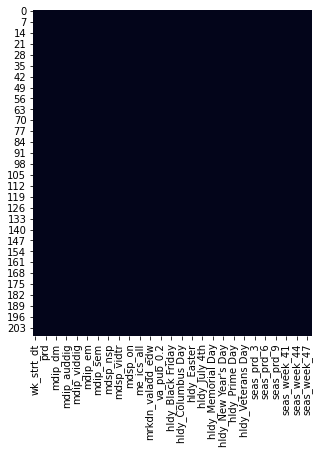

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))
sns.heatmap(data.isnull(), cbar=False,ax=ax)

No cells are empty.

## Variables

In [ ]:
data.set_index('wk_strt_dt',inplace=True)

### Media + Control

In [ ]:
y = data['sales']

In [ ]:
x = data.drop([col for col in data.columns if '_nbr' in col  or 'sales' in col],axis=1)
x = x.drop('prd',axis=1)

In [ ]:
x.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  \
wk_strt_dt                                                           
2014-08-03   4863885   29087520   2421933       692315    37778097   
2014-08-10  20887502    8345120   3984494       475810    12063657   
2014-08-17  11097724   17276800   1846832       784732     5770115   
2014-08-24   1023446   18468480   2394834      1032301    12174000   
2014-08-31  21109811   26659920   3312008       400456    31656134   

            mdip_vidtr  mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  \
wk_strt_dt                                                                 
2014-08-03    10038746      2111112        0  3271007  1514755     27281   
2014-08-10     9847977       587184        0  4260715  2234569     27531   
2014-08-17     7235336      1015658        0  4405992  1616990     55267   
2014-08-24     8625122      2149160        0  6638320  1897998     32470   
2014-08-31    19785657      2408661        0  4347752  2569158     55878   

            mdip_aff  mdip_sem    mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  \
wk_strt_dt                                                                    
2014-08-03    197828     83054  678410.26  129759.66 507635.16      2700.69   
2014-08-10    123688     83124  661097.71   70355.33 625719.37      5039.35   
2014-08-17    186781     79768 1874338.43  107720.37 277532.61      2610.93   
2014-08-24    122389    138936  306583.37  141708.61 186028.61      6032.91   
2014-08-31    209969     87531 2366274.16  160691.30 706694.09      5187.32   

            mdsp_audtr  mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem  \
wk_strt_dt                                                                     
2014-08-03   254134.14   216725.59     45397.90     0.00  61364.75 355954.51   
2014-08-10   106602.98   108919.26      2903.36     0.00 132643.90 336306.72   
2014-08-17    59011.42    74032.19      8110.48     0.00  76741.27 344787.96   
2014-08-24   178010.46   110995.66      6516.22     0.00 193043.55 365495.11   
2014-08-31   144097.56   225140.84     19381.12     0.00 249612.89 401789.35   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03       82.50        3.60 716.29              0.00       0.37   
2014-08-10       82.50        3.58 716.43              0.00       0.36   
2014-08-17       82.50        3.55 717.00              0.00       0.34   
2014-08-24       82.50        3.53 717.00              0.00       0.36   
2014-08-31       84.60        3.54 717.00              0.00       0.36   

            va_pub_0.15  va_pub_0.2  va_pub_0.25  va_pub_0.3  \
wk_strt_dt                                                     
2014-08-03            1           0            0           0   
2014-08-10            1           0            0           0   
2014-08-17            1           1            0           0   
2014-08-24            1           1            0           0   
2014-08-31            0           1            0           0   

            hldy_Black Friday  hldy_Christmas Day  hldy_Christmas Eve  \
wk_strt_dt                                                              
2014-08-03                  0                   0                   0   
2014-08-10                  0                   0                   0   
2014-08-17                  0                   0                   0   
2014-08-24                  0                   0                   0   
2014-08-31                  0                   0                   0   

            hldy_Columbus Day  hldy_Cyber Monday  hldy_Day after Christmas  \
wk_strt_dt                                                                   
2014-08-03                  0                  0                         0   
2014-08-10                  0                  0                         0   
2014-08-17                  0                  0                         0   
2014

### Media Only

In [ ]:
med_col = [col for col in data.columns if 'mdsp' in col or 'mdip' in col]
media = data[med_col]

In [ ]:
media.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  \
wk_strt_dt                                                           
2014-08-03   4863885   29087520   2421933       692315    37778097   
2014-08-10  20887502    8345120   3984494       475810    12063657   
2014-08-17  11097724   17276800   1846832       784732     5770115   
2014-08-24   1023446   18468480   2394834      1032301    12174000   
2014-08-31  21109811   26659920   3312008       400456    31656134   

            mdip_vidtr  mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  \
wk_strt_dt                                                                 
2014-08-03    10038746      2111112        0  3271007  1514755     27281   
2014-08-10     9847977       587184        0  4260715  2234569     27531   
2014-08-17     7235336      1015658        0  4405992  1616990     55267   
2014-08-24     8625122      2149160        0  6638320  1897998     32470   
2014-08-31    19785657      2408661        0  4347752  2569158     55878   

            mdip_aff  mdip_sem    mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  \
wk_strt_dt                                                                    
2014-08-03    197828     83054  678410.26  129759.66 507635.16      2700.69   
2014-08-10    123688     83124  661097.71   70355.33 625719.37      5039.35   
2014-08-17    186781     79768 1874338.43  107720.37 277532.61      2610.93   
2014-08-24    122389    138936  306583.37  141708.61 186028.61      6032.91   
2014-08-31    209969     87531 2366274.16  160691.30 706694.09      5187.32   

            mdsp_audtr  mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem  
wk_strt_dt                                                                    
2014-08-03   254134.14   216725.59     45397.90     0.00  61364.75 355954.51  
2014-08-10   106602.98   108919.26      2903.36     0.00 132643.90 336306.72  
2014-08-17    59011.42    74032.19      8110.48     0.00  76741.27 344787.96  
2014-08-24   178010.46   110995.66      6516.22     0.00 193043.55 365495.11  
2014-08-31   144097.56   225140.84     19381.12     0.00 249612.89 401789.35

### Media Spend

In [ ]:
spe_col = [col for col in data.columns if 'mdsp_' in col]
X_spend = data[spe_col]
X_spend.head()

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  \
wk_strt_dt                                                            
2014-08-03  678410.26  129759.66 507635.16      2700.69   254134.14   
2014-08-10  661097.71   70355.33 625719.37      5039.35   106602.98   
2014-08-17 1874338.43  107720.37 277532.61      2610.93    59011.42   
2014-08-24  306583.37  141708.61 186028.61      6032.91   178010.46   
2014-08-31 2366274.16  160691.30 706694.09      5187.32   144097.56   

            mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem  
wk_strt_dt                                                        
2014-08-03   216725.59     45397.90     0.00  61364.75 355954.51  
2014-08-10   108919.26      2903.36     0.00 132643.90 336306.72  
2014-08-17    74032.19      8110.48     0.00  76741.27 344787.96  
2014-08-24   110995.66      6516.22     0.00 193043.55 365495.11  
2014-08-31   225140.84     19381.12     0.00 249612.89 401789.35

In [ ]:
X_spend_con = data.drop([col for col in data.columns if 'mdip_' in col or '_nbr' in col or 'prd' in col  or 'sales' in col],axis=1)
X_spend_con.head()

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  \
wk_strt_dt                                                            
2014-08-03  678410.26  129759.66 507635.16      2700.69   254134.14   
2014-08-10  661097.71   70355.33 625719.37      5039.35   106602.98   
2014-08-17 1874338.43  107720.37 277532.61      2610.93    59011.42   
2014-08-24  306583.37  141708.61 186028.61      6032.91   178010.46   
2014-08-31 2366274.16  160691.30 706694.09      5187.32   144097.56   

            mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem  me_ics_all  \
wk_strt_dt                                                                     
2014-08-03   216725.59     45397.90     0.00  61364.75 355954.51       82.50   
2014-08-10   108919.26      2903.36     0.00 132643.90 336306.72       82.50   
2014-08-17    74032.19      8110.48     0.00  76741.27 344787.96       82.50   
2014-08-24   110995.66      6516.22     0.00 193043.55 365495.11       82.50   
2014-08-31   225140.84     19381.12     0.00 249612.89 401789.35       84.60   

            me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  va_pub_0.15  \
wk_strt_dt                                                                
2014-08-03        3.60 716.29              0.00       0.37            1   
2014-08-10        3.58 716.43              0.00       0.36            1   
2014-08-17        3.55 717.00              0.00       0.34            1   
2014-08-24        3.53 717.00              0.00       0.36            1   
2014-08-31        3.54 717.00              0.00       0.36            0   

            va_pub_0.2  va_pub_0.25  va_pub_0.3  hldy_Black Friday  \
wk_strt_dt                                                           
2014-08-03           0            0           0                  0   
2014-08-10           0            0           0                  0   
2014-08-17           1            0           0                  0   
2014-08-24           1            0           0                  0   
2014-08-31           1            0           0                  0   

            hldy_Christmas Day  hldy_Christmas Eve  hldy_Columbus Day  \
wk_strt_dt                                                              
2014-08-03                   0                   0                  0   
2014-08-10                   0                   0                  0   
2014-08-17                   0                   0                  0   
2014-08-24                   0                   0                  0   
2014-08-31                   0                   0                  0   

            hldy_Cyber Monday  hldy_Day after Christmas  hldy_Easter  \
wk_strt_dt                                                             
2014-08-03                  0                         0            0   
2014-08-10                  0                         0            0   
2014-08-17                  0                         0            0   
2014-08-24                  0                         0            0   
2014-08-31                  0                         0            0   

            hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
wk_strt_dt                                                        
2014-08-03                  0                  0              0   
2014-08-10                  0                  0              0   
2014-08-17                  0                  0              0   
2014-08-24                  0                  0              0   
2014-08-31                  0                  0              0   

            hldy_Labor Day  hldy_MLK  hldy_Memorial Day  hldy_Mother's Day  \
wk_strt_dt                                                                   
2014-08-03               0         0                  0                  0   
2014-08-10               0         0                  0                  0   
2014-08-17               0         0                  0                  0   
2014-08-24               0         0                  0      

### Impressions

In [ ]:
imp_col = [col for col in data.columns if 'mdip_' in col]
X_imp = data[imp_col]
X_imp.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  \
wk_strt_dt                                                           
2014-08-03   4863885   29087520   2421933       692315    37778097   
2014-08-10  20887502    8345120   3984494       475810    12063657   
2014-08-17  11097724   17276800   1846832       784732     5770115   
2014-08-24   1023446   18468480   2394834      1032301    12174000   
2014-08-31  21109811   26659920   3312008       400456    31656134   

            mdip_vidtr  mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  \
wk_strt_dt                                                                 
2014-08-03    10038746      2111112        0  3271007  1514755     27281   
2014-08-10     9847977       587184        0  4260715  2234569     27531   
2014-08-17     7235336      1015658        0  4405992  1616990     55267   
2014-08-24     8625122      2149160        0  6638320  1897998     32470   
2014-08-31    19785657      2408661        0  4347752  2569158     55878   

            mdip_aff  mdip_sem  
wk_strt_dt                      
2014-08-03    197828     83054  
2014-08-10    123688     83124  
2014-08-17    186781     79768  
2014-08-24    122389    138936  
2014-08-31    209969     87531

In [ ]:
X_imp_con = data.drop([col for col in data.columns if 'mdsp_' in col or 'sales' in col or '_nbr' in col or 'prd' in col],axis=1)
X_imp_con.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  \
wk_strt_dt                                                           
2014-08-03   4863885   29087520   2421933       692315    37778097   
2014-08-10  20887502    8345120   3984494       475810    12063657   
2014-08-17  11097724   17276800   1846832       784732     5770115   
2014-08-24   1023446   18468480   2394834      1032301    12174000   
2014-08-31  21109811   26659920   3312008       400456    31656134   

            mdip_vidtr  mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  \
wk_strt_dt                                                                 
2014-08-03    10038746      2111112        0  3271007  1514755     27281   
2014-08-10     9847977       587184        0  4260715  2234569     27531   
2014-08-17     7235336      1015658        0  4405992  1616990     55267   
2014-08-24     8625122      2149160        0  6638320  1897998     32470   
2014-08-31    19785657      2408661        0  4347752  2569158     55878   

            mdip_aff  mdip_sem  me_ics_all  me_gas_dpg  st_ct  \
wk_strt_dt                                                      
2014-08-03    197828     83054       82.50        3.60 716.29   
2014-08-10    123688     83124       82.50        3.58 716.43   
2014-08-17    186781     79768       82.50        3.55 717.00   
2014-08-24    122389    138936       82.50        3.53 717.00   
2014-08-31    209969     87531       84.60        3.54 717.00   

            mrkdn_valadd_edw  mrkdn_pdm  va_pub_0.15  va_pub_0.2  va_pub_0.25  \
wk_strt_dt                                                                      
2014-08-03              0.00       0.37            1           0            0   
2014-08-10              0.00       0.36            1           0            0   
2014-08-17              0.00       0.34            1           1            0   
2014-08-24              0.00       0.36            1           1            0   
2014-08-31              0.00       0.36            0           1            0   

            va_pub_0.3  hldy_Black Friday  hldy_Christmas Day  \
wk_strt_dt                                                      
2014-08-03           0                  0                   0   
2014-08-10           0                  0                   0   
2014-08-17           0                  0                   0   
2014-08-24           0                  0                   0   
2014-08-31           0                  0                   0   

            hldy_Christmas Eve  hldy_Columbus Day  hldy_Cyber Monday  \
wk_strt_dt                                                             
2014-08-03                   0                  0                  0   
2014-08-10                   0                  0                  0   
2014-08-17                   0                  0                  0   
2014-08-24                   0                  0                  0   
2014-08-31                   0                  0                  0   

            hldy_Day after Christmas  hldy_Easter  hldy_Father's Day  \
wk_strt_dt                                                             
2014-08-03                         0            0                  0   
2014-08-10                         0            0                  0   
2014-08-17                         0            0                  0   
2014-08-24                         0            0                  0   
2014-08-31                         0            0                  0   

            hldy_Green Monday  hldy_July 4th  hldy_Labor Day  hldy_MLK  \
wk_strt_dt                                                               
2014-08-03                  0              0               0         0   
2014-08-10                  0              0               0         0   
2014-08-17                  0              0               0         0   
2014-08-24                  0              0               0         0   
2014-08-31                  0              0           

### Control Variables

In [ ]:
dum_col = [col for col in data.columns if 'hldy_' in col or 'seas_' in col]
data[dum_col].head()

hldy_Black Friday  hldy_Christmas Day  hldy_Christmas Eve  \
wk_strt_dt                                                              
2014-08-03                  0                   0                   0   
2014-08-10                  0                   0                   0   
2014-08-17                  0                   0                   0   
2014-08-24                  0                   0                   0   
2014-08-31                  0                   0                   0   

            hldy_Columbus Day  hldy_Cyber Monday  hldy_Day after Christmas  \
wk_strt_dt                                                                   
2014-08-03                  0                  0                         0   
2014-08-10                  0                  0                         0   
2014-08-17                  0                  0                         0   
2014-08-24                  0                  0                         0   
2014-08-31                  0                  0                         0   

            hldy_Easter  hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
wk_strt_dt                                                                     
2014-08-03            0                  0                  0              0   
2014-08-10            0                  0                  0              0   
2014-08-17            0                  0                  0              0   
2014-08-24            0                  0                  0              0   
2014-08-31            0                  0                  0              0   

            hldy_Labor Day  hldy_MLK  hldy_Memorial Day  hldy_Mother's Day  \
wk_strt_dt                                                                   
2014-08-03               0         0                  0                  0   
2014-08-10               0         0                  0                  0   
2014-08-17               0         0                  0                  0   
2014-08-24               0         0                  0                  0   
2014-08-31               1         0                  0                  0   

            hldy_NYE  hldy_New Year's Day  hldy_Pre Thanksgiving  \
wk_strt_dt                                                         
2014-08-03         0                    0                      0   
2014-08-10         0                    0                      0   
2014-08-17         0                    0                      0   
2014-08-24         0                    0                      0   
2014-08-31         0                    0                      0   

            hldy_Presidents Day  hldy_Prime Day  hldy_Thanksgiving  \
wk_strt_dt                                                           
2014-08-03                    0               0                  0   
2014-08-10                    0               0                  0   
2014-08-17                    0               0                  0   
2014-08-24                    0               0                  0   
2014-08-31                    0               0                  0   

            hldy_Valentine's Day  hldy_Veterans Day  seas_prd_1  seas_prd_2  \
wk_strt_dt                                                                    
2014-08-03                     0                  0           0           0   
2014-08-10                     0                  0           0           0   
2014-08-17                     0                  0           0           0   
2014-08-24                     0                  0           0           0   
2014-08-31                     0                  0           0           0   

            seas_prd_3  seas_prd_4  seas_prd_5  seas_prd_6  seas_prd_7  \
wk_strt_dt                                                               
2014-08-03           0           0           0           0           1   
2014-08-10           0           0           0           0           1   
2014-08-17           0     

In [ ]:
con_col = [col for col in data.columns if 'me_' in col or 'st_ct' in col or 'mrkdn_' in col]
control = data[con_col+dum_col]
control.head()

me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03       82.50        3.60 716.29              0.00       0.37   
2014-08-10       82.50        3.58 716.43              0.00       0.36   
2014-08-17       82.50        3.55 717.00              0.00       0.34   
2014-08-24       82.50        3.53 717.00              0.00       0.36   
2014-08-31       84.60        3.54 717.00              0.00       0.36   

            hldy_Black Friday  hldy_Christmas Day  hldy_Christmas Eve  \
wk_strt_dt                                                              
2014-08-03                  0                   0                   0   
2014-08-10                  0                   0                   0   
2014-08-17                  0                   0                   0   
2014-08-24                  0                   0                   0   
2014-08-31                  0                   0                   0   

            hldy_Columbus Day  hldy_Cyber Monday  hldy_Day after Christmas  \
wk_strt_dt                                                                   
2014-08-03                  0                  0                         0   
2014-08-10                  0                  0                         0   
2014-08-17                  0                  0                         0   
2014-08-24                  0                  0                         0   
2014-08-31                  0                  0                         0   

            hldy_Easter  hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
wk_strt_dt                                                                     
2014-08-03            0                  0                  0              0   
2014-08-10            0                  0                  0              0   
2014-08-17            0                  0                  0              0   
2014-08-24            0                  0                  0              0   
2014-08-31            0                  0                  0              0   

            hldy_Labor Day  hldy_MLK  hldy_Memorial Day  hldy_Mother's Day  \
wk_strt_dt                                                                   
2014-08-03               0         0                  0                  0   
2014-08-10               0         0                  0                  0   
2014-08-17               0         0                  0                  0   
2014-08-24               0         0                  0                  0   
2014-08-31               1         0                  0                  0   

            hldy_NYE  hldy_New Year's Day  hldy_Pre Thanksgiving  \
wk_strt_dt                                                         
2014-08-03         0                    0                      0   
2014-08-10         0                    0                      0   
2014-08-17         0                    0                      0   
2014-08-24         0                    0                      0   
2014-08-31         0                    0                      0   

            hldy_Presidents Day  hldy_Prime Day  hldy_Thanksgiving  \
wk_strt_dt                                                           
2014-08-03                    0               0                  0   
2014-08-10                    0               0                  0   
2014-08-17                    0               0                  0   
2014-08-24                    0               0                  0   
2014-08-31                    0               0                  0   

            hldy_Valentine's Day  hldy_Veterans Day  seas_prd_1  seas_prd_2  \
wk_strt_dt                                                                    
2014-08-03                     0                  0           0           0   
2014-08-10                     0                  0           0           0   
2014-08-17                     0          

## Data Plotting

(2327.0, 2535.0)

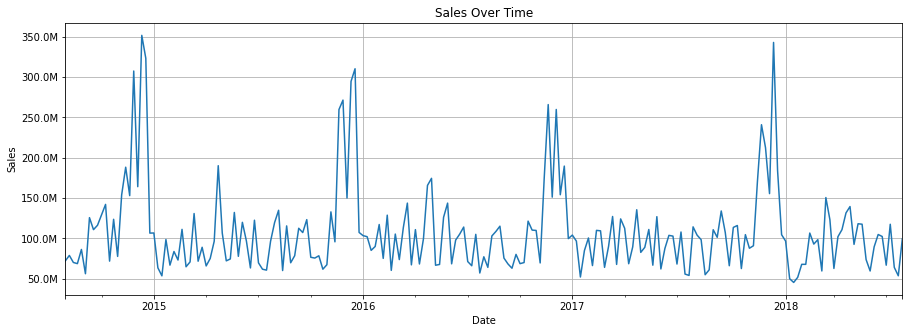

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
y.plot(ax=ax)

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
plt.title('Sales Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
#ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))

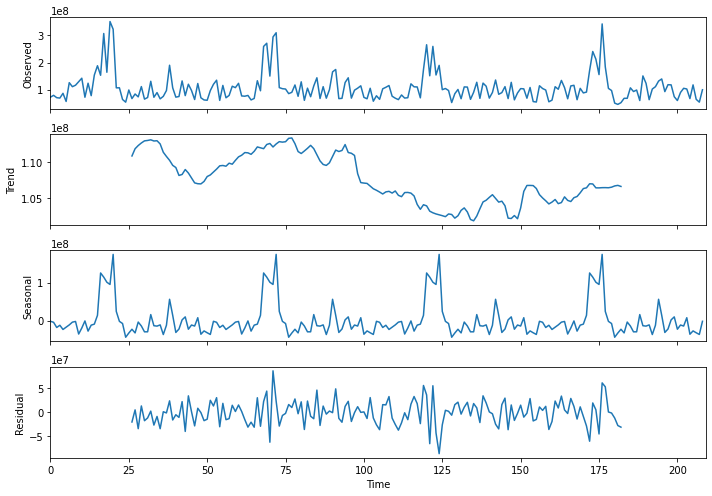

In [ ]:
decomposition = sm.tsa.seasonal_decompose(np.asarray(data['sales']), model='additive', freq=52)
pylab.rcParams['figure.figsize'] = (10, 7)
fig = decomposition.plot()
plt.show()

(735448.0, 736904.0)

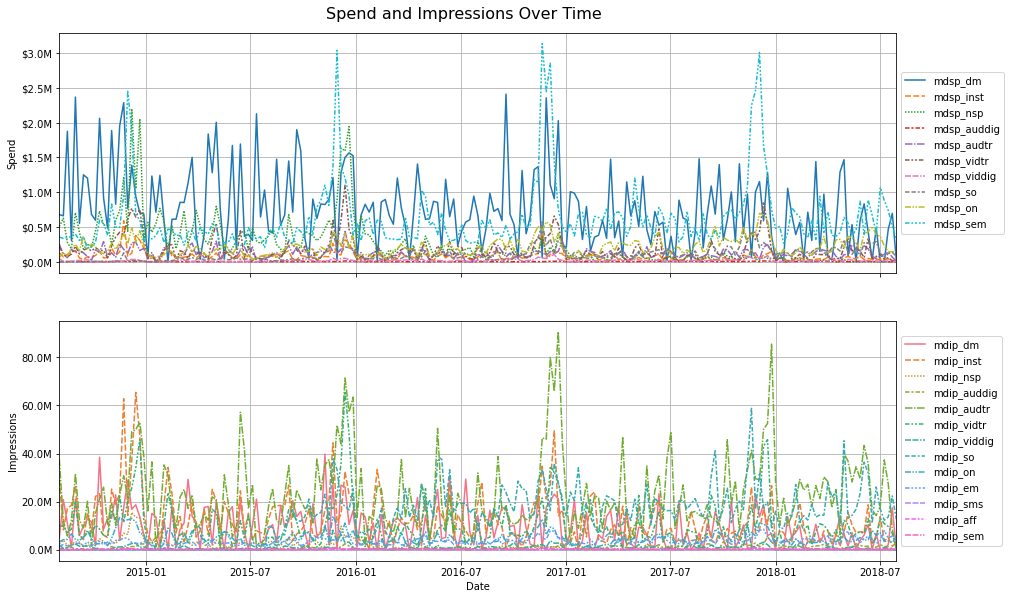

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,9),sharex=True)
sns.lineplot(data=data[[col for col in data.columns if 'mdsp_' in col]], ax=ax[0])
sns.lineplot(data=data[[col for col in data.columns if 'mdip_' in col]], ax=ax[1])
fig.suptitle('Spend and Impressions Over Time', fontsize=16)
fig.subplots_adjust(top=.94)
def spe_millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)
speformatter = FuncFormatter(spe_millions)
ax[0].yaxis.set_major_formatter(speformatter)
ax[1].yaxis.set_major_formatter(mformatter)
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Spend')
ax[1].set_ylabel('Impressions')
ax[0].grid('--')
ax[1].grid('--')
ax[0].legend(loc="center left",bbox_to_anchor=(1, 0.5))
ax[1].legend(loc="center left",bbox_to_anchor=(1, 0.5))
ax[0].set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax[1].set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))

In [ ]:
y_spe = pd.DataFrame([data['sales'],data[spe_col].sum(axis=1)]).T
y_spe.columns = ['Sales','Spend']
y_imp = pd.DataFrame([data['sales'],data[imp_col].sum(axis=1)]).T
y_imp.columns = ['Sales','Impressions']

Text(0.5, 1.0, 'Sales against Spend')

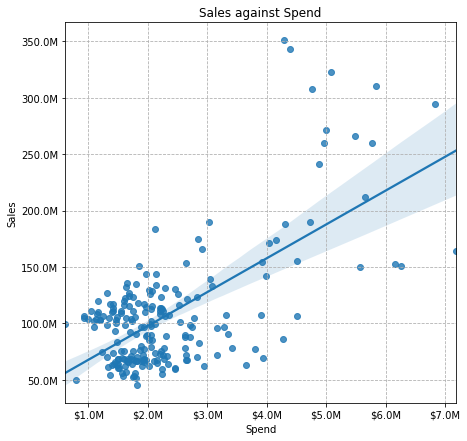

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(ax=ax, x='Spend', y='Sales', data=y_spe)
ax.grid(linestyle='--')
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.xaxis.set_major_formatter(speformatter)
ax.set_title('Sales against Spend')

Text(0.5, 1.0, 'Sales against Impressions')

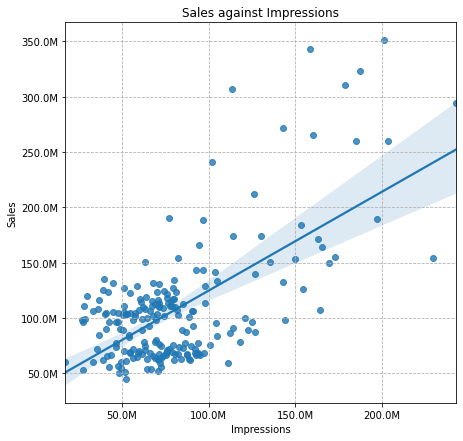

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(ax=ax, x='Impressions', y='Sales', data=y_imp)
ax.grid(linestyle='--')
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.xaxis.set_major_formatter(mformatter)
ax.set_title('Sales against Impressions')

### Controls

In [ ]:
data.head()

yr_nbr  qtr_nbr  prd  wk_nbr  wk_in_yr_nbr   mdip_dm  mdip_inst  \
wk_strt_dt                                                                    
2014-08-03    2014        3    7       1            27   4863885   29087520   
2014-08-10    2014        3    7       2            28  20887502    8345120   
2014-08-17    2014        3    7       3            29  11097724   17276800   
2014-08-24    2014        3    7       4            30   1023446   18468480   
2014-08-31    2014        3    8       1            31  21109811   26659920   

            mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
wk_strt_dt                                                               
2014-08-03   2421933       692315    37778097    10038746      2111112   
2014-08-10   3984494       475810    12063657     9847977       587184   
2014-08-17   1846832       784732     5770115     7235336      1015658   
2014-08-24   2394834      1032301    12174000     8625122      2149160   
2014-08-31   3312008       400456    31656134    19785657      2408661   

            mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem  \
wk_strt_dt                                                            
2014-08-03        0  3271007  1514755     27281    197828     83054   
2014-08-10        0  4260715  2234569     27531    123688     83124   
2014-08-17        0  4405992  1616990     55267    186781     79768   
2014-08-24        0  6638320  1897998     32470    122389    138936   
2014-08-31        0  4347752  2569158     55878    209969     87531   

              mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  \
wk_strt_dt                                                            
2014-08-03  678410.26  129759.66 507635.16      2700.69   254134.14   
2014-08-10  661097.71   70355.33 625719.37      5039.35   106602.98   
2014-08-17 1874338.43  107720.37 277532.61      2610.93    59011.42   
2014-08-24  306583.37  141708.61 186028.61      6032.91   178010.46   
2014-08-31 2366274.16  160691.30 706694.09      5187.32   144097.56   

            mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem       sales  \
wk_strt_dt                                                                     
2014-08-03   216725.59     45397.90     0.00  61364.75 355954.51 72051457.64   
2014-08-10   108919.26      2903.36     0.00 132643.90 336306.72 78794770.54   
2014-08-17    74032.19      8110.48     0.00  76741.27 344787.96 70071185.56   
2014-08-24   110995.66      6516.22     0.00 193043.55 365495.11 68642464.59   
2014-08-31   225140.84     19381.12     0.00 249612.89 401789.35 86190784.65   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03       82.50        3.60 716.29              0.00       0.37   
2014-08-10       82.50        3.58 716.43              0.00       0.36   
2014-08-17       82.50        3.55 717.00              0.00       0.34   
2014-08-24       82.50        3.53 717.00              0.00       0.36   
2014-08-31       84.60        3.54 717.00              0.00       0.36   

            va_pub_0.15  va_pub_0.2  va_pub_0.25  va_pub_0.3  \
wk_strt_dt                                                     
2014-08-03            1           0            0           0   
2014-08-10            1           0            0           0   
2014-08-17            1           1            0           0   
2014-08-24            1           1            0           0   
2014-08-31            0           1            0           0   

            hldy_Black Friday  hldy_Christmas Day  hldy_Christmas Eve  \
wk_strt_dt                                                              
2014-08-03                  0                   0                   0   
2014-08-10                  0                   0                   0   
2014-08-17                  0                   0                   0   
2014-08-24                  0                   0

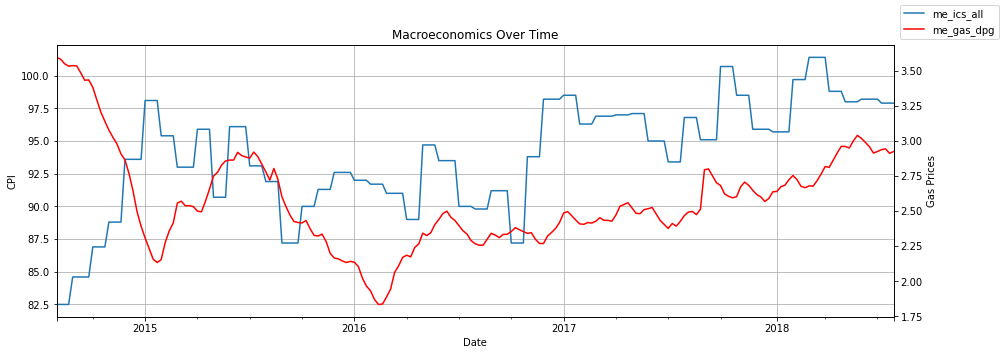

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
data['me_ics_all'].plot(ax=ax)
ax2=ax.twinx()
data['me_gas_dpg'].plot(ax=ax2, color='r')

plt.title('Macroeconomics Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('CPI')
ax2.set_ylabel('Gas Prices')
ax.grid('--')
fig.legend(loc='upper right')

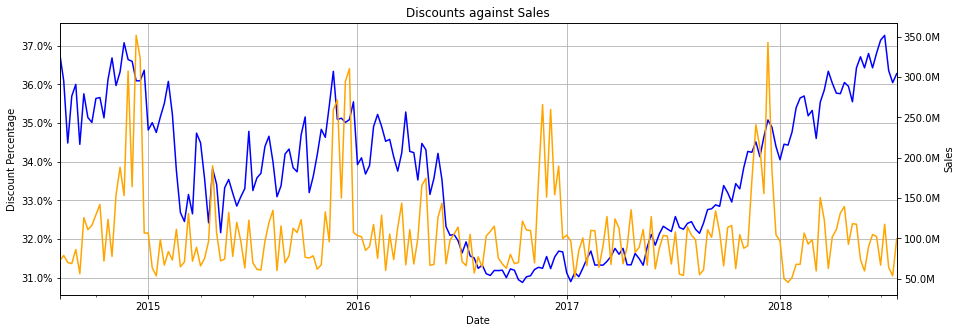

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
data['mrkdn_pdm'].plot(ax=ax,color='b')
ax2=ax.twinx()
y.plot(ax=ax2, color='orange')
plt.title('Discounts against Sales')
ax.set_xlabel('Date')
ax.set_ylabel('Discount Percentage')
ax2.set_ylabel('Sales')
ax.grid('--')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.yaxis.set_major_formatter(mformatter)

## Data Relationships

### Correlations

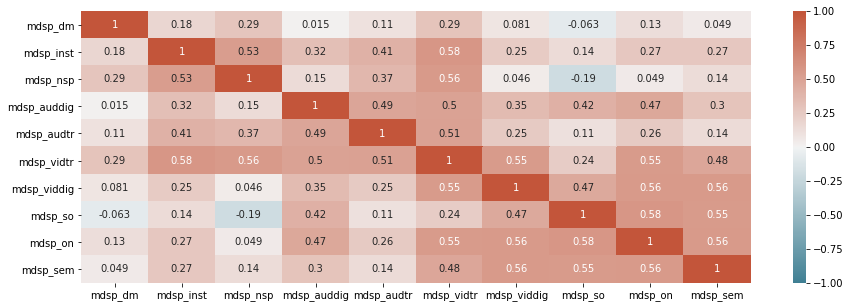

In [ ]:
plt.figure(figsize = (15,5))
spend_corr = X_spend.corr()
sns.heatmap(spend_corr, xticklabels=spend_corr.columns,
            yticklabels=spend_corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            vmin=-1, vmax=1)

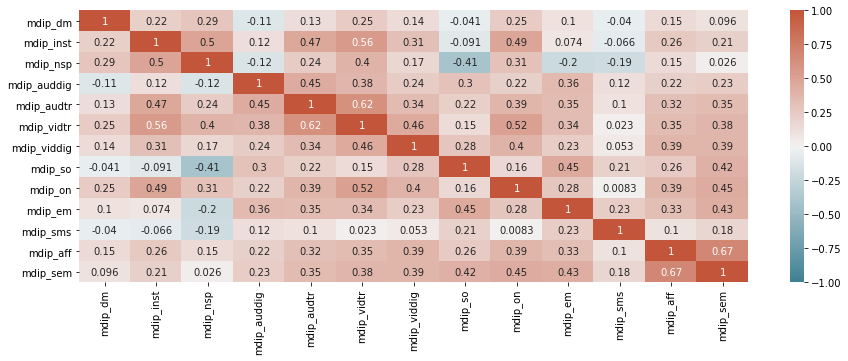

In [ ]:
plt.figure(figsize = (15,5))
imp_corr = X_imp.corr()
sns.heatmap(imp_corr, xticklabels=imp_corr.columns,
            yticklabels=imp_corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            vmin=-1, vmax=1)

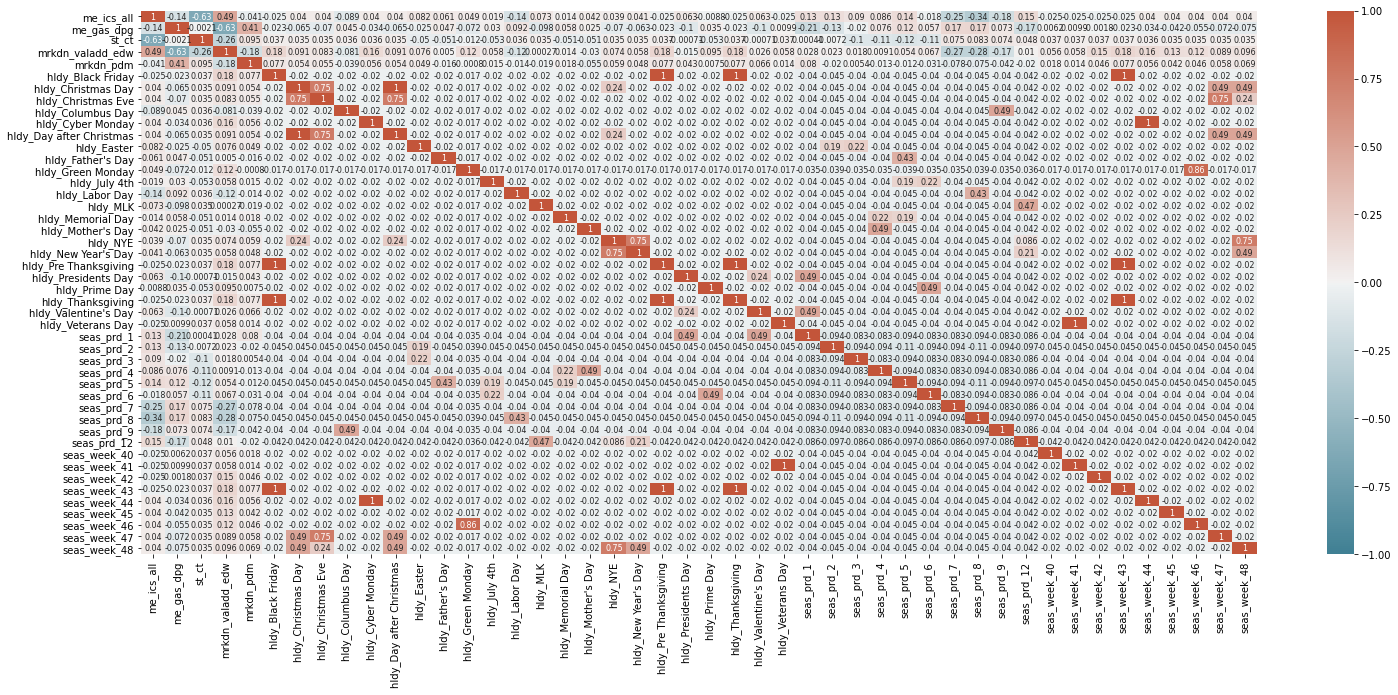

In [ ]:
plt.figure(figsize = (25,10))
control_corr = control.corr()
sns.heatmap(control_corr, xticklabels=control.columns,
            yticklabels=control.columns,
            annot=True,
            annot_kws={'size': 8},
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            vmin=-1, vmax=1)

In [ ]:
#Drop correlating control variables
control1 = control.drop(['seas_week_43','seas_week_44','seas_week_41','seas_week_46','seas_week_48','seas_week_47','hldy_Pre Thanksgiving','hldy_Thanksgiving',\
                         'hldy_Christmas Eve','hldy_Day after Christmas','hldy_NYE'],axis=1)
bin1_col = [col for col in control1.columns if 'hldy_' in col or 'seas_' in col]
con1_col = [col for col in control1.columns if 'me_' in col or 'st_ct' in col or 'mrkdn_' in col]
x = x.drop(['seas_week_43','seas_week_44','seas_week_41','seas_week_46','seas_week_48','seas_week_47','hldy_Pre Thanksgiving','hldy_Thanksgiving',\
                         'hldy_Christmas Eve','hldy_Day after Christmas','hldy_NYE'],axis=1)

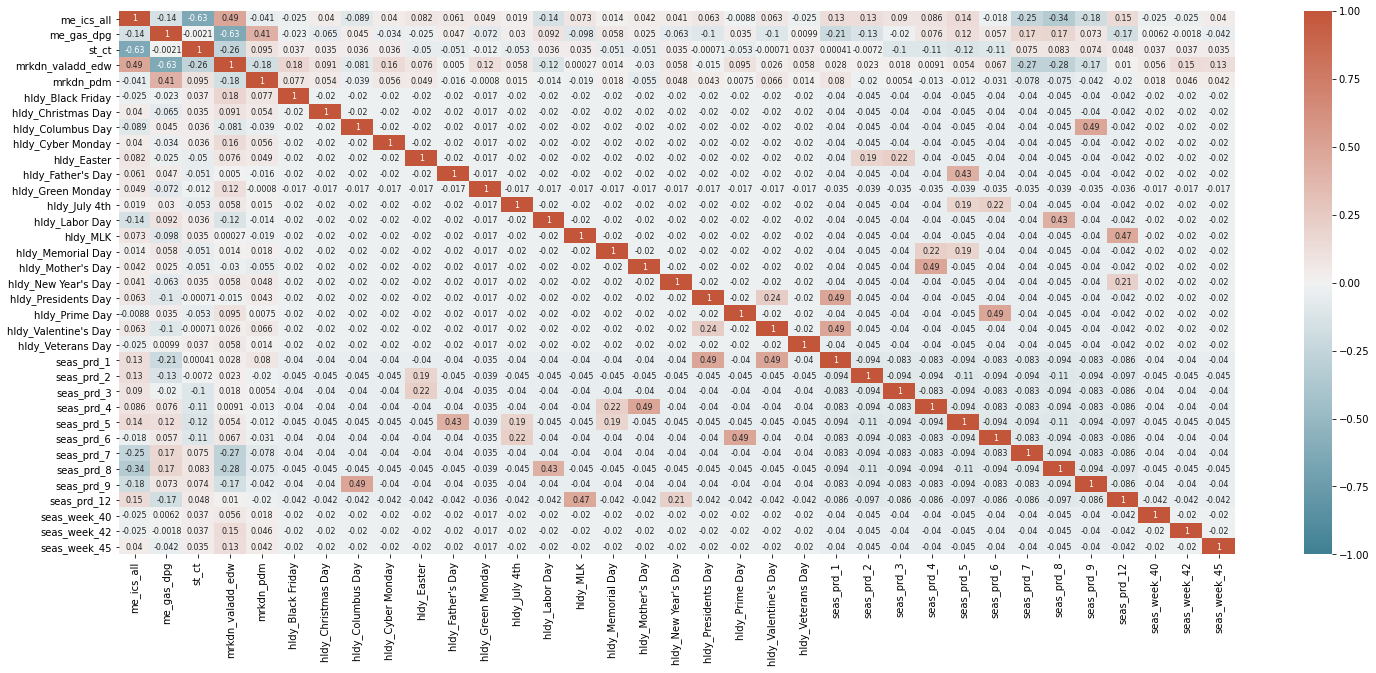

In [ ]:
plt.figure(figsize = (25,10))
control_corr = control1.corr()
sns.heatmap(control_corr, xticklabels=control1.columns,
            yticklabels=control1.columns,
            annot=True,
            annot_kws={'size': 8},
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            vmin=-1, vmax=1)

## Identifying Multicollinearity

###Standardisation

In [ ]:
sc_data = data[spe_col+imp_col+con1_col]

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(sc_data)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.index = data.index
scaled_df.columns = sc_data.columns

In [ ]:
scaled_df.head()

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
wk_strt_dt                                                                      
2014-08-03    -0.15       0.72      0.74        -0.45        2.00        0.29   
2014-08-10    -0.18      -0.13      1.09         0.47       -0.24       -0.35   
2014-08-17     2.06       0.41      0.07        -0.48       -0.96       -0.56   
2014-08-24    -0.83       0.89     -0.20         0.85        0.84       -0.34   
2014-08-31     2.97       1.17      1.33         0.52        0.33        0.34   

            mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  mdip_dm  mdip_inst  \
wk_strt_dt                                                                
2014-08-03         1.58    -1.07    -1.24     -0.54    -0.57       1.62   
2014-08-10        -0.91    -1.07    -0.67     -0.58     1.37      -0.40   
2014-08-17        -0.61    -1.07    -1.12     -0.57     0.19       0.47   
2014-08-24        -0.70    -1.07    -0.18     -0.52    -1.03       0.59   
2014-08-31         0.05    -1.07     0.27     -0.45     1.40       1.39   

            mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
wk_strt_dt                                                               
2014-08-03      0.37        -0.38        0.95        0.02         0.82   
2014-08-10      1.08        -0.65       -0.70        0.00        -0.41   
2014-08-17      0.10        -0.27       -1.10       -0.28        -0.06   
2014-08-24      0.35         0.04       -0.69       -0.13         0.85   
2014-08-31      0.77        -0.74        0.56        1.08         1.05   

            mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem  \
wk_strt_dt                                                            
2014-08-03    -1.27    -0.55    -1.41     -1.20     -0.65     -1.20   
2014-08-10    -1.27    -0.18    -0.92     -1.19     -1.17     -1.20   
2014-08-17    -1.27    -0.13    -1.34     -0.61     -0.73     -1.23   
2014-08-24    -1.27     0.71    -1.15     -1.09     -1.18     -0.70   
2014-08-31    -1.27    -0.15    -0.69     -0.59     -0.57     -1.16   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  
wk_strt_dt                                                              
2014-08-03       -2.71        2.98   1.26             -3.55       1.72  
2014-08-10       -2.71        2.94   1.26             -3.55       1.32  
2014-08-17       -2.71        2.84   1.27             -3.55       0.42  
2014-08-24       -2.71        2.79   1.27             -3.55       1.10  
2014-08-31       -2.21        2.80   1.27             -3.55       1.27

In [ ]:
scaled_dum = scaled_df.merge(data[bin1_col],left_index=True,right_index=True)

### Normalisation

In [ ]:
norm_data = data[spe_col+imp_col+con1_col+bin1_col]

In [ ]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(norm_data)
minmax_df = pd.DataFrame(minmax_df)
minmax_df.index = norm_data.index
minmax_df.columns = norm_data.columns

In [ ]:
minmax_df.head()

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
wk_strt_dt                                                                      
2014-08-03     0.28       0.22      0.23         0.21        0.58        0.20   
2014-08-10     0.27       0.12      0.28         0.39        0.24        0.10   
2014-08-17     0.78       0.18      0.13         0.20        0.14        0.07   
2014-08-24     0.13       0.24      0.08         0.46        0.41        0.10   
2014-08-31     0.98       0.27      0.32         0.40        0.33        0.20   

            mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  mdip_dm  mdip_inst  \
wk_strt_dt                                                                
2014-08-03         0.44     0.00     0.03      0.05     0.12       0.44   
2014-08-10         0.03     0.00     0.14      0.05     0.52       0.13   
2014-08-17         0.08     0.00     0.06      0.05     0.28       0.26   
2014-08-24         0.06     0.00     0.23      0.06     0.03       0.28   
2014-08-31         0.19     0.00     0.32      0.07     0.53       0.41   

            mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
wk_strt_dt                                                               
2014-08-03      0.16         0.13        0.42        0.15         0.20   
2014-08-10      0.26         0.09        0.13        0.15         0.05   
2014-08-17      0.12         0.14        0.06        0.11         0.09   
2014-08-24      0.15         0.19        0.13        0.13         0.20   
2014-08-31      0.21         0.07        0.35        0.30         0.22   

            mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem  \
wk_strt_dt                                                            
2014-08-03     0.00     0.21     0.01      0.12      0.09      0.00   
2014-08-10     0.00     0.28     0.11      0.12      0.00      0.00   
2014-08-17     0.00     0.29     0.02      0.25      0.08      0.00   
2014-08-24     0.00     0.46     0.06      0.15      0.00      0.08   
2014-08-31     0.00     0.29     0.16      0.25      0.10      0.01   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03        0.00        1.00   0.98              0.00       0.93   
2014-08-10        0.00        0.99   0.98              0.00       0.82   
2014-08-17        0.00        0.97   0.98              0.00       0.56   
2014-08-24        0.00        0.96   0.98              0.00       0.75   
2014-08-31        0.11        0.97   0.98              0.00       0.80   

            hldy_Black Friday  hldy_Christmas Day  hldy_Columbus Day  \
wk_strt_dt                                                             
2014-08-03               0.00                0.00               0.00   
2014-08-10               0.00                0.00               0.00   
2014-08-17               0.00                0.00               0.00   
2014-08-24               0.00                0.00               0.00   
2014-08-31               0.00                0.00               0.00   

            hldy_Cyber Monday  hldy_Easter  hldy_Father's Day  \
wk_strt_dt                                                      
2014-08-03               0.00         0.00               0.00   
2014-08-10               0.00         0.00               0.00   
2014-08-17               0.00         0.00               0.00   
2014-08-24               0.00         0.00               0.00   
2014-08-31               0.00         0.00               0.00   

            hldy_Green Monday  hldy_July 4th  hldy_Labor Day  hldy_MLK  \
wk_strt_dt                                                               
2014-08-03               0.00           0.00            0.00      0.00   
2014-08-10               0.00           0.00            0.00      0.00   
2014-08-17               0.00           0.00            0.00      0.00   
2014-08-24               0.00           0.00       

### Variance Inflation Factor (VIF)

#### All

In [ ]:
vif_X = pd.DataFrame()
vif_X['VIF Factor'] = [variance_inflation_factor(x[med_col+con_col].values, i) for i in range(x[med_col+con_col].shape[1])]
vif_X['features'] = x[med_col+con_col].columns

In [ ]:
vif_X.sort_values(ascending=False ,by=['VIF Factor']).head(10)

VIF Factor          features
23      624.80        me_ics_all
27      576.82         mrkdn_pdm
25      382.36             st_ct
24      150.47        me_gas_dpg
26       45.81  mrkdn_valadd_edw
12       16.86          mdip_sem
18       15.33        mdsp_vidtr
16       13.08       mdsp_auddig
9        12.77           mdip_em
21       12.44           mdsp_on

##### Scaled Variables

In [ ]:
vif_X = pd.DataFrame()
vif_X['VIF Factor'] = [variance_inflation_factor(scaled_dum.values, i) for i in range(scaled_dum.shape[1])]
vif_X['features'] = scaled_dum.columns

In [ ]:
vif_X.sort_values(ascending=False ,by=['VIF Factor']).head(10)

VIF Factor           features
5        10.88         mdsp_vidtr
2         9.50           mdsp_nsp
9         8.41           mdsp_sem
15        7.92         mdip_vidtr
12        7.86           mdip_nsp
1         7.55          mdsp_inst
11        6.34          mdip_inst
25        5.62              st_ct
3         5.06        mdsp_auddig
28        4.88  hldy_Black Friday

In [ ]:
scaled_df1 = scaled_df.drop('mdsp_nsp',axis=1)

In [ ]:
vif_X = pd.DataFrame()
vif_X['VIF Factor'] = [variance_inflation_factor(scaled_df1.values, i) for i in range(scaled_df1.shape[1])]
vif_X['features'] = scaled_df1.columns

In [ ]:
vif_X.sort_values(ascending=False ,by=['VIF Factor']).head(10)

VIF Factor     features
4         7.71   mdsp_vidtr
14        4.78   mdip_vidtr
24        4.60        st_ct
1         4.52    mdsp_inst
10        4.36    mdip_inst
2         4.04  mdsp_auddig
8         3.70     mdsp_sem
6         3.61      mdsp_so
12        3.57  mdip_auddig
21        3.53     mdip_sem

In [ ]:
control_sc = scaled_dum[con1_col+bin1_col]

## Setting variables

In [ ]:
x = data[spe_col+imp_col+con1_col+bin1_col]
scaled_x = scaled_dum
y = data['sales']
norm_x = minmax_df.drop('mdsp_nsp',axis=1)

## Feature Importance

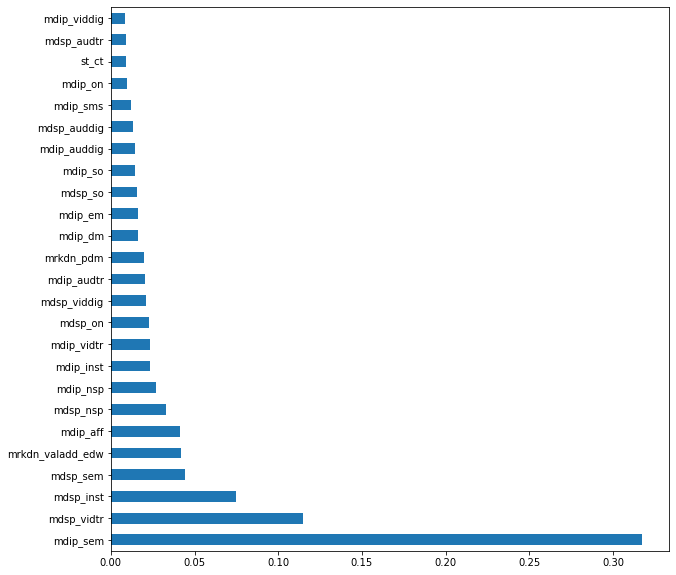

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=0)
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Visualizing Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

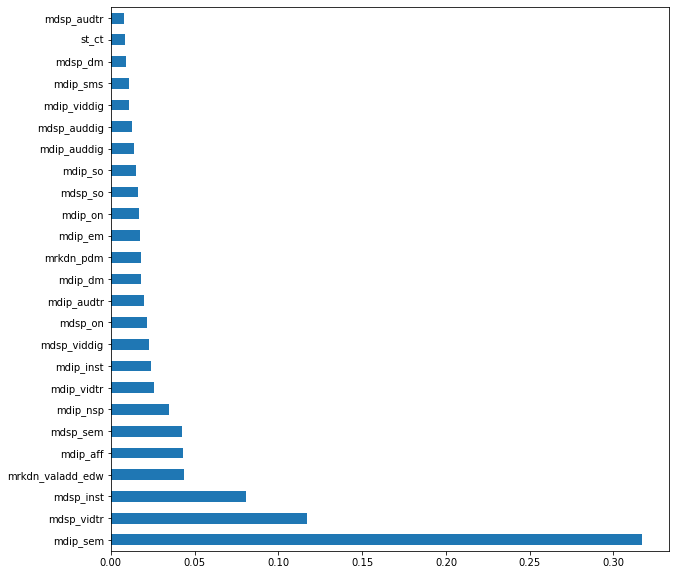

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_x, y, test_size=.4, random_state=0)
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Visualizing Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=norm_x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# Modelling

## Functions

In [ ]:
def basic_ols(X,Y):
  Xols = sm.add_constant(X)
  ols = sm.OLS(Y,Xols).fit()

In [ ]:
def fit_ols_8020(X,Y):
    tmp = copy.deepcopy(X)
    Xols = sm.add_constant(tmp)
    X_train, X_test, y_train, y_test = train_test_split(Xols, Y, test_size=.2, random_state=0)
    ols = sm.OLS(y_train,X_train).fit()
    pred = ols.predict(X_test)
    rmse = sqrt(mae(y_test, pred))
    return  print('Test RMSE: %.3f' % rmse),print(ols.summary())


In [ ]:
def backward_elim(X, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    tmp = copy.deepcopy(X)
    included=list(tmp.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(tmp[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

## Train Test Split and Significance Thresholds

### Train Test Split

In [ ]:
def fit_ols_6040(X,Y):
    tmp = copy.deepcopy(X)
    Xols = sm.add_constant(tmp)
    X_train, X_test, y_train, y_test = train_test_split(Xols, Y, test_size=.4, random_state=0)
    ols = sm.OLS(y_train,X_train).fit()
    pred = ols.predict(X_test)
    rmse = sqrt(mae(y_test, pred))
    return  print('Test RMSE: %.3f' % rmse),print(ols.summary())

In [ ]:
def fit_ols_5050(X,Y):
    tmp = copy.deepcopy(X)
    Xols = sm.add_constant(tmp)
    X_train, X_test, y_train, y_test = train_test_split(Xols, Y, test_size=.5, random_state=0)
    ols = sm.OLS(y_train,X_train).fit()
    pred = ols.predict(X_test)
    rmse = sqrt(mae(y_test, pred))
    return  print('Test RMSE: %.3f' % rmse),print(ols.summary())

In [ ]:
fit_ols_8020(scaled_x,y)

Test RMSE: 6840.351
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     8.091
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.13e-20
Time:                        14:42:04   Log-Likelihood:                -3065.7
No. Observations:                 167   AIC:                             6249.
Df Residuals:                     108   BIC:                             6433.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
fit_ols_6040(scaled_x,y)

Test RMSE: 6144.377
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     7.025
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.57e-13
Time:                        14:42:04   Log-Likelihood:                -2281.9
No. Observations:                 125   AIC:                             4680.
Df Residuals:                      67   BIC:                             4844.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
fit_ols_5050(scaled_x,y)

Test RMSE: 5864.096
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4.788
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           9.45e-08
Time:                        14:42:04   Log-Likelihood:                -1897.1
No. Observations:                 104   AIC:                             3908.
Df Residuals:                      47   BIC:                             4059.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

80:20 train test split

*   R2 Score: 0.813
*   Adj R2 Score: 0.712
*   RMSE: 6840.351

60:40 train test split

*   R2 Score: 0.857
*   Adj R2 Score: 0.735
*   RMSE: 6144.377

50:50 train test split


*   R2 Score: 0.851
*   Adj R2 Score: 0.673
*   RMSE: 5864.096

Despite 80:20 produced the highest RMSE, despite it having a slightl better Adjusted R2 score than 50:50.

60:40 split will be used, due to the nature of the data having a relatively low number of data points. Therefore, having a more distributed split will account for potential sews in the data.

However, 80:20 showed no signs of multicollinearity, but that could be the nature of the nature as a larger number of data rows would be included, meanwhile 60:40 and 50:50 show signs of collinearity.

### Testing Significance Threshold

In [ ]:
def backward_elim10(X, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.1, 
                        verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

In [ ]:
def backward_elim075(X, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.075, 
                        verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

In [ ]:
backward_elim(scaled_x,y)

Drop st_ct with p-value 0.9674369970101353
Drop hldy_Columbus Day with p-value 0.9315944193821835
Drop hldy_Christmas Day with p-value 0.9161151412981925
Drop mdip_auddig with p-value 0.8935638365241831
Drop mdip_viddig with p-value 0.871730695265156
Drop mdsp_nsp with p-value 0.8216038117597598
Drop mdsp_auddig with p-value 0.7544655057640981
Drop mdip_inst with p-value 0.7327327205499194
Drop hldy_Prime Day with p-value 0.7200706029054169
Drop mdsp_so with p-value 0.5894628306501167
Drop mdip_nsp with p-value 0.6276245758315515
Drop mdip_audtr with p-value 0.5314020048586766
Drop hldy_Cyber Monday with p-value 0.5020672552671719
Drop hldy_Valentine's Day with p-value 0.4378597698938522
Drop mdsp_on with p-value 0.4228401768392738
Drop mdsp_vidtr with p-value 0.43433792765044543
Drop mdsp_dm with p-value 0.4355487673680155
Drop hldy_July 4th with p-value 0.41014041600117046
Drop mdip_em with p-value 0.34511194307213344
Drop mdip_aff with p-value 0.318268107025879
Drop mdsp_viddig with

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_x05 = scaled_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']]

In [ ]:
fit_ols_6040(back_x05,y)

Test RMSE: 5171.842
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     13.54
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.32e-21
Time:                        14:42:05   Log-Likelihood:                -2320.5
No. Observations:                 125   AIC:                             4685.
Df Residuals:                     103   BIC:                             4747.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

(None, None)

In [ ]:
backward_elim10(scaled_x,y)

Drop st_ct with p-value 0.9674369970101353
Drop hldy_Columbus Day with p-value 0.9315944193821835
Drop hldy_Christmas Day with p-value 0.9161151412981925
Drop mdip_auddig with p-value 0.8935638365241831
Drop mdip_viddig with p-value 0.871730695265156
Drop mdsp_nsp with p-value 0.8216038117597598
Drop mdsp_auddig with p-value 0.7544655057640981
Drop mdip_inst with p-value 0.7327327205499194
Drop hldy_Prime Day with p-value 0.7200706029054169
Drop mdsp_so with p-value 0.5894628306501167
Drop mdip_nsp with p-value 0.6276245758315515
Drop mdip_audtr with p-value 0.5314020048586766
Drop hldy_Cyber Monday with p-value 0.5020672552671719
Drop hldy_Valentine's Day with p-value 0.4378597698938522
Drop mdsp_on with p-value 0.4228401768392738
Drop mdsp_vidtr with p-value 0.43433792765044543
Drop mdsp_dm with p-value 0.4355487673680155
Drop hldy_July 4th with p-value 0.41014041600117046
Drop mdip_em with p-value 0.34511194307213344
Drop mdip_aff with p-value 0.318268107025879
Drop mdsp_viddig with

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_x10 = scaled_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']]

In [ ]:
fit_ols_6040(back_x10,y)

Test RMSE: 5160.027
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     13.30
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.24e-21
Time:                        14:42:06   Log-Likelihood:                -2318.7
No. Observations:                 125   AIC:                             4683.
Df Residuals:                     102   BIC:                             4749.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

(None, None)

In [ ]:
backward_elim075(scaled_x,y)

Drop st_ct with p-value 0.9674369970101353
Drop hldy_Columbus Day with p-value 0.9315944193821835
Drop hldy_Christmas Day with p-value 0.9161151412981925
Drop mdip_auddig with p-value 0.8935638365241831
Drop mdip_viddig with p-value 0.871730695265156
Drop mdsp_nsp with p-value 0.8216038117597598
Drop mdsp_auddig with p-value 0.7544655057640981
Drop mdip_inst with p-value 0.7327327205499194
Drop hldy_Prime Day with p-value 0.7200706029054169
Drop mdsp_so with p-value 0.5894628306501167
Drop mdip_nsp with p-value 0.6276245758315515
Drop mdip_audtr with p-value 0.5314020048586766
Drop hldy_Cyber Monday with p-value 0.5020672552671719
Drop hldy_Valentine's Day with p-value 0.4378597698938522
Drop mdsp_on with p-value 0.4228401768392738
Drop mdsp_vidtr with p-value 0.43433792765044543
Drop mdsp_dm with p-value 0.4355487673680155
Drop hldy_July 4th with p-value 0.41014041600117046
Drop mdip_em with p-value 0.34511194307213344
Drop mdip_aff with p-value 0.318268107025879
Drop mdsp_viddig with

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_x075 = scaled_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']]

In [ ]:
fit_ols_6040(back_x075,y)

Test RMSE: 5160.027
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     13.30
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.24e-21
Time:                        14:42:07   Log-Likelihood:                -2318.7
No. Observations:                 125   AIC:                             4683.
Df Residuals:                     102   BIC:                             4749.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

(None, None)

## Base OLS Model

In [ ]:
control1

me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03       82.50        3.60 716.29              0.00       0.37   
2014-08-10       82.50        3.58 716.43              0.00       0.36   
2014-08-17       82.50        3.55 717.00              0.00       0.34   
2014-08-24       82.50        3.53 717.00              0.00       0.36   
2014-08-31       84.60        3.54 717.00              0.00       0.36   
...                ...         ...    ...               ...        ...   
2018-07-01       98.20        2.92 599.00              0.42       0.37   
2018-07-08       97.90        2.94 599.00              0.46       0.37   
2018-07-15       97.90        2.94 599.00              0.38       0.36   
2018-07-22       97.90        2.91 599.00              0.27       0.36   
2018-07-29       97.90        2.92 599.00              0.33       0.36   

            hldy_Black Friday  hldy_Christmas Day  hldy_Columbus Day  \
wk_strt_dt                                                             
2014-08-03                  0                   0                  0   
2014-08-10                  0                   0                  0   
2014-08-17                  0                   0                  0   
2014-08-24                  0                   0                  0   
2014-08-31                  0                   0                  0   
...                       ...                 ...                ...   
2018-07-01                  0                   0                  0   
2018-07-08                  0                   0                  0   
2018-07-15                  0                   0                  0   
2018-07-22                  0                   0                  0   
2018-07-29                  0                   0                  0   

            hldy_Cyber Monday  hldy_Easter  hldy_Father's Day  \
wk_strt_dt                                                      
2014-08-03                  0            0                  0   
2014-08-10                  0            0                  0   
2014-08-17                  0            0                  0   
2014-08-24                  0            0                  0   
2014-08-31                  0            0                  0   
...                       ...          ...                ...   
2018-07-01                  0            0                  0   
2018-07-08                  0            0                  0   
2018-07-15                  0            0                  0   
2018-07-22                  0            0                  0   
2018-07-29                  0            0                  0   

            hldy_Green Monday  hldy_July 4th  hldy_Labor Day  hldy_MLK  \
wk_strt_dt                                                               
2014-08-03                  0              0               0         0   
2014-08-10                  0              0               0         0   
2014-08-17                  0              0               0         0   
2014-08-24                  0              0               0         0   
2014-08-31                  0              0               1         0   
...                       ...            ...             ...       ...   
2018-07-01                  0              1               0         0   
2018-07-08                  0              0               0         0   
2018-07-15                  0              0               0         0   
2018-07-22                  0              0               0         0   
2018-07-29                  0              0               0         0   

            hldy_Memorial Day  hldy_Mother's Day  hldy_New Year's Day  \
wk_strt_dt                                                              
2014-08-03                  0                  0                    0   
2014-08-10                  0                  0                    0   
2014-08-17 

In [ ]:
fit_ols_6040(control1,y)

Test RMSE: 6127.616
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7.376
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.63e-14
Time:                        14:42:07   Log-Likelihood:                -2320.1
No. Observations:                 125   AIC:                             4710.
Df Residuals:                      90   BIC:                             4809.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(control1,y)

Drop hldy_Father's Day with p-value 0.9413196918293992
Drop me_gas_dpg with p-value 0.9386898937133152
Drop hldy_Mother's Day with p-value 0.9375790089040336
Drop hldy_July 4th with p-value 0.9146725543330171
Drop hldy_Cyber Monday with p-value 0.8979433791027032
Drop st_ct with p-value 0.7404351632409143
Drop hldy_Valentine's Day with p-value 0.6733917240254754
Drop hldy_Labor Day with p-value 0.6269858264141985
Drop hldy_Columbus Day with p-value 0.6170943887068658
Drop hldy_Christmas Day with p-value 0.5276456443917454
Drop hldy_Prime Day with p-value 0.4860651982787777
Drop mrkdn_valadd_edw with p-value 0.4364461606337471
Drop me_ics_all with p-value 0.5323291724974886
Drop hldy_Presidents Day with p-value 0.35363846146635436
Drop hldy_Memorial Day with p-value 0.20841262480951092
Drop hldy_Black Friday with p-value 0.19209979083482795
Drop hldy_Green Monday with p-value 0.20150795273810562
Drop seas_week_45 with p-value 0.12672776301230637
Drop mrkdn_pdm with p-value 0.10011574553

['hldy_Easter',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42']

In [ ]:
back_control = control1[['hldy_Easter',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42']]

In [ ]:
fit_ols_6040(back_control,y)

Test RMSE: 5511.734
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     11.38
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.22e-16
Time:                        14:42:07   Log-Likelihood:                -2341.5
No. Observations:                 125   AIC:                             4717.
Df Residuals:                     108   BIC:                             4765.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

### Scaled

In [ ]:
fit_ols_6040(control_sc,y)

Test RMSE: 6127.616
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7.376
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.63e-14
Time:                        14:42:07   Log-Likelihood:                -2320.1
No. Observations:                 125   AIC:                             4710.
Df Residuals:                      90   BIC:                             4809.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(control_sc,y)

Drop hldy_Father's Day with p-value 0.9413196918293973
Drop me_gas_dpg with p-value 0.9386898937133437
Drop hldy_Mother's Day with p-value 0.9375790089040408
Drop hldy_July 4th with p-value 0.9146725543330174
Drop hldy_Cyber Monday with p-value 0.8979433791027001
Drop st_ct with p-value 0.7404351632408985
Drop hldy_Valentine's Day with p-value 0.6733917240254916
Drop hldy_Labor Day with p-value 0.6269858264141945
Drop hldy_Columbus Day with p-value 0.6170943887068798
Drop hldy_Christmas Day with p-value 0.5276456443917468
Drop hldy_Prime Day with p-value 0.48606519827877115
Drop mrkdn_valadd_edw with p-value 0.43644616063370656
Drop me_ics_all with p-value 0.5323291724975439
Drop hldy_Presidents Day with p-value 0.3536384614663546
Drop hldy_Memorial Day with p-value 0.20841262480950867
Drop hldy_Black Friday with p-value 0.1920997908348311
Drop hldy_Green Monday with p-value 0.2015079527381062
Drop seas_week_45 with p-value 0.1267277630123056
Drop mrkdn_pdm with p-value 0.1001157455344

['hldy_Easter',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42']

In [ ]:
back_control1 = control_sc[['hldy_Easter',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42']]

In [ ]:
fit_ols_6040(back_control1,y)

Test RMSE: 5511.734
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     11.38
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.22e-16
Time:                        14:42:07   Log-Likelihood:                -2341.5
No. Observations:                 125   AIC:                             4717.
Df Residuals:                     108   BIC:                             4765.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_control2 = control_sc[['hldy_Easter',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'mrkdn_pdm',
 'seas_week_45',
 'hldy_Black Friday',
 'hldy_Green Monday',
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_control2,y)

Test RMSE: 5636.250
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     10.60
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.11e-17
Time:                        14:42:07   Log-Likelihood:                -2331.3
No. Observations:                 125   AIC:                             4707.
Df Residuals:                     103   BIC:                             4769.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
control_ols = sm.add_constant(back_control1)
ols1 = sm.OLS(y,control_ols).fit()

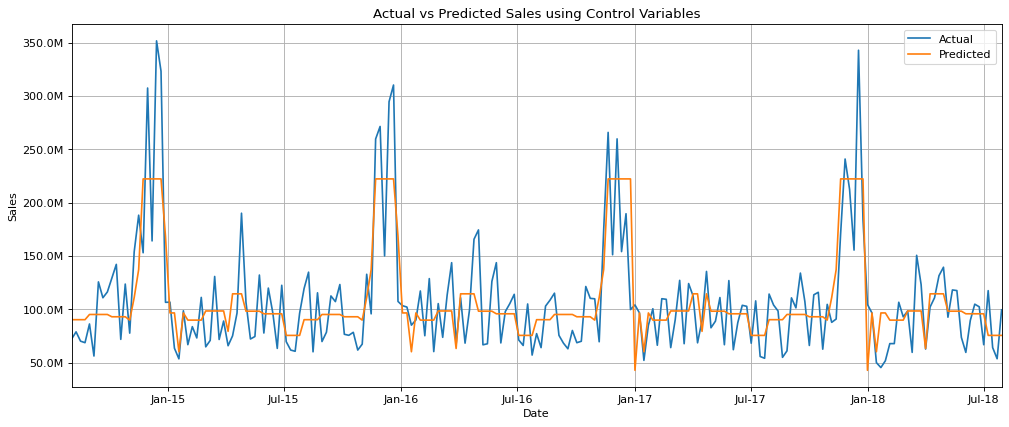

In [ ]:
# Defining Actual and Predicted values
y_hatc = ols1.predict(control_ols)
df_temp = pd.DataFrame({'Actual': y, 'Predicted':y_hatc})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
ax.plot(y1, label = 'Actual')
ax.plot(y2, label = 'Predicted')
plt.title('Actual vs Predicted Sales using Control Variables')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

In [ ]:
control_ols2 = sm.add_constant(back_control2)
ols2 = sm.OLS(y,control_ols2).fit()

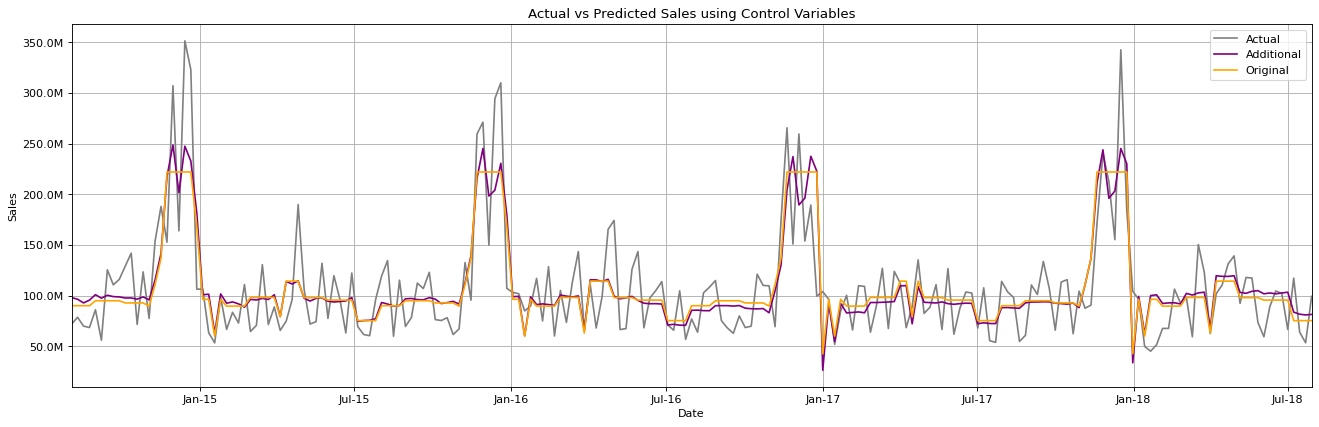

In [ ]:
# Defining Actual and Predicted values
y_hatb = ols2.predict(control_ols2)
df_temp = pd.DataFrame({'Actual': y, 'Additional':y_hatb, 'Original':y_hatc})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Additional']
y3 = df_temp['Original']
ax.plot(y1, label = 'Actual',color='grey')
ax.plot(y2, label = 'Additional',color='purple')
ax.plot(y3, label = 'Original',color='orange')
plt.title('Actual vs Predicted Sales using Control Variables')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

## Basic Media OLS

### All Variables

In [ ]:
fit_ols_6040(x,y)

Test RMSE: 6144.377
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     7.025
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.57e-13
Time:                        14:42:08   Log-Likelihood:                -2281.9
No. Observations:                 125   AIC:                             4680.
Df Residuals:                      67   BIC:                             4844.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(x,y)

Drop st_ct with p-value 0.9674369970102277
Drop hldy_Columbus Day with p-value 0.9315944193821791
Drop hldy_Christmas Day with p-value 0.9161151412981932
Drop mdip_auddig with p-value 0.8935638365246541
Drop mdip_viddig with p-value 0.87173069526363
Drop mdsp_nsp with p-value 0.8216038117599581
Drop mdsp_auddig with p-value 0.7544655057637749
Drop mdip_inst with p-value 0.7327327205560124
Drop hldy_Prime Day with p-value 0.720070602905408
Drop mdsp_so with p-value 0.5894628306498291
Drop mdip_nsp with p-value 0.62762457584013
Drop mdip_audtr with p-value 0.5314020051326563
Drop hldy_Cyber Monday with p-value 0.5020672552671697
Drop hldy_Valentine's Day with p-value 0.43785976989385744
Drop mdsp_on with p-value 0.42284017683958086
Drop mdsp_vidtr with p-value 0.4343379276539753
Drop mdsp_dm with p-value 0.43554876736776904
Drop hldy_July 4th with p-value 0.4101404160011711
Drop mdip_em with p-value 0.34511194307760795
Drop mdip_aff with p-value 0.3182681070267109
Drop mdsp_viddig with p

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_x_nonsc = x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_x_nonsc,y)

Test RMSE: 5297.565
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     13.35
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           9.04e-22
Time:                        14:42:09   Log-Likelihood:                -2311.1
No. Observations:                 125   AIC:                             4674.
Df Residuals:                      99   BIC:                             4748.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_x_nonsc_con = sm.add_constant(back_x_nonsc)
X_train, X_test, y_train, y_test = train_test_split(back_x_nonsc_con, y, test_size=.4, random_state=0)
x_ols = sm.OLS(y_train,X_train).fit()

In [ ]:
corr = round(y.corr(x_ols.fittedvalues),2)

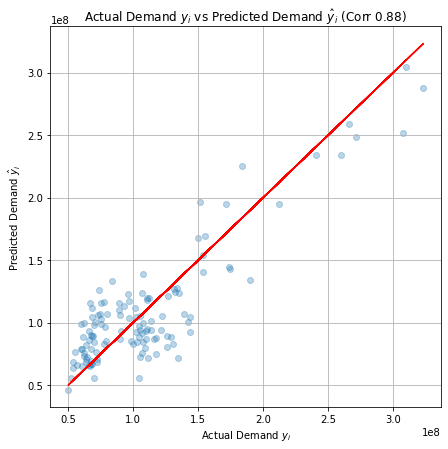

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.3)
plt.plot(y_train, y_train , color='r')

plt.xlabel('Actual Demand $y _i$')
plt.ylabel('Predicted Demand $\hat y _i$')
plt.title(f'Actual Demand $y _i$ vs Predicted Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

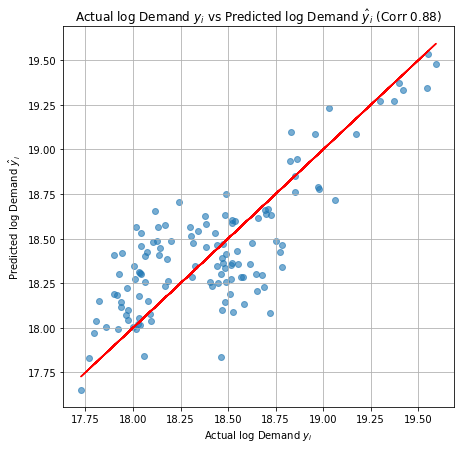

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(np.log(y_train), np.log(x_ols.fittedvalues), alpha=0.6)
plt.plot(np.log(y_train), np.log(y_train) , color='r')

plt.xlabel('Actual log Demand $y _i$')
plt.ylabel('Predicted log Demand $\hat y _i$')
plt.title(f'Actual log Demand $y _i$ vs Predicted log Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

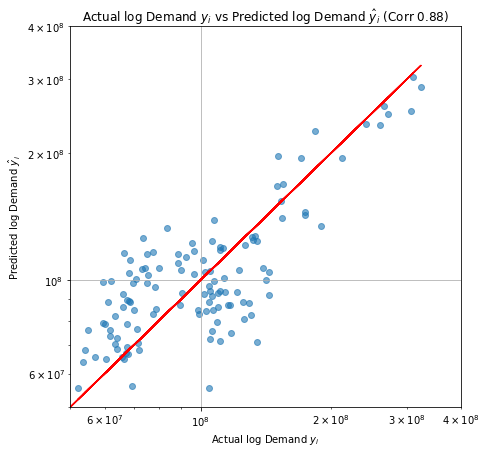

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.6)
plt.plot(y_train,y_train , color='r')

plt.ylim(0.5e+8,4e+8)
plt.xlim(0.5e+8,4e+8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual log Demand $y _i$')
plt.ylabel('Predicted log Demand $\hat y _i$')
plt.title(f'Actual log Demand $y _i$ vs Predicted log Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

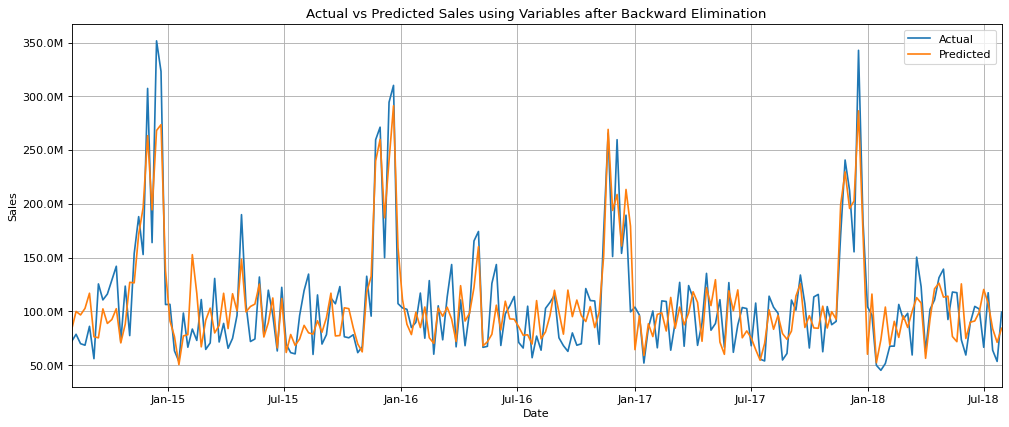

In [ ]:
# Build model on whole dataset 
xall_ols = sm.OLS(y,back_x_nonsc_con).fit()

# Defining Actual and Predicted values
y_hat = xall_ols.predict(back_x_nonsc_con)
df_temp = pd.DataFrame({'Actual': y, 'Predicted':y_hat})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
ax.plot(y1, label = 'Actual')
ax.plot(y2, label = 'Predicted')
plt.title('Actual vs Predicted Sales using Variables after Backward Elimination')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

#### Scaled

In [ ]:
fit_ols_6040(scaled_x,y)

Test RMSE: 6144.377
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     7.025
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.57e-13
Time:                        14:42:11   Log-Likelihood:                -2281.9
No. Observations:                 125   AIC:                             4680.
Df Residuals:                      67   BIC:                             4844.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(scaled_x,y)

Drop st_ct with p-value 0.9674369970101353
Drop hldy_Columbus Day with p-value 0.9315944193821835
Drop hldy_Christmas Day with p-value 0.9161151412981925
Drop mdip_auddig with p-value 0.8935638365241831
Drop mdip_viddig with p-value 0.871730695265156
Drop mdsp_nsp with p-value 0.8216038117597598
Drop mdsp_auddig with p-value 0.7544655057640981
Drop mdip_inst with p-value 0.7327327205499194
Drop hldy_Prime Day with p-value 0.7200706029054169
Drop mdsp_so with p-value 0.5894628306501167
Drop mdip_nsp with p-value 0.6276245758315515
Drop mdip_audtr with p-value 0.5314020048586766
Drop hldy_Cyber Monday with p-value 0.5020672552671719
Drop hldy_Valentine's Day with p-value 0.4378597698938522
Drop mdsp_on with p-value 0.4228401768392738
Drop mdsp_vidtr with p-value 0.43433792765044543
Drop mdsp_dm with p-value 0.4355487673680155
Drop hldy_July 4th with p-value 0.41014041600117046
Drop mdip_em with p-value 0.34511194307213344
Drop mdip_aff with p-value 0.318268107025879
Drop mdsp_viddig with

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_x = scaled_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_x,y)

Test RMSE: 5297.565
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     13.35
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           9.04e-22
Time:                        14:42:12   Log-Likelihood:                -2311.1
No. Observations:                 125   AIC:                             4674.
Df Residuals:                      99   BIC:                             4748.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_x_con = sm.add_constant(back_x)
X_train, X_test, y_train, y_test = train_test_split(back_x_con, y, test_size=.4, random_state=0)
x_ols = sm.OLS(y_train,X_train).fit()

In [ ]:
corr = round(y.corr(x_ols.fittedvalues),2)

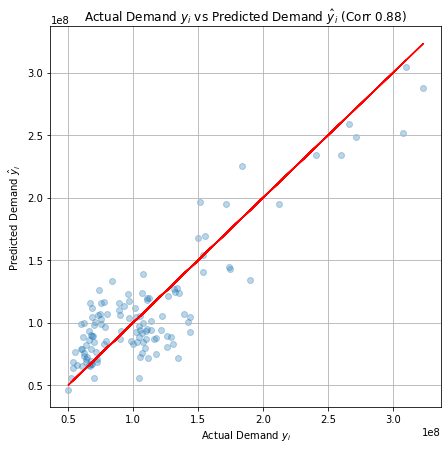

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.3)
plt.plot(y_train, y_train , color='r')

plt.xlabel('Actual Demand $y _i$')
plt.ylabel('Predicted Demand $\hat y _i$')
plt.title(f'Actual Demand $y _i$ vs Predicted Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

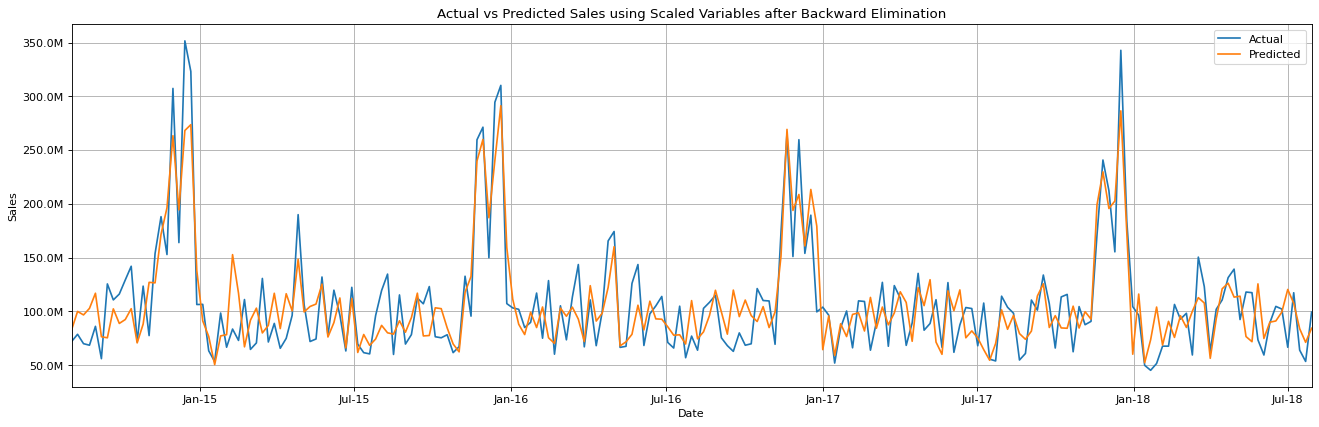

In [ ]:
# Build model on whole dataset 
xall_ols = sm.OLS(y,back_x_con).fit()

# Defining Actual and Predicted values
y_hats = xall_ols.predict(back_x_con)
df_temp = pd.DataFrame({'Actual': y, 'Predicted':y_hats})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
ax.plot(y1, label = 'Actual')
ax.plot(y2, label = 'Predicted')
plt.title('Actual vs Predicted Sales using Scaled Variables after Backward Elimination')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

#### Normalised

In [ ]:
fit_ols_6040(norm_x,y)

Test RMSE: 6120.313
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     7.233
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           6.26e-14
Time:                        14:42:13   Log-Likelihood:                -2282.1
No. Observations:                 125   AIC:                             4678.
Df Residuals:                      68   BIC:                             4839.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(norm_x,y)

Drop st_ct with p-value 0.9483125532375072
Drop hldy_Columbus Day with p-value 0.9434374301891677
Drop mdip_auddig with p-value 0.9324413435764407
Drop mdip_viddig with p-value 0.8772741994248998
Drop hldy_Christmas Day with p-value 0.8412482532952322
Drop mdsp_auddig with p-value 0.7544655057640941
Drop mdip_inst with p-value 0.7327327205499272
Drop hldy_Prime Day with p-value 0.7200706029054209
Drop mdsp_so with p-value 0.5894628306501211
Drop mdip_nsp with p-value 0.6276245758315613
Drop mdip_audtr with p-value 0.5314020048586727
Drop hldy_Cyber Monday with p-value 0.5020672552671771
Drop hldy_Valentine's Day with p-value 0.43785976989385955
Drop mdsp_on with p-value 0.4228401768392773
Drop mdsp_vidtr with p-value 0.4343379276504403
Drop mdsp_dm with p-value 0.43554876736802206
Drop hldy_July 4th with p-value 0.41014041600117446
Drop mdip_em with p-value 0.34511194307211546
Drop mdip_aff with p-value 0.318268107025882
Drop mdsp_viddig with p-value 0.3007158642376082
Drop hldy_Presid

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_norm = norm_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45',
 'hldy_MLK',
 'hldy_Christmas Day',
 "hldy_New Year's Day"]]

In [ ]:
fit_ols_6040(back_norm,y)

Test RMSE: 5297.565
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     13.35
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           9.04e-22
Time:                        14:42:14   Log-Likelihood:                -2311.1
No. Observations:                 125   AIC:                             4674.
Df Residuals:                      99   BIC:                             4748.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_norm_con = sm.add_constant(back_norm)
X_train, X_test, y_train, y_test = train_test_split(back_norm_con, y, test_size=.5, random_state=0)
x_ols = sm.OLS(y_train,X_train).fit()

In [ ]:
corr = round(y.corr(x_ols.fittedvalues),2)

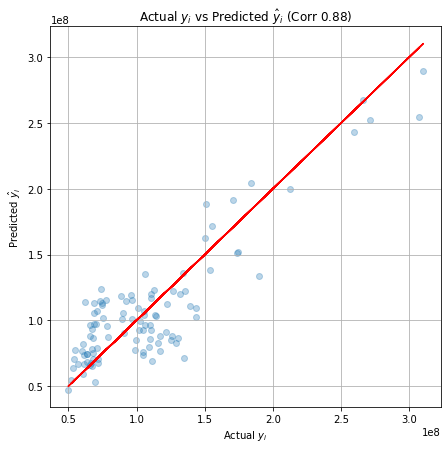

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.3)
plt.plot(y_train, y_train , color='r')

plt.xlabel('Actual $y _i$')
plt.ylabel('Predicted $\hat y _i$')
plt.title(f'Actual $y _i$ vs Predicted $\hat y _i$ (Corr {corr})')
plt.grid('--')

In [ ]:
y_hats.head()

wk_strt_dt
2014-08-03    82982878.23
2014-08-10   100051016.08
2014-08-17    96806373.47
2014-08-24   102909470.04
2014-08-31   116966912.36
dtype: float64

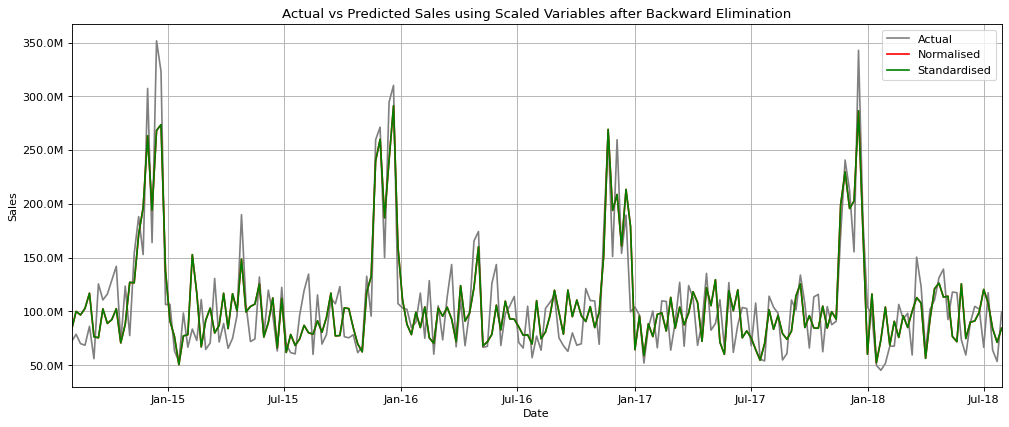

In [ ]:
# Build model on whole dataset 
xall_ols = sm.OLS(y,back_norm_con).fit()

# Defining Actual and Predicted values
y_hatn = xall_ols.predict(back_norm_con)
df_temp = pd.DataFrame({'Actual': y, 'Normalised':y_hatn, 'Standardised':y_hats})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
ay1 = df_temp['Actual']
py2 = df_temp['Normalised']
py3 = df_temp['Standardised']
ax.plot(ay1, label = 'Actual',color='grey')
ax.plot(py2, label = 'Normalised',color='r')
ax.plot(py3, label = 'Standardised',color='g')
plt.title('Actual vs Predicted Sales using Scaled Variables after Backward Elimination')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

### Spend

In [ ]:
fit_ols_6040(X_spend,y)

Test RMSE: 5621.687
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     22.31
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.50e-22
Time:                        14:42:14   Log-Likelihood:                -2335.5
No. Observations:                 125   AIC:                             4693.
Df Residuals:                     114   BIC:                             4724.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.806e+07   9.83e

(None, None)

### Impressions

In [ ]:
fit_ols_6040(X_imp,y)

Test RMSE: 5307.777
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     16.28
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           3.72e-20
Time:                        14:42:14   Log-Likelihood:                -2336.6
No. Observations:                 125   AIC:                             4701.
Df Residuals:                     111   BIC:                             4741.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.596e+07   1.16e

(None, None)

## Log-Lin OLS + Controls

In [ ]:
logy = np.log(y)

In [ ]:
fit_ols_6040(x,logy)

Test RMSE: 0.579
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3.963
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           6.25e-08
Time:                        14:42:14   Log-Likelihood:                 25.437
No. Observations:                 125   AIC:                             65.13
Df Residuals:                      67   BIC:                             229.2
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const          

(None, None)

In [ ]:
backward_elim10(x,logy)

Drop mdip_viddig with p-value 0.9901015329773537
Drop mdsp_nsp with p-value 0.9655438231912035
Drop hldy_Valentine's Day with p-value 0.9310458112330898
Drop mdsp_on with p-value 0.9051232571892751
Drop hldy_Christmas Day with p-value 0.892596851695159
Drop hldy_July 4th with p-value 0.8777251120494769
Drop hldy_Columbus Day with p-value 0.855160541349506
Drop mdip_nsp with p-value 0.8121577802844738
Drop st_ct with p-value 0.8163710514417557
Drop mdip_audtr with p-value 0.7734147151868226
Drop mdsp_viddig with p-value 0.7876943977274893
Drop hldy_Cyber Monday with p-value 0.7295801631306807
Drop hldy_New Year's Day with p-value 0.6740078145342516
Drop mdsp_auddig with p-value 0.6703374518634604
Drop hldy_Labor Day with p-value 0.6806041987590319
Drop mdsp_sem with p-value 0.5683663309160605
Drop mdip_inst with p-value 0.5677497422739992
Drop mdsp_so with p-value 0.4660912411144408
Drop hldy_Black Friday with p-value 0.5463183395469662
Drop mdsp_inst with p-value 0.5451563807886681
Dro

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 'hldy_Memorial Day',
 'hldy_Presidents Day',
 'seas_prd_1',
 'seas_prd_6']

In [ ]:
back_logy = x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 'hldy_Memorial Day',
 'hldy_Presidents Day',
 'seas_prd_1',
 'seas_prd_6',
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_logy,logy)

Test RMSE: 0.492
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     15.12
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.14e-18
Time:                        14:42:15   Log-Likelihood:                -6.5565
No. Observations:                 125   AIC:                             39.11
Df Residuals:                     112   BIC:                             75.88
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

(None, None)

### Normalised

In [ ]:
logy = np.log(y)

In [ ]:
fit_ols_6040(norm_x,logy)

Test RMSE: 0.576
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4.072
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           3.37e-08
Time:                        14:42:15   Log-Likelihood:                 25.185
No. Observations:                 125   AIC:                             63.63
Df Residuals:                      68   BIC:                             224.8
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const          

(None, None)

In [ ]:
backward_elim10(norm_x,logy)

Drop mdip_viddig with p-value 0.9884077291899718
Drop hldy_Valentine's Day with p-value 0.9310458112331124
Drop mdsp_on with p-value 0.9051232572265903
Drop hldy_Christmas Day with p-value 0.8925968516951981
Drop hldy_July 4th with p-value 0.8777251120494507
Drop hldy_Columbus Day with p-value 0.8551605413473592
Drop mdip_nsp with p-value 0.812157779299536
Drop st_ct with p-value 0.8163710514438297
Drop mdip_audtr with p-value 0.7734147150912456
Drop mdsp_viddig with p-value 0.787694397733693
Drop hldy_Cyber Monday with p-value 0.7295801631306337
Drop hldy_New Year's Day with p-value 0.6740078145342617
Drop mdsp_auddig with p-value 0.6703374518502966
Drop hldy_Labor Day with p-value 0.6806041987591372
Drop mdsp_sem with p-value 0.5683663309271092
Drop mdip_inst with p-value 0.567749742705878
Drop mdsp_so with p-value 0.46609124097943044
Drop hldy_Black Friday with p-value 0.5463183395470408
Drop mdsp_inst with p-value 0.5451563807992927
Drop hldy_Mother's Day with p-value 0.48098974171

['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 'hldy_Memorial Day',
 'hldy_Presidents Day',
 'seas_prd_1',
 'seas_prd_6']

In [ ]:
back_logy = norm_x[['mdsp_audtr',
 'mdip_vidtr',
 'mdip_so',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 'hldy_Memorial Day',
 'hldy_Presidents Day',
 'seas_prd_1',
 'seas_prd_6',
 "hldy_New Year's Day",
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_logy,logy)

Test RMSE: 0.492
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     13.88
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.70e-18
Time:                        14:42:16   Log-Likelihood:                -6.4309
No. Observations:                 125   AIC:                             40.86
Df Residuals:                     111   BIC:                             80.46
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

(None, None)

## Log-Log OLS + Controls

In [ ]:
epsilon = 1e-5
logx = np.log(media+epsilon)

In [ ]:
logx.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  \
wk_strt_dt                                                                      
2014-08-03    15.40      17.19     14.70        13.45       17.45       16.12   
2014-08-10    16.85      15.94     15.20        13.07       16.31       16.10   
2014-08-17    16.22      16.66     14.43        13.57       15.57       15.79   
2014-08-24    13.84      16.73     14.69        13.85       16.31       15.97   
2014-08-31    16.87      17.10     15.01        12.90       17.27       16.80   

            mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  \
wk_strt_dt                                                               
2014-08-03        14.56   -11.51    15.00    14.23     10.21     12.20   
2014-08-10        13.28   -11.51    15.26    14.62     10.22     11.73   
2014-08-17        13.83   -11.51    15.30    14.30     10.92     12.14   
2014-08-24        14.58   -11.51    15.71    14.46     10.39     11.71   
2014-08-31        14.69   -11.51    15.29    14.76     10.93     12.25   

            mdip_sem  mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  \
wk_strt_dt                                                                    
2014-08-03     11.33    13.43      11.77     13.14         7.90       12.45   
2014-08-10     11.33    13.40      11.16     13.35         8.53       11.58   
2014-08-17     11.29    14.44      11.59     12.53         7.87       10.99   
2014-08-24     11.84    12.63      11.86     12.13         8.70       12.09   
2014-08-31     11.38    14.68      11.99     13.47         8.55       11.88   

            mdsp_vidtr  mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  
wk_strt_dt                                                       
2014-08-03       12.29        10.72   -11.51    11.02     12.78  
2014-08-10       11.60         7.97   -11.51    11.80     12.73  
2014-08-17       11.21         9.00   -11.51    11.25     12.75  
2014-08-24       11.62         8.78   -11.51    12.17     12.81  
2014-08-31       12.32         9.87   -11.51    12.43     12.90

In [ ]:
logx_con = logx.merge(back_control2, left_index=True, right_index=True)

In [ ]:
fit_ols_6040(logx_con,logy)

Test RMSE: 0.546
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3.988
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           4.01e-08
Time:                        14:42:16   Log-Likelihood:                 5.8081
No. Observations:                 125   AIC:                             78.38
Df Residuals:                      80   BIC:                             205.7
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

(None, None)

In [ ]:
backward_elim10(logx_con,logy)

Drop mdsp_viddig with p-value 0.9308205715805857
Drop mdsp_dm with p-value 0.8758489952910724
Drop mdip_sms with p-value 0.8268231621278062
Drop hldy_Christmas Day with p-value 0.8138035210638942
Drop mdip_audtr with p-value 0.8080381937039445
Drop mdip_inst with p-value 0.7602716977335309
Drop mdsp_auddig with p-value 0.71329142928347
Drop mdip_on with p-value 0.6683895976968333
Drop mdip_em with p-value 0.7020152407684097
Drop mdip_viddig with p-value 0.5073448973925265
Drop mdip_aff with p-value 0.4461417096816278
Drop mdsp_vidtr with p-value 0.3831513053803367
Drop hldy_Green Monday with p-value 0.33126579776462917
Drop hldy_New Year's Day with p-value 0.2907595471342579
Drop mdip_dm with p-value 0.3052242911678573
Drop mdsp_nsp with p-value 0.250878886382217
Drop mdip_nsp with p-value 0.9054149925935244
Drop mdsp_audtr with p-value 0.268677431510218
Drop seas_week_45 with p-value 0.23003087054266122
Drop mdip_so with p-value 0.27257756154656004
Drop hldy_Black Friday with p-value 

['mdip_auddig',
 'mdip_vidtr',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'mrkdn_pdm']

In [ ]:
loglog = logx_con[['mdip_auddig',
 'mdip_vidtr',
 'mdip_sem',
 'hldy_Easter',
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'mrkdn_pdm',
 'hldy_MLK',
 "hldy_Christmas Day",
 "hldy_New Year's Day"]]

In [ ]:
fit_ols_6040(loglog, logy)

Test RMSE: 0.519
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     8.584
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.44e-14
Time:                        14:42:17   Log-Likelihood:                -3.5249
No. Observations:                 125   AIC:                             51.05
Df Residuals:                     103   BIC:                             113.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

(None, None)

## Adstock

### Functions

In [ ]:
# 1.1.1 Basic Adstock function
def basic_adstock(x, L, D):
  return lfilter([1], [1, -D], x+[0]*L)

In [ ]:
def adstock_transform(df, md_cols,L,D):
  df_adstock = pd.DataFrame()
  for md_col in md_cols:
    adstock = basic_adstock(df[md_col].to_list(),L, D)
    df_adstock[md_col] = adstock
  df_adstock = df_adstock[:-L]
  return df_adstock

In [ ]:
def adstock_optimised(df,md_cols,y,L):
  for md_col in md_cols:
    corrs = []
    decay = np.linspace(0,1,50)
    dmax = 0
    corrmax = -1
    for D in decay:
      xi = adstock_transform(df,md_cols,L,D)[md_col]
      corr = np.corrcoef(xi, y)[0][1]
      corrs.append(corr)
      if corr > corrmax:
       dmax = D
       corrmax = corr
       
    plt.title(f"Optimal Decay Rate for {md_col} is {dmax:.3f} with {corrmax:.3f} correlation")
    plt.plot(decay, corrs, label="Correlation")
    plt.xlabel("Decay Rate")
    plt.ylabel("Correlation")
    plt.legend()
    plt.show()

In [ ]:
def applied_optimised_adstock(df,md_cols,y,L):
  df_opt_adstock = pd.DataFrame()
  for md_col in md_cols:
    corrs = []
    decay = np.linspace(0,1,50)
    dmax = 0
    corrmax = -1
    for D in decay:
      xi = adstock_transform(df,md_cols,L,D)[md_col]
      corr = np.corrcoef(xi, y)[0][1]
      corrs.append(corr)
      if corr > corrmax:
       dmax = D
       corrmax = corr
    #Applying optimal adstock function on each variable
    adstock = basic_adstock(df[md_col].to_list(),L, dmax)
    df_opt_adstock[md_col] = adstock
  #Merge adstocked variables back to the dataframe
  df_opt_adstock = df_opt_adstock[:-L]
  df_opt_adstock.index = df.index
  df_merge = df_opt_adstock.merge(df[df.columns.drop(md_cols)],left_index=True,right_index=True)
  return df_merge

### Applied

#### All

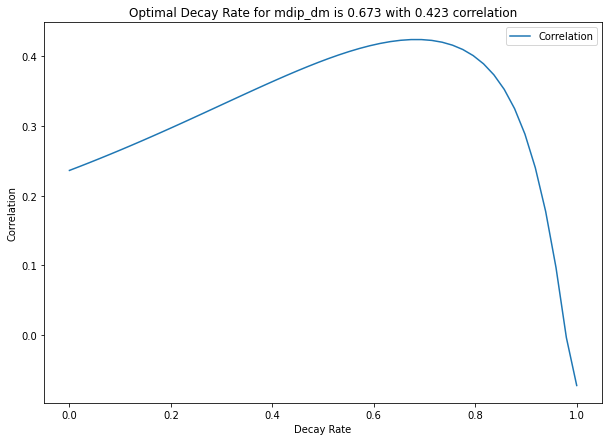

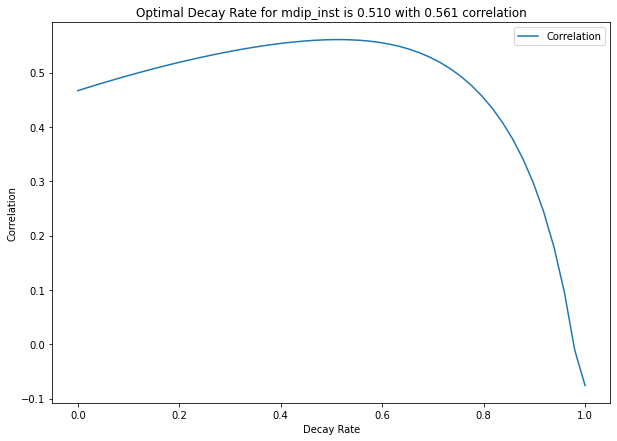

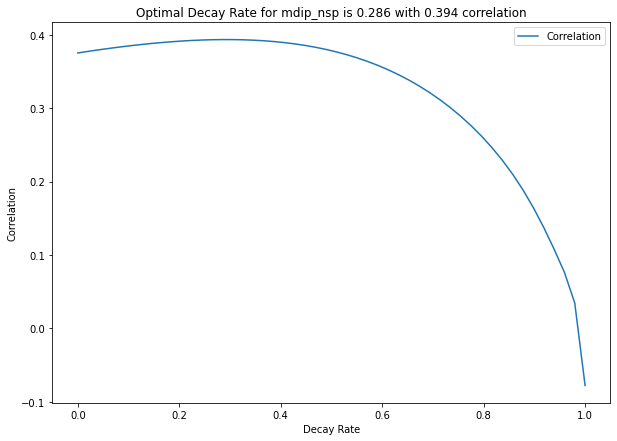

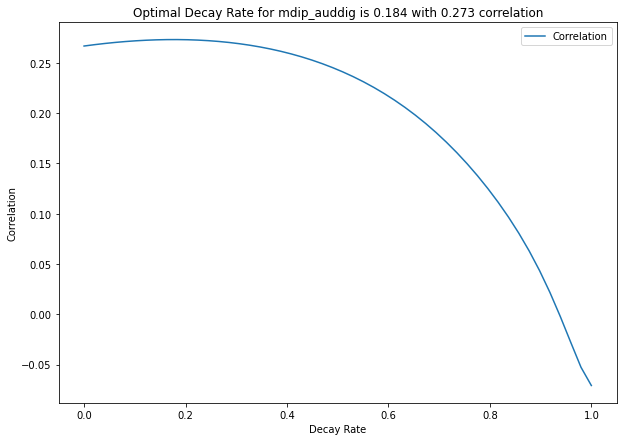

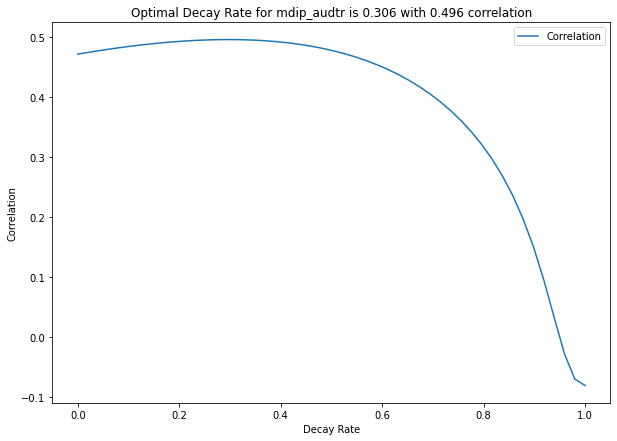

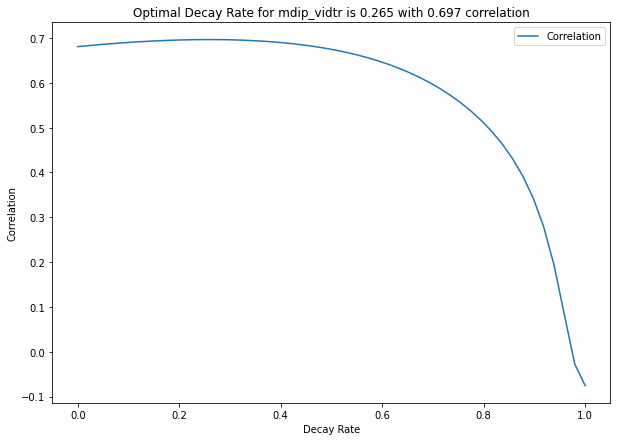

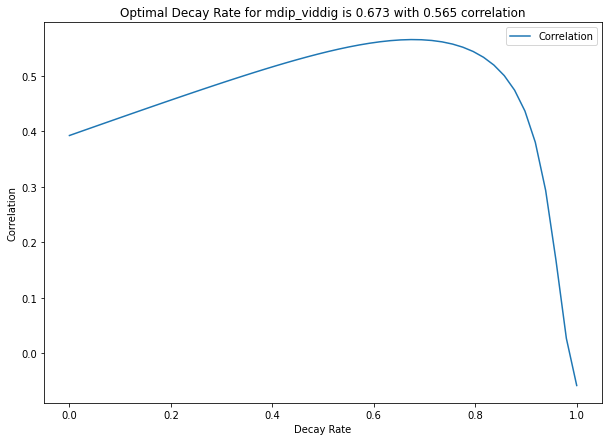

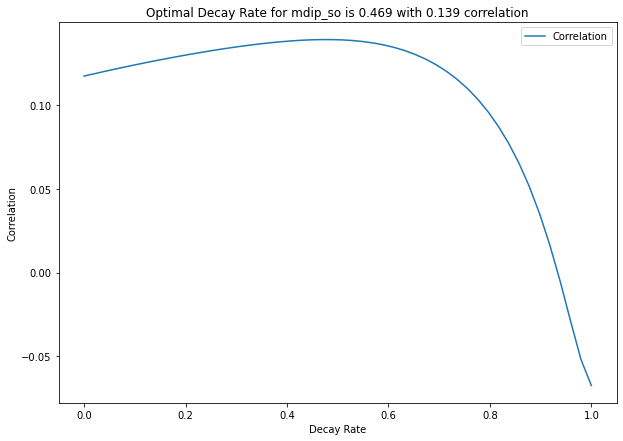

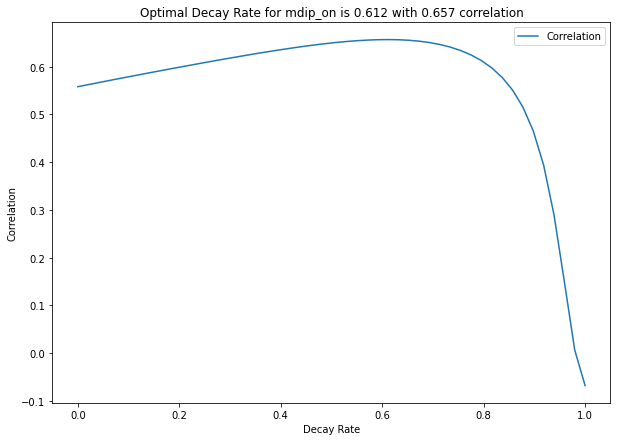

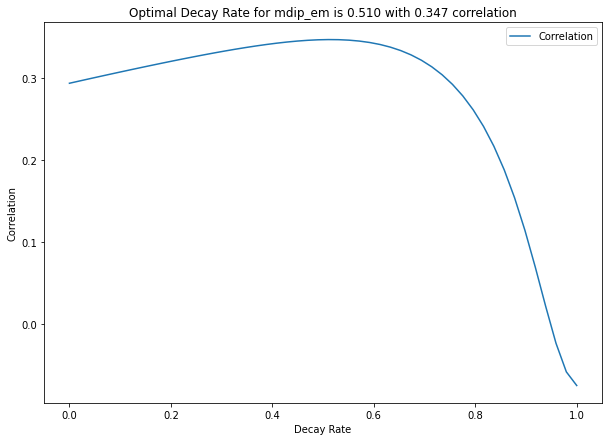

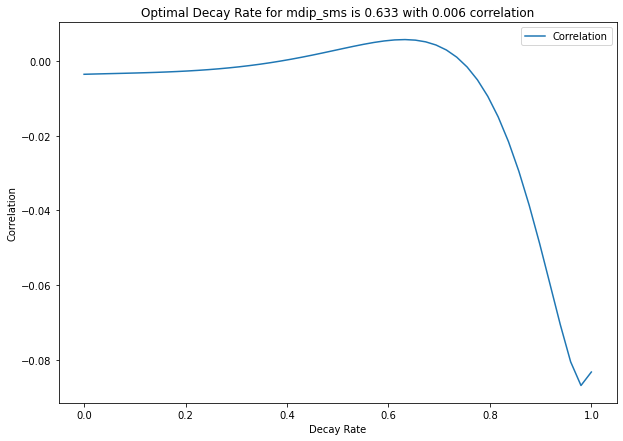

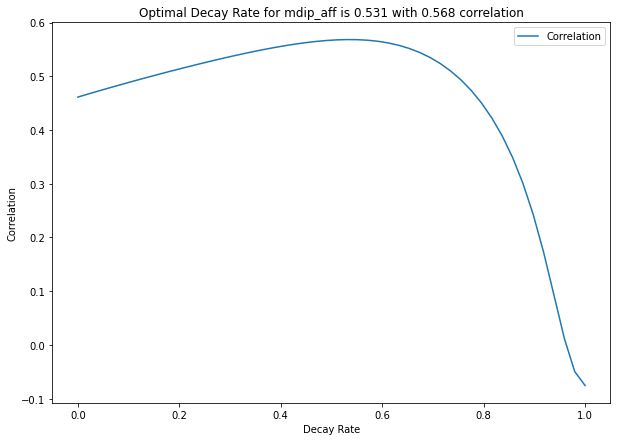

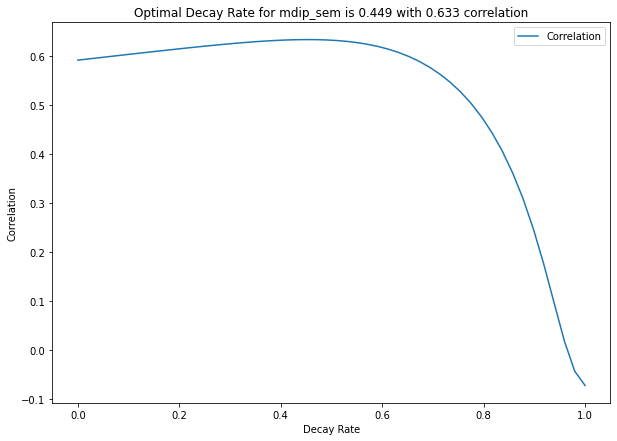

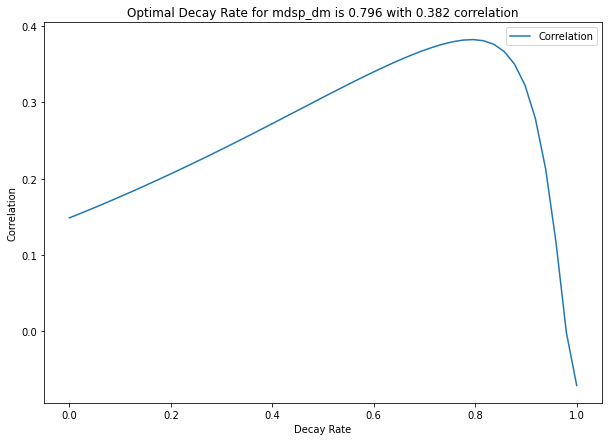

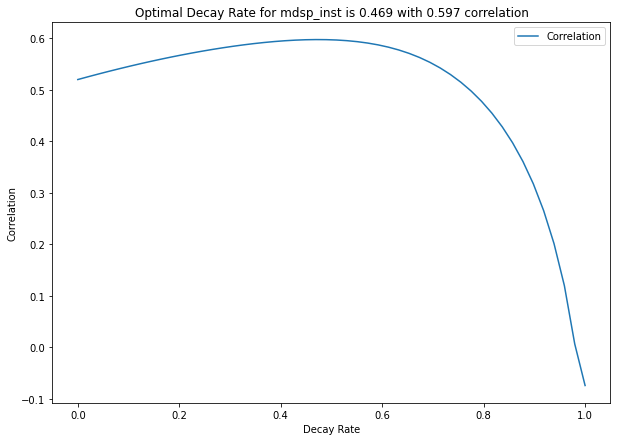

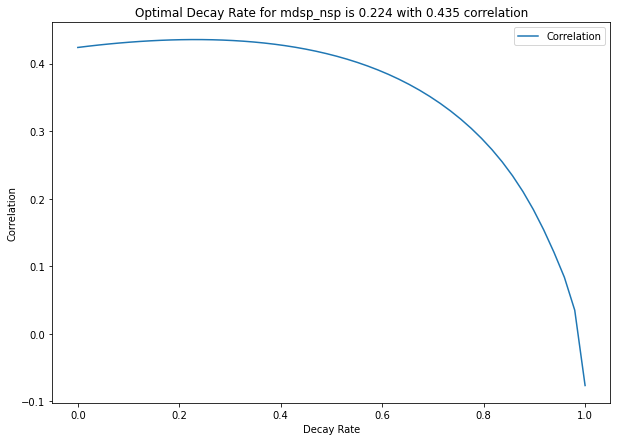

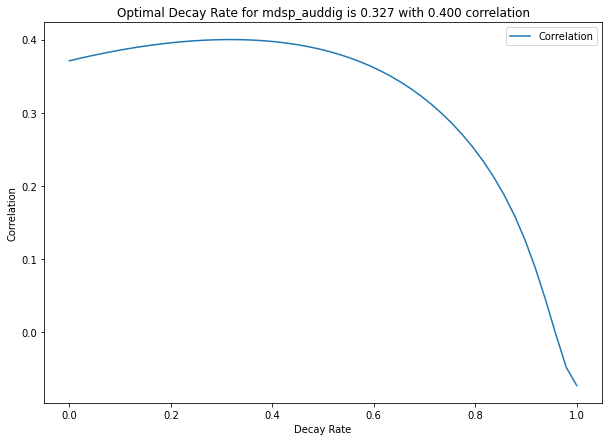

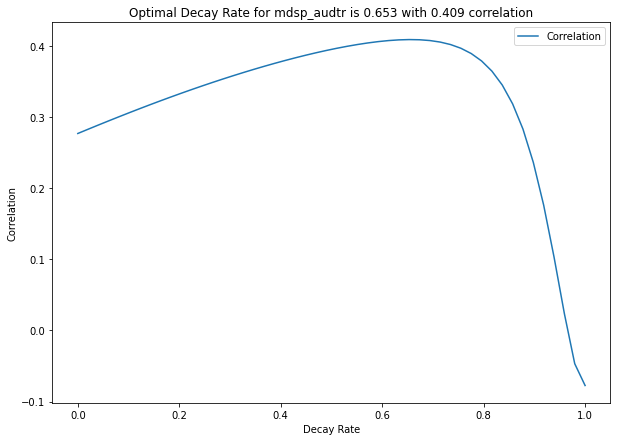

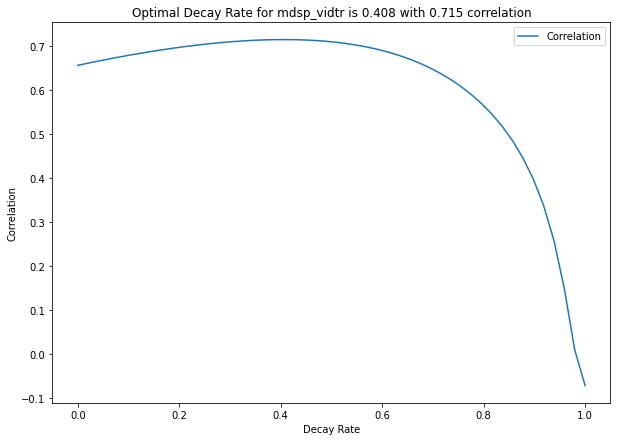

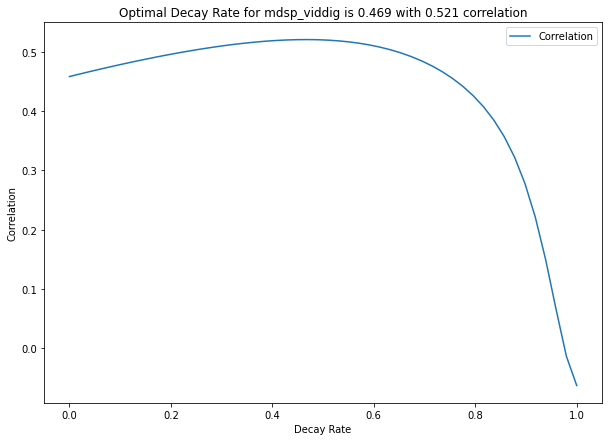

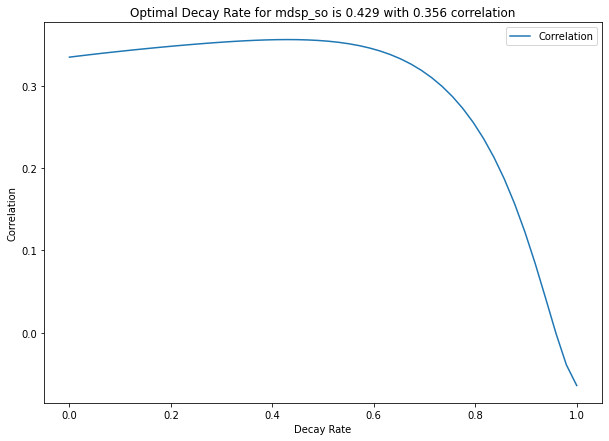

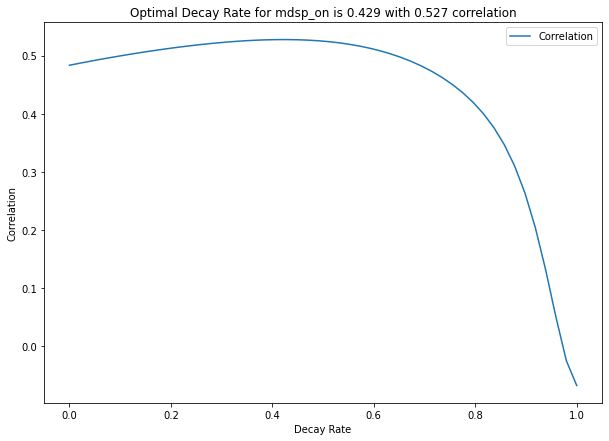

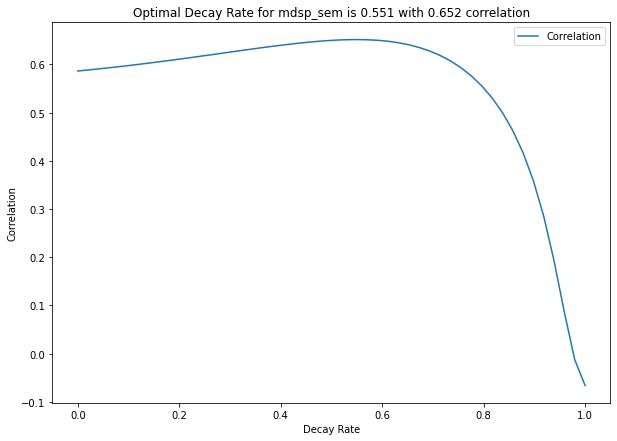

In [ ]:
adstock_optimised(media,med_col,y,8)

In [ ]:
med_ad = applied_optimised_adstock(x,med_col,y,8)

In [ ]:
med_ad.head()

mdip_dm   mdip_inst   mdip_nsp  mdip_auddig  mdip_audtr  \
wk_strt_dt                                                               
2014-08-03  4863885.00 29087520.00 2421933.00    692315.00 37778097.00   
2014-08-10 24163179.65 23185691.43 4676474.86    602969.90 23628380.57   
2014-08-17 27370885.81 29106234.40 3182967.67    895481.57 13003292.73   
2014-08-24 19456899.71 33318599.59 3304253.34   1196777.21 16154599.81   
2014-08-31 34213437.33 43659205.51 4256080.38    620272.22 36601419.66   

            mdip_vidtr  mdip_viddig  mdip_so     mdip_on    mdip_em  mdip_sms  \
wk_strt_dt                                                                      
2014-08-03 10038746.00   2111112.00     0.00  3271007.00 1514755.00  27281.00   
2014-08-10 12511317.78   2008953.31     0.00  6263372.35 3007403.18  44790.41   
2014-08-17 10554665.21   2368626.55     0.00  8240709.76 3151379.38  83603.79   
2014-08-24 11425339.30   3744357.47     0.00 11683652.51 3505844.62  85362.19   
2014-08-31 22816869.47   4930371.14     0.00 11501008.64 4357854.24 109882.65   

            mdip_aff  mdip_sem    mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  \
wk_strt_dt                                                                    
2014-08-03 197828.00  83054.00  678410.26  129759.66 507635.16      2700.69   
2014-08-10 228657.96 120413.55 1201056.90  131262.93 739678.28      5921.21   
2014-08-17 308109.71 133831.23 2830281.67  169333.58 443582.84      4544.39   
2014-08-24 285875.79 199023.49 2559256.54  221191.72 285608.43      7516.79   
2014-08-31 361658.19 176888.49 4403233.45  264515.98 770810.27      7641.78   

            mdsp_audtr  mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_on  mdsp_sem  \
wk_strt_dt                                                                     
2014-08-03   254134.14   216725.59     45397.90     0.00  61364.75 355954.51   
2014-08-10   272568.13   197378.68     24212.58     0.00 158943.08 532444.92   
2014-08-17   237015.10   154594.92     19475.57     0.00 144859.73 638175.98   
2014-08-24   332795.83   174095.63     15657.81     0.00 255126.29 717143.10   
2014-08-31   361433.61   296200.28     26730.71     0.00 358952.73 796949.83   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  \
wk_strt_dt                                                               
2014-08-03       82.50        3.60 716.29              0.00       0.37   
2014-08-10       82.50        3.58 716.43              0.00       0.36   
2014-08-17       82.50        3.55 717.00              0.00       0.34   
2014-08-24       82.50        3.53 717.00              0.00       0.36   
2014-08-31       84.60        3.54 717.00              0.00       0.36   

            hldy_Black Friday  hldy_Christmas Day  hldy_Columbus Day  \
wk_strt_dt                                                             
2014-08-03                  0                   0                  0   
2014-08-10                  0                   0                  0   
2014-08-17                  0                   0                  0   
2014-08-24                  0                   0                  0   
2014-08-31                  0                   0                  0   

            hldy_Cyber Monday  hldy_Easter  hldy_Father's Day  \
wk_strt_dt                                                      
2014-08-03                  0            0                  0   
2014-08-10                  0            0                  0   
2014-08-17                  0            0                  0   
2014-08-24                  0            0                  0   
2014-08-31                  0            0                  0   

            hldy_Green Monday  hldy_July 4th  hldy_Labor Day  hldy_MLK  \
wk_strt_dt                                                               
2014-08-03                  0              0               0         0   
2014-08-10                  0              0               0         0   
2014-08-17                  0        

##### Standardise Adstock

In [ ]:
sc_ad_data = med_ad[spe_col+imp_col+con1_col]

In [ ]:
scaler = StandardScaler()
scaled_ad = scaler.fit_transform(sc_ad_data)
scaled_ad = pd.DataFrame(scaled_ad)
scaled_ad.index = med_ad.index
scaled_ad.columns = sc_ad_data.columns

In [ ]:
scaled_ad.head()

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
wk_strt_dt                                                                      
2014-08-03    -2.85      -0.21      0.44        -0.94       -0.99       -0.29   
2014-08-10    -2.36      -0.19      1.00         0.07       -0.81       -0.37   
2014-08-17    -0.81       0.21      0.28        -0.36       -1.17       -0.55   
2014-08-24    -1.07       0.76     -0.10         0.57       -0.19       -0.47   
2014-08-31     0.68       1.22      1.08         0.61        0.10        0.05   

            mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  mdip_dm  mdip_inst  \
wk_strt_dt                                                                
2014-08-03         0.42    -1.19    -1.70     -1.17    -2.05       0.25   
2014-08-10        -0.42    -1.19    -1.18     -0.97    -0.42      -0.15   
2014-08-17        -0.61    -1.19    -1.25     -0.85    -0.15       0.25   
2014-08-24        -0.76    -1.19    -0.66     -0.76    -0.82       0.54   
2014-08-31        -0.32    -1.19    -0.10     -0.67     0.44       1.24   

            mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
wk_strt_dt                                                               
2014-08-03      0.05        -0.59        0.25       -0.30        -0.56   
2014-08-10      0.84        -0.69       -0.50       -0.08        -0.60   
2014-08-17      0.32        -0.37       -1.06       -0.26        -0.44   
2014-08-24      0.36        -0.03       -0.89       -0.18         0.18   
2014-08-31      0.69        -0.67        0.19        0.85         0.71   

            mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem  \
wk_strt_dt                                                            
2014-08-03    -1.44    -1.74    -2.50     -2.25     -1.78     -1.80   
2014-08-10    -1.44    -1.15    -1.85     -2.05     -1.65     -1.58   
2014-08-17    -1.44    -0.77    -1.79     -1.61     -1.31     -1.50   
2014-08-24    -1.44    -0.09    -1.63     -1.59     -1.41     -1.12   
2014-08-31    -1.44    -0.13    -1.26     -1.31     -1.08     -1.25   

            me_ics_all  me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  
wk_strt_dt                                                              
2014-08-03       -2.71        2.98   1.26             -3.55       1.72  
2014-08-10       -2.71        2.94   1.26             -3.55       1.32  
2014-08-17       -2.71        2.84   1.27             -3.55       0.42  
2014-08-24       -2.71        2.79   1.27             -3.55       1.10  
2014-08-31       -2.21        2.80   1.27             -3.55       1.27

In [ ]:
scaled_ad_dum = scaled_ad.merge(med_ad[bin1_col],left_index=True,right_index=True)

In [ ]:
fit_ols_6040(scaled_ad_dum,y)

Test RMSE: 6006.565
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6.432
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.37e-12
Time:                        14:42:47   Log-Likelihood:                -2286.6
No. Observations:                 125   AIC:                             4689.
Df Residuals:                      67   BIC:                             4853.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(scaled_ad_dum,y)

Drop mdip_auddig with p-value 0.9902068573607566
Drop mdip_aff with p-value 0.9566186345904193
Drop hldy_Cyber Monday with p-value 0.8909151844763585
Drop hldy_Valentine's Day with p-value 0.8763444223206711
Drop hldy_Prime Day with p-value 0.862866353381537
Drop hldy_Labor Day with p-value 0.7290391002874327
Drop mdsp_auddig with p-value 0.7481603115578059
Drop mdsp_viddig with p-value 0.7469699141713788
Drop hldy_Mother's Day with p-value 0.6719218023696183
Drop mdsp_inst with p-value 0.6297918334322476
Drop st_ct with p-value 0.623517038157052
Drop hldy_Columbus Day with p-value 0.6100855392842313
Drop seas_week_42 with p-value 0.5963948098648995
Drop hldy_Christmas Day with p-value 0.661485236042153
Drop hldy_July 4th with p-value 0.6002551216210523
Drop hldy_Father's Day with p-value 0.5244270499269997
Drop hldy_Veterans Day with p-value 0.5050931308237852
Drop mdsp_dm with p-value 0.5156354687924514
Drop seas_prd_1 with p-value 0.508856439093424
Drop seas_prd_4 with p-value 0.597

['mdsp_audtr',
 'mdsp_sem',
 'mdip_dm',
 'mdip_nsp',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mrkdn_valadd_edw',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_7',
 'seas_week_45']

In [ ]:
back_sc_ad = scaled_ad_dum[['mdsp_audtr',
 'mdsp_sem',
 'mdip_dm',
 'mdip_nsp',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mrkdn_valadd_edw',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_7',
 'seas_week_45',
 'hldy_Christmas Day',
 'hldy_MLK']]

In [ ]:
fit_ols_6040(back_sc_ad,y)

Test RMSE: 5242.837
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     18.59
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.15e-25
Time:                        14:42:48   Log-Likelihood:                -2311.2
No. Observations:                 125   AIC:                             4662.
Df Residuals:                     105   BIC:                             4719.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

##### Normalised Adstock

In [ ]:
norm_ad = minmax.fit_transform(med_ad)
norm_ad = pd.DataFrame(norm_ad)
norm_ad.index = med_ad.index
norm_ad.columns = med_ad.columns

In [ ]:
norm_ad.head()

mdip_dm  mdip_inst  mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  \
wk_strt_dt                                                                      
2014-08-03     0.00       0.24      0.13         0.11        0.30        0.12   
2014-08-10     0.34       0.17      0.25         0.09        0.18        0.15   
2014-08-17     0.40       0.24      0.17         0.14        0.09        0.13   
2014-08-24     0.26       0.28      0.18         0.19        0.12        0.14   
2014-08-31     0.52       0.40      0.23         0.10        0.29        0.29   

            mdip_viddig  mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  \
wk_strt_dt                                                               
2014-08-03         0.12     0.00     0.00     0.00      0.00      0.00   
2014-08-10         0.11     0.00     0.11     0.11      0.04      0.02   
2014-08-17         0.14     0.00     0.18     0.12      0.11      0.08   
2014-08-24         0.25     0.00     0.31     0.15      0.12      0.07   
2014-08-31         0.34     0.00     0.30     0.21      0.17      0.12   

            mdip_sem  mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  \
wk_strt_dt                                                                    
2014-08-03      0.00     0.00       0.14      0.21         0.14        0.23   
2014-08-10      0.04     0.08       0.14      0.31         0.36        0.26   
2014-08-17      0.05     0.33       0.20      0.18         0.27        0.20   
2014-08-24      0.11     0.29       0.27      0.12         0.46        0.36   
2014-08-31      0.09     0.57       0.34      0.32         0.47        0.40   

            mdsp_vidtr  mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  me_ics_all  \
wk_strt_dt                                                                    
2014-08-03        0.14         0.26     0.00     0.00      0.00        0.00   
2014-08-10        0.12         0.12     0.00     0.09      0.03        0.00   
2014-08-17        0.09         0.09     0.00     0.08      0.05        0.00   
2014-08-24        0.11         0.07     0.00     0.19      0.07        0.00   
2014-08-31        0.19         0.14     0.00     0.29      0.09        0.11   

            me_gas_dpg  st_ct  mrkdn_valadd_edw  mrkdn_pdm  hldy_Black Friday  \
wk_strt_dt                                                                      
2014-08-03        1.00   0.98              0.00       0.93               0.00   
2014-08-10        0.99   0.98              0.00       0.82               0.00   
2014-08-17        0.97   0.98              0.00       0.56               0.00   
2014-08-24        0.96   0.98              0.00       0.75               0.00   
2014-08-31        0.97   0.98              0.00       0.80               0.00   

            hldy_Christmas Day  hldy_Columbus Day  hldy_Cyber Monday  \
wk_strt_dt                                                             
2014-08-03                0.00               0.00               0.00   
2014-08-10                0.00               0.00               0.00   
2014-08-17                0.00               0.00               0.00   
2014-08-24                0.00               0.00               0.00   
2014-08-31                0.00               0.00               0.00   

            hldy_Easter  hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
wk_strt_dt                                                                     
2014-08-03         0.00               0.00               0.00           0.00   
2014-08-10         0.00               0.00               0.00           0.00   
2014-08-17         0.00               0.00               0.00           0.00   
2014-08-24         0.00               0.00               0.00           0.00   
2014-08-31         0.00               0.00               0.00           0.00   

            hldy_Labor Day  hldy_MLK  hldy_Memorial Day  hldy_Mother's Day  \
wk_strt_dt                                                                   
2014-08-03            0.00 

In [ ]:
fit_ols_6040(norm_ad,y)

Test RMSE: 6006.565
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6.432
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.37e-12
Time:                        14:42:48   Log-Likelihood:                -2286.6
No. Observations:                 125   AIC:                             4689.
Df Residuals:                      67   BIC:                             4853.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(norm_ad,y)

Drop mdip_auddig with p-value 0.9902068573607723
Drop mdip_aff with p-value 0.9566186345904195
Drop hldy_Cyber Monday with p-value 0.8909151844763574
Drop hldy_Valentine's Day with p-value 0.8763444223206791
Drop hldy_Prime Day with p-value 0.8628663533815386
Drop hldy_Labor Day with p-value 0.7290391002874286
Drop mdsp_auddig with p-value 0.7481603115578029
Drop mdsp_viddig with p-value 0.7469699141713779
Drop hldy_Mother's Day with p-value 0.6719218023696236
Drop mdsp_inst with p-value 0.62979183343223
Drop st_ct with p-value 0.6235170381570354
Drop hldy_Columbus Day with p-value 0.6100855392842268
Drop seas_week_42 with p-value 0.5963948098648986
Drop hldy_Christmas Day with p-value 0.661485236042159
Drop hldy_July 4th with p-value 0.6002551216210524
Drop hldy_Father's Day with p-value 0.5244270499270023
Drop hldy_Veterans Day with p-value 0.505093130823788
Drop mdsp_dm with p-value 0.5156354687924487
Drop seas_prd_1 with p-value 0.5088564390934167
Drop seas_prd_4 with p-value 0.597

['mdip_dm',
 'mdip_nsp',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_audtr',
 'mdsp_sem',
 'mrkdn_valadd_edw',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_7',
 'seas_week_45']

In [ ]:
back_norm_ad = norm_ad[['mdip_dm',
 'mdip_nsp',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_audtr',
 'mdsp_sem',
 'mrkdn_valadd_edw',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_7',
 'seas_week_45',
 'hldy_Christmas Day',
 'hldy_MLK']]

In [ ]:
fit_ols_6040(back_norm_ad,y)

Test RMSE: 5242.837
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     18.59
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.15e-25
Time:                        14:42:48   Log-Likelihood:                -2311.2
No. Observations:                 125   AIC:                             4662.
Df Residuals:                     105   BIC:                             4719.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

## Diminishing Returns

### Functions

In [ ]:
filterDict = lambda d, md_cols: dict([(i,d[i]) for i in d if i in set(md_cols)])

In [ ]:
def find_value(input_dict, key):
    return next((v for k, v in input_dict.items() if k == key), None)

In [ ]:
def negex(xm, alpha, beta):
  ex = []
  for x in xm:
    exp = (1-np.exp(-x/alpha))*(beta*x)
    ex.append(exp)
  return ex

* alpha = Slope; greater than 0
* beta = Coefficient for channel; greater than 0
* xm = media variables


In [ ]:
def negex_optimised(df,md_cols,y):
  xols = sm.add_constant(df)
  ols = sm.OLS(y,xols).fit()
  coef = dict(ols.params)
  filtd = filterDict(coef, md_cols)
  posd = dict(filter(lambda x: x[1] >= 0, filtd.items()))
  new_cols = list(posd.keys())
  for new_col in new_cols:
    corrs = []
    alpha = np.linspace(1,1000001,100000)
    amax = 0
    corrmax = -1
    for a in alpha:
      xi = negex(df[new_col].to_list(),a,find_value(posd,new_col))
      corr = np.corrcoef(xi, y)[0][1]
      corrs.append(corr)
      if corr > corrmax:
       amax = a
       corrmax = corr

    plt.title(f"Optimal alpha for {new_col} is {amax:.3f} with {corrmax:.3f} correlation")
    plt.plot(alpha, corrs, label="Correlation")
    plt.xlabel("Alpha")
    plt.ylabel("Correlation")
    plt.legend()
    plt.show()

In [ ]:
def negex_applied(df,md_cols,y):
  tmp = copy.deepcopy(df)
  applied = pd.DataFrame()
  ols = sm.add_constant(tmp)
  ols = sm.OLS(y,ols).fit()
  coef = dict(ols.params)
  filtd = filterDict(coef, md_cols)
  # Extract only positive coefficients
  posd = dict(filter(lambda x: x[1] >= 0, filtd.items()))
  new_cols = list(posd.keys())
  # Extract negative, to bring back at the end
  negd = dict(filter(lambda x: x[1] < 0, filtd.items()))
  non_cols = list(negd.keys())
  for new_col in new_cols:
    corrs = []
    alpha = np.linspace(1,1000001,100000)
    amax = 0
    corrmax = -1
    beta = find_value(posd,new_col)
    for a in alpha:
      xi = negex(df[new_col].to_list(),a,beta)
      corr = np.corrcoef(xi, y)[0][1]
      corrs.append(corr)
      if corr > corrmax:
       amax = a
       corrmax = corr

    ex = negex(df[new_col].to_list(),amax,beta)
    applied[new_col] = ex
  # Merge the rest of the media variables which didn't get transformed
  applied.index = df.index
  df_merge = applied.merge(df[non_cols],left_index=True,right_index=True)
  # Merge remaining variables that weren't specified in media columns
  df_control = df_merge.merge(df[df.columns.drop(md_cols)],left_index=True,right_index=True)
  return df_control
  

In [ ]:
#appled.index = tmp.index
df_merge = scaled_ad.merge(x[x.columns.drop(med_col)],left_index=True,right_index=True)
df_merge1 = df_merge.merge(x[con1_col],left_index=True,right_index=True)
df_merge1

mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
wk_strt_dt                                                                      
2014-08-03    -2.85      -0.21      0.44        -0.94       -0.99       -0.29   
2014-08-10    -2.36      -0.19      1.00         0.07       -0.81       -0.37   
2014-08-17    -0.81       0.21      0.28        -0.36       -1.17       -0.55   
2014-08-24    -1.07       0.76     -0.10         0.57       -0.19       -0.47   
2014-08-31     0.68       1.22      1.08         0.61        0.10        0.05   
...             ...        ...       ...          ...         ...         ...   
2018-07-01    -1.82      -0.83     -0.80        -0.09       -0.55       -0.48   
2018-07-08    -2.16      -0.90     -0.80         0.78       -0.50       -0.74   
2018-07-15    -1.99      -0.79     -0.80        -0.23       -0.16       -0.77   
2018-07-22    -1.64      -1.05     -0.80        -0.99       -0.66       -0.97   
2018-07-29    -1.99      -1.01     -0.80        -1.43       -1.60       -1.10   

            mdsp_viddig  mdsp_so  mdsp_on  mdsp_sem  mdip_dm  mdip_inst  \
wk_strt_dt                                                                
2014-08-03         0.42    -1.19    -1.70     -1.17    -2.05       0.25   
2014-08-10        -0.42    -1.19    -1.18     -0.97    -0.42      -0.15   
2014-08-17        -0.61    -1.19    -1.25     -0.85    -0.15       0.25   
2014-08-24        -0.76    -1.19    -0.66     -0.76    -0.82       0.54   
2014-08-31        -0.32    -1.19    -0.10     -0.67     0.44       1.24   
...                 ...      ...      ...       ...      ...        ...   
2018-07-01        -0.76     1.04     1.64      0.42    -1.56      -0.32   
2018-07-08        -0.52     0.11     0.78      0.52    -1.86      -0.76   
2018-07-15        -0.59     0.20    -0.03      0.42    -1.87      -0.89   
2018-07-22        -0.96     0.32    -0.40      0.10    -0.57      -1.20   
2018-07-29        -1.17    -0.03    -0.55     -0.28    -1.19      -1.25   

            mdip_nsp  mdip_auddig  mdip_audtr  mdip_vidtr  mdip_viddig  \
wk_strt_dt                                                               
2014-08-03      0.05        -0.59        0.25       -0.30        -0.56   
2014-08-10      0.84        -0.69       -0.50       -0.08        -0.60   
2014-08-17      0.32        -0.37       -1.06       -0.26        -0.44   
2014-08-24      0.36        -0.03       -0.89       -0.18         0.18   
2014-08-31      0.69        -0.67        0.19        0.85         0.71   
...              ...          ...         ...         ...          ...   
2018-07-01     -0.79         1.29       -0.40        0.14        -0.92   
2018-07-08     -0.79         0.73        0.63        0.13        -0.63   
2018-07-15     -0.79         0.47        0.43        0.02        -0.68   
2018-07-22     -0.79        -0.46       -0.63       -0.26        -0.91   
2018-07-29     -0.79        -1.07       -1.35       -0.93        -1.10   

            mdip_so  mdip_on  mdip_em  mdip_sms  mdip_aff  mdip_sem  \
wk_strt_dt                                                            
2014-08-03    -1.44    -1.74    -2.50     -2.25     -1.78     -1.80   
2014-08-10    -1.44    -1.15    -1.85     -2.05     -1.65     -1.58   
2014-08-17    -1.44    -0.77    -1.79     -1.61     -1.31     -1.50   
2014-08-24    -1.44    -0.09    -1.63     -1.59     -1.41     -1.12   
2014-08-31    -1.44    -0.13    -1.26     -1.31     -1.08     -1.25   
...             ...      ...      ...       ...       ...       ...   
2018-07-01     0.65     0.85     0.15      0.27     -1.20     -0.21   
2018-07-08     0.23     0.29     2.01      1.51      0.50      0.37   
2018-07-15     0.10    -0.02     1.55      1.62     -0.07     -0.15   
2018-07-22     0.53    -0.32     1.77      2.48     -0.03     -0.54   
2018-07-29     0.19    -0.09     1.76      2.23     -0.02     -0.04   

            me_ics_all_x  me_gas_dpg_x  st_ct_x  mrkdn_valadd_edw_x  \
wk_strt_dt              

### Applied

#### All

In [ ]:
#negex_optimised(media,med_col,y)

In [ ]:
dim_r = negex_applied(x,med_col,y)

##### Normalised Dim Returns

In [ ]:
scaled_dim = minmax.fit_transform(dim_r)
scaled_dim = pd.DataFrame(scaled_dim)
scaled_dim.index = dim_r.index
scaled_dim.columns = dim_r.columns

In [ ]:
fit_ols_6040(scaled_dim,y)

Test RMSE: 6014.078
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     7.201
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.45e-14
Time:                        12:04:44   Log-Likelihood:                -2280.6
No. Observations:                 125   AIC:                             4677.
Df Residuals:                      67   BIC:                             4841.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(scaled_dim,y)

Drop hldy_Christmas Day with p-value 0.9929801291204373
Drop mdip_viddig with p-value 0.9205261334520505
Drop st_ct with p-value 0.8978513646087123
Drop mdsp_auddig with p-value 0.8952150244929242
Drop hldy_Columbus Day with p-value 0.8769831200311833
Drop mdip_nsp with p-value 0.7756218029141294
Drop mdsp_nsp with p-value 0.855826426858444
Drop mdip_auddig with p-value 0.7265877874593119
Drop mdsp_so with p-value 0.7281672739330487
Drop mdip_audtr with p-value 0.7324584113114612
Drop hldy_Prime Day with p-value 0.6099021321223482
Drop hldy_Valentine's Day with p-value 0.5649949681874378
Drop mdip_inst with p-value 0.4858411256015428
Drop mdsp_viddig with p-value 0.43898677277691245
Drop hldy_July 4th with p-value 0.39733721985774284
Drop mdsp_on with p-value 0.42491684732790147
Drop hldy_Cyber Monday with p-value 0.3894470054174758
Drop hldy_Labor Day with p-value 0.33490165386221615
Drop mdsp_sem with p-value 0.32488491341480863
Drop mdsp_dm with p-value 0.29294357425116996
Drop mdip

['mdsp_inst',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_audtr',
 'hldy_Black Friday',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45']

In [ ]:
back_dim = scaled_dim[['mdsp_inst',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_audtr',
 'hldy_Black Friday',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_MLK',
 "hldy_New Year's Day",
 'hldy_Veterans Day',
 'seas_prd_1',
 'seas_prd_2',
 'seas_prd_3',
 'seas_prd_4',
 'seas_prd_5',
 'seas_prd_6',
 'seas_prd_7',
 'seas_prd_8',
 'seas_prd_9',
 'seas_prd_12',
 'seas_week_40',
 'seas_week_42',
 'seas_week_45',
 'hldy_Christmas Day']]
fit_ols_6040(back_dim,y)

Test RMSE: 5337.411
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     12.91
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.96e-21
Time:                        12:04:45   Log-Likelihood:                -2312.7
No. Observations:                 125   AIC:                             4677.
Df Residuals:                      99   BIC:                             4751.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

## Adstock then Dim Returns

In [ ]:
#negex_optimised(med_ad,med_col,y)

In [ ]:
med_ad_dim = negex_applied(med_ad,med_col,y)
med_ad_dim.head()

mdip_dm    mdip_nsp  mdip_vidtr  mdip_viddig     mdip_on  \
wk_strt_dt                                                                
2014-08-03  3240198.59  8921690.88 22562608.16   2645953.27  7593373.91   
2014-08-10 16096906.21 17226761.88 28119862.61   2517913.10 14539904.12   
2014-08-17 18233799.86 11725119.43 23722172.49   2968708.04 19130130.41   
2014-08-24 12961700.17 12171900.23 25679065.25   4692974.55 27122639.02   
2014-08-31 22792136.62 15678151.93 51282147.92   6179459.74 26698646.29   

              mdip_em  mdip_aff   mdip_sem     mdsp_dm  mdsp_inst  \
wk_strt_dt                                                          
2014-08-03 1309408.88  52449.67 1091702.13  2234088.58 3064421.71   
2014-08-10 2599707.84  69037.17 2243058.11  3955228.36 3124590.60   
2014-08-17 2724166.05 120681.08 2748341.36  9320466.32 4756177.86   
2014-08-24 3030578.60 104995.95 5844364.47  8427947.15 7226167.98   
2014-08-31 3767086.46 162123.10 4678238.21 14500390.33 9423373.79   

            mdsp_auddig  mdsp_vidtr  mdsp_viddig  mdsp_so   mdsp_sem  \
wk_strt_dt                                                             
2014-08-03      3795.98  3959328.20   2373066.29     0.00 1968560.67   
2014-08-10     18217.83  3349653.78    840242.70     0.00 4058938.20   
2014-08-17     10738.04  2148019.23    572540.64     0.00 5559192.37   
2014-08-24     29335.59  2669378.23    386153.60     0.00 6778240.09   
2014-08-31     30317.41  6828719.25    996707.68     0.00 8083573.45   

             mdip_inst  mdip_auddig  mdip_audtr  mdip_so  mdip_sms  mdsp_nsp  \
wk_strt_dt                                                                     
2014-08-03 29087520.00    692315.00 37778097.00     0.00  27281.00 507635.16   
2014-08-10 23185691.43    602969.90 23628380.57     0.00  44790.41 739678.28   
2014-08-17 29106234.40    895481.57 13003292.73     0.00  83603.79 443582.84   
2014-08-24 33318599.59   1196777.21 16154599.81     0.00  85362.19 285608.43   
2014-08-31 43659205.51    620272.22 36601419.66     0.00 109882.65 770810.27   

            mdsp_audtr   mdsp_on  me_ics_all  me_gas_dpg  st_ct  \
wk_strt_dt                                                        
2014-08-03   254134.14  61364.75       82.50        3.60 716.29   
2014-08-10   272568.13 158943.08       82.50        3.58 716.43   
2014-08-17   237015.10 144859.73       82.50        3.55 717.00   
2014-08-24   332795.83 255126.29       82.50        3.53 717.00   
2014-08-31   361433.61 358952.73       84.60        3.54 717.00   

            mrkdn_valadd_edw  mrkdn_pdm  hldy_Black Friday  \
wk_strt_dt                                                   
2014-08-03              0.00       0.37                  0   
2014-08-10              0.00       0.36                  0   
2014-08-17              0.00       0.34                  0   
2014-08-24              0.00       0.36                  0   
2014-08-31              0.00       0.36                  0   

            hldy_Christmas Day  hldy_Columbus Day  hldy_Cyber Monday  \
wk_strt_dt                                                             
2014-08-03                   0                  0                  0   
2014-08-10                   0                  0                  0   
2014-08-17                   0                  0                  0   
2014-08-24                   0                  0                  0   
2014-08-31                   0                  0                  0   

            hldy_Easter  hldy_Father's Day  hldy_Green Monday  hldy_July 4th  \
wk_strt_dt                                                                     
2014-08-03            0                  0                  0              0   
2014-08-10            0                  0                  0              0   
2014-08-17            0                  0                  0              0   
2014-08-24            0                  0                  0              0   
2014-08-31            0                  0       

#### Standardised

In [ ]:
sc_ad_dim = med_ad_dim[spe_col+imp_col+con1_col]

In [ ]:
scaler = StandardScaler()
scaled_ad_dim = scaler.fit_transform(sc_ad_dim)
scaled_ad_dim = pd.DataFrame(scaled_ad_dim)
scaled_ad_dim.index = med_ad_dim.index
scaled_ad_dim.columns = sc_ad_dim.columns

In [ ]:
scaled_ad_dim_dum = scaled_ad_dim.merge(med_ad_dim[bin1_col],left_index=True,right_index=True)

In [ ]:
fit_ols_6040(scaled_ad_dim_dum,y)

Test RMSE: 5906.376
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6.686
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.33e-13
Time:                        12:23:58   Log-Likelihood:                -2284.5
No. Observations:                 125   AIC:                             4685.
Df Residuals:                      67   BIC:                             4849.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(scaled_ad_dim_dum,y)

Drop mdsp_viddig with p-value 0.983825112647687
Drop hldy_Cyber Monday with p-value 0.9690556882478069
Drop hldy_Valentine's Day with p-value 0.9258995756369542
Drop mdsp_so with p-value 0.7645386214659731
Drop hldy_Labor Day with p-value 0.7572599614131027
Drop st_ct with p-value 0.7671712099343483
Drop mdip_em with p-value 0.7300028964892298
Drop mdip_auddig with p-value 0.6762188488281505
Drop mdip_audtr with p-value 0.6837743987200069
Drop mdip_aff with p-value 0.7069292729469246
Drop hldy_Prime Day with p-value 0.6920450010603589
Drop hldy_Columbus Day with p-value 0.6481554701926162
Drop hldy_July 4th with p-value 0.5614022233360914
Drop hldy_Mother's Day with p-value 0.5042708877042781
Drop hldy_Father's Day with p-value 0.4668619944503507
Drop mdsp_dm with p-value 0.425504079565046
Drop mdsp_auddig with p-value 0.45661695573000305
Drop mdip_viddig with p-value 0.3536162836243475
Drop mdip_sms with p-value 0.3897190288116579
Drop me_gas_dpg with p-value 0.3353559570216428
Drop h

['mdsp_audtr',
 'mdsp_vidtr',
 'mdip_dm',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_3',
 'seas_week_45']

In [ ]:
back_ad_dim = scaled_ad_dim_dum[['mdsp_audtr',
 'mdsp_vidtr',
 'mdip_dm',
 'mdip_vidtr',
 'mdip_so',
 'mdip_on',
 'mdip_sem',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_3',
 'seas_week_45',
 'hldy_MLK',
 'hldy_Christmas Day']]

In [ ]:
fit_ols_6040(back_ad_dim,y)

Test RMSE: 5248.021
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     24.18
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.61e-28
Time:                        12:23:59   Log-Likelihood:                -2308.2
No. Observations:                 125   AIC:                             4650.
Df Residuals:                     108   BIC:                             4698.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_ad_dim_con = sm.add_constant(back_ad_dim)
X_train, X_test, y_train, y_test = train_test_split(back_ad_dim_con, y, test_size=.4, random_state=0)
x_ols = sm.OLS(y_train,X_train).fit()

In [ ]:
corr = round(y.corr(x_ols.fittedvalues),2)

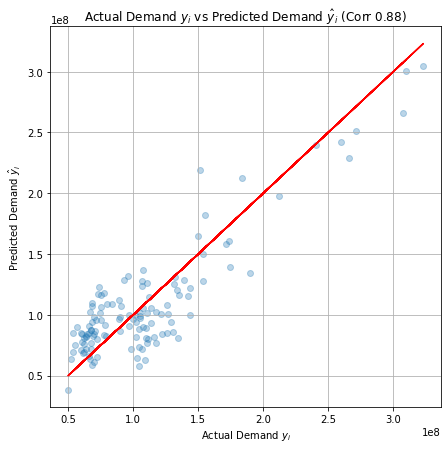

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.3)
plt.plot(y_train, y_train , color='r')

plt.xlabel('Actual Demand $y _i$')
plt.ylabel('Predicted Demand $\hat y _i$')
plt.title(f'Actual Demand $y _i$ vs Predicted Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

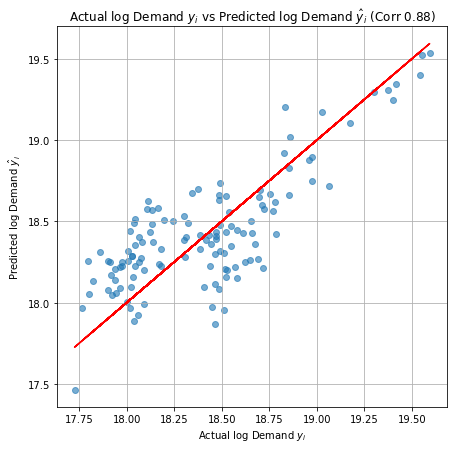

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(np.log(y_train), np.log(x_ols.fittedvalues), alpha=0.6)
plt.plot(np.log(y_train), np.log(y_train) , color='r')

plt.xlabel('Actual log Demand $y _i$')
plt.ylabel('Predicted log Demand $\hat y _i$')
plt.title(f'Actual log Demand $y _i$ vs Predicted log Demand $\hat y _i$ (Corr {corr})')
plt.grid('--')

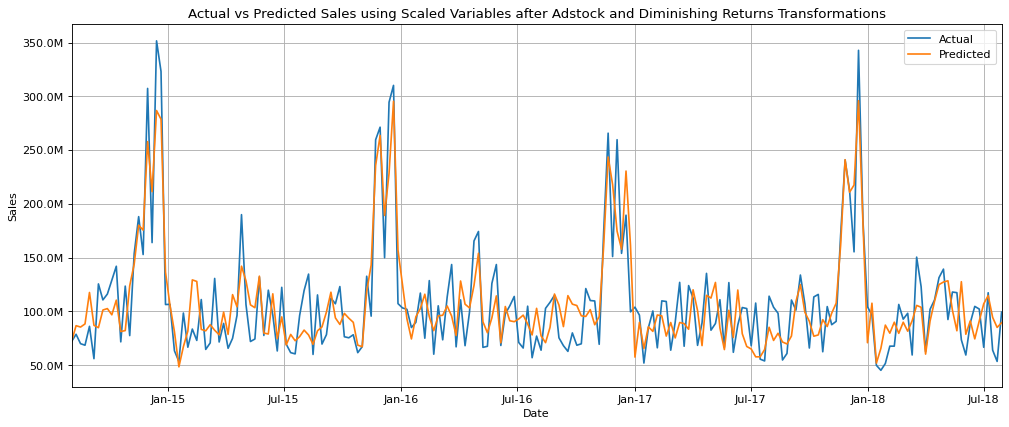

In [ ]:
# Build model on whole dataset 
xall_ols = sm.OLS(y,back_ad_dim_con).fit()

# Defining Actual and Predicted values
y_hat = xall_ols.predict(back_ad_dim_con)
df_temp = pd.DataFrame({'Actual': y, 'Predicted':y_hat})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
ax.plot(y1, label = 'Actual')
ax.plot(y2, label = 'Predicted')
plt.title('Actual vs Predicted Sales using Scaled Variables after Adstock and Diminishing Returns Transformations')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

#### Normalised

In [ ]:
minmax = MinMaxScaler()

In [ ]:
norm_ad_dim = minmax.fit_transform(med_ad_dim)
norm_ad_dim = pd.DataFrame(norm_ad_dim)
norm_ad_dim.index = med_ad_dim.index
norm_ad_dim.columns = med_ad_dim.columns

In [ ]:
fit_ols_6040(norm_ad_dim,y)

Test RMSE: 5906.376
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6.686
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.33e-13
Time:                        12:24:00   Log-Likelihood:                -2284.5
No. Observations:                 125   AIC:                             4685.
Df Residuals:                      67   BIC:                             4849.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

(None, None)

In [ ]:
backward_elim10(norm_ad_dim,y)

Drop mdsp_viddig with p-value 0.9838251126476807
Drop hldy_Cyber Monday with p-value 0.9690556882478174
Drop hldy_Valentine's Day with p-value 0.9258995756369529
Drop mdsp_so with p-value 0.7645386214659617
Drop hldy_Labor Day with p-value 0.7572599614131019
Drop st_ct with p-value 0.7671712099343444
Drop mdip_em with p-value 0.7300028964892313
Drop mdip_auddig with p-value 0.6762188488281533
Drop mdip_audtr with p-value 0.6837743987200133
Drop mdip_aff with p-value 0.7069292729469284
Drop hldy_Prime Day with p-value 0.6920450010603671
Drop hldy_Columbus Day with p-value 0.6481554701926164
Drop hldy_July 4th with p-value 0.5614022233360907
Drop hldy_Mother's Day with p-value 0.5042708877042823
Drop hldy_Father's Day with p-value 0.4668619944503507
Drop mdsp_dm with p-value 0.42550407956503566
Drop mdsp_auddig with p-value 0.4566169557299893
Drop mdip_viddig with p-value 0.35361628362434194
Drop mdip_sms with p-value 0.38971902881165144
Drop me_gas_dpg with p-value 0.335355957021638
Dro

['mdip_dm',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_vidtr',
 'mdip_so',
 'mdsp_audtr',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_3',
 'seas_week_45']

In [ ]:
back_ad_norm_dim = norm_ad_dim[['mdip_dm',
 'mdip_vidtr',
 'mdip_on',
 'mdip_sem',
 'mdsp_vidtr',
 'mdip_so',
 'mdsp_audtr',
 'mrkdn_pdm',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 "hldy_New Year's Day",
 'seas_prd_4',
 'seas_prd_3',
 'seas_prd_5',
 'seas_prd_6',
 'seas_week_42',
 'seas_week_45',
 'hldy_Christmas Day',
 'hldy_MLK']]

In [ ]:
fit_ols_6040(back_ad_norm_dim,y1)

Test RMSE: 5299.747
                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.95
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.69e-27
Time:                        12:24:01   Log-Likelihood:                -2304.8
No. Observations:                 125   AIC:                             4652.
Df Residuals:                     104   BIC:                             4711.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
back_ad_norm_dim_con = sm.add_constant(back_ad_norm_dim)
X_train, X_test, y_train, y_test = train_test_split(back_ad_norm_dim_con, y, test_size=.4, random_state=0)
x_ols = sm.OLS(y_train,X_train).fit()

In [ ]:
corr = round(y1.corr(x_ols.fittedvalues),2)

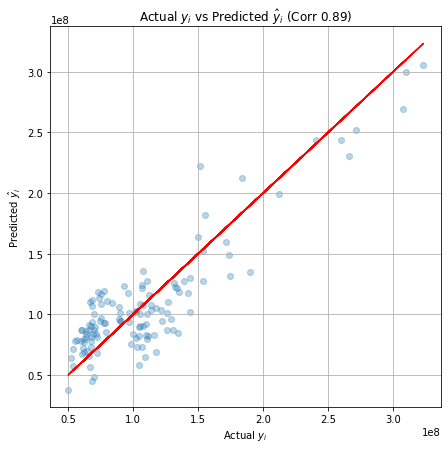

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_train, x_ols.fittedvalues, alpha=0.3)
plt.plot(y_train, y_train , color='r')

plt.xlabel('Actual $y _i$')
plt.ylabel('Predicted $\hat y _i$')
plt.title(f'Actual $y _i$ vs Predicted $\hat y _i$ (Corr {corr})')
plt.grid('--')

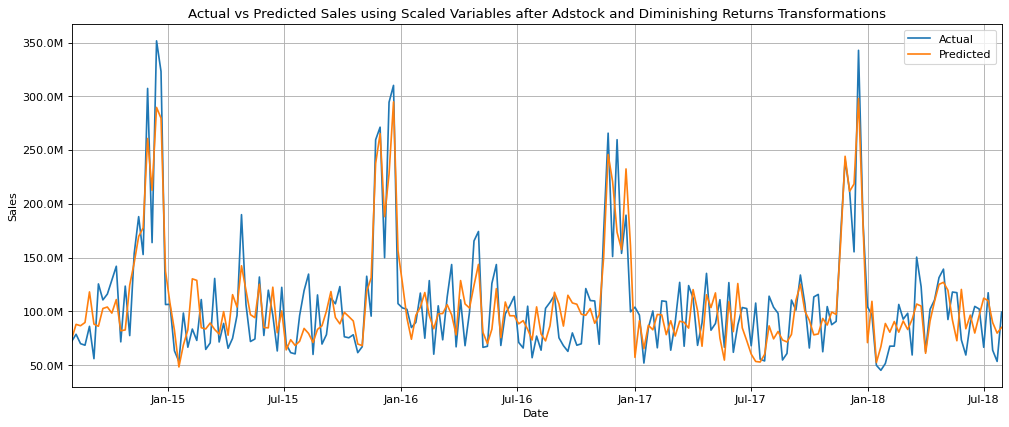

In [ ]:
# Build model on whole dataset 
xall_ols = sm.OLS(y1,back_ad_norm_dim_con).fit()

# Defining Actual and Predicted values
y_hat = xall_ols.predict(back_ad_norm_dim_con)
df_temp = pd.DataFrame({'Actual': y, 'Predicted':y_hat})

# Creating Line Graph
fig,ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
ax.plot(y1, label = 'Actual')
ax.plot(y2, label = 'Predicted')
plt.title('Actual vs Predicted Sales using Scaled Variables after Adstock and Diminishing Returns Transformations')
plt.xlabel('Date')
plt.ylabel('Sales')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
mformatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(mformatter)
ax.grid('--')
ax.set_xlim(pd.Timestamp('2014-08-03'),pd.Timestamp('2018-07-29'))
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax.legend()

# Analysis

## Error

### Functions

In [ ]:
def error(df,y):
  tmp = copy.deepcopy(df)
  xols = sm.add_constant(tmp)
  X_train, X_test, y_train, y_test = train_test_split(xols, y, test_size=.4, random_state=0)
  mlr = sm.OLS(y_train,X_train).fit()
  y_pred = mlr.predict(X_test)
  residual = (100*(y_test-y_pred)/y_test)
  all = pd.DataFrame({'Residual':residual.sum(),
                    'Av Residual':residual.mean(),
                    'RSE': residual.std(),
                    'RMSE': sqrt((residual**2).mean()),
                    'Mean MAE': mae(y_test,y_pred).mean(),
                    'r2': mlr.rsquared,
                    'Adj r2':mlr.rsquared_adj},
                    index=[0]).T
  all.columns = ['Error Values']                  
      
  fig = plt.figure()
  sns.histplot((y_test - y_pred), bins = 20, kde=True, stat="density", linewidth=0)
  fig.suptitle('Error Terms', fontsize = 20)
  plt.xlabel('Errors', fontsize = 18)
  return all

### All variables

Error Values
Residual           121.86
Av Residual          1.45
RSE                 43.33
RMSE                43.10
Mean MAE      37753363.87
r2                   0.86
Adj r2               0.73

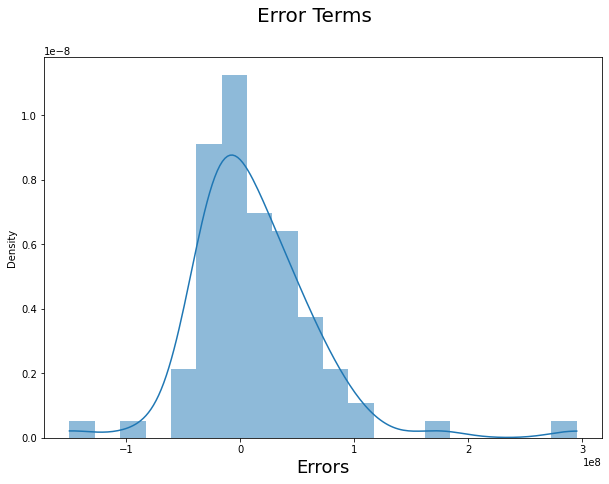

In [ ]:
error(x,y)

### Scaled Variables

Error Values
Residual           121.86
Av Residual          1.45
RSE                 43.33
RMSE                43.10
Mean MAE      37753363.86
r2                   0.86
Adj r2               0.73

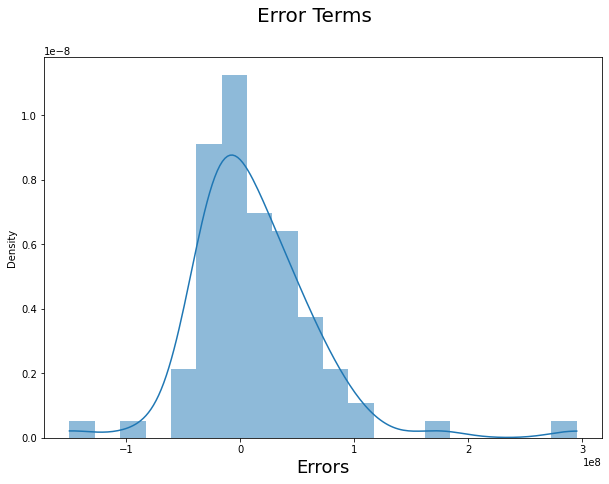

In [ ]:
error(scaled_x,y)

### Backward Elimination

Error Values
Residual          -421.59
Av Residual         -5.02
RSE                 36.14
RMSE                36.27
Mean MAE      28064195.78
r2                   0.77
Adj r2               0.71

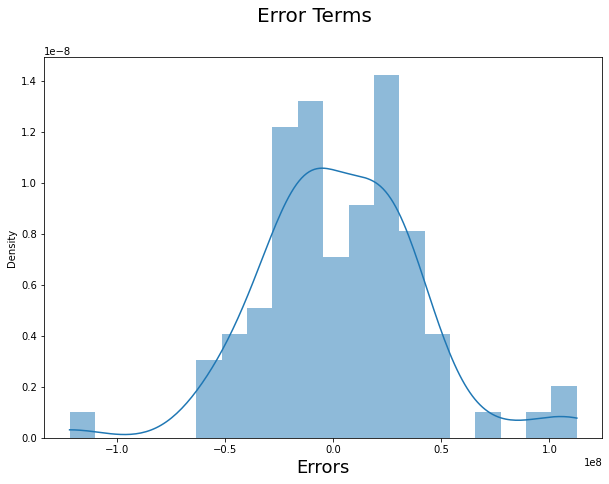

In [ ]:
error(back_x_nonsc,y)

### Only Adstock

Error Values
Residual            35.73
Av Residual          0.43
RSE                 39.83
RMSE                39.60
Mean MAE      36078826.94
r2                   0.85
Adj r2               0.71

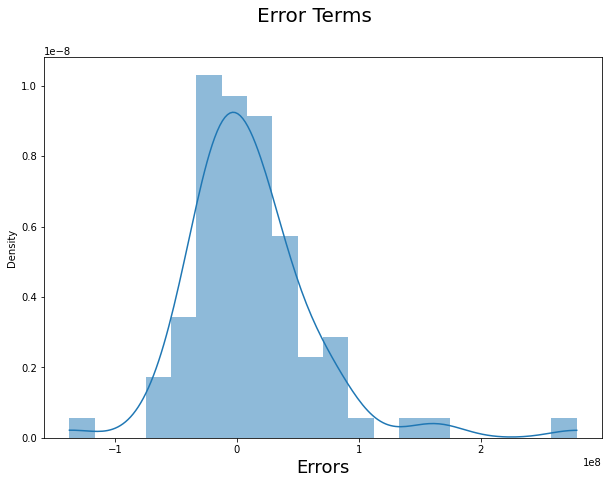

In [ ]:
error(med_ad,y)

Error Values
Residual          -181.66
Av Residual         -2.16
RSE                 32.54
RMSE                32.42
Mean MAE      27487335.11
r2                   0.77
Adj r2               0.73

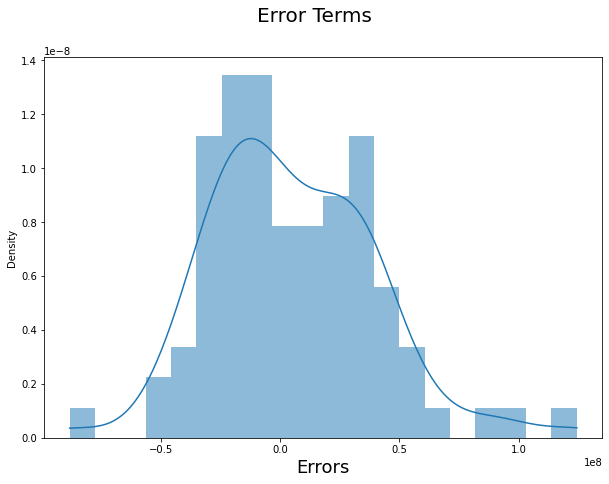

In [ ]:
error(back_sc_ad,y)

### Only Dim Returns

Error Values
Residual           119.82
Av Residual          1.43
RSE                 41.35
RMSE                41.13
Mean MAE      36169129.04
r2                   0.86
Adj r2               0.74

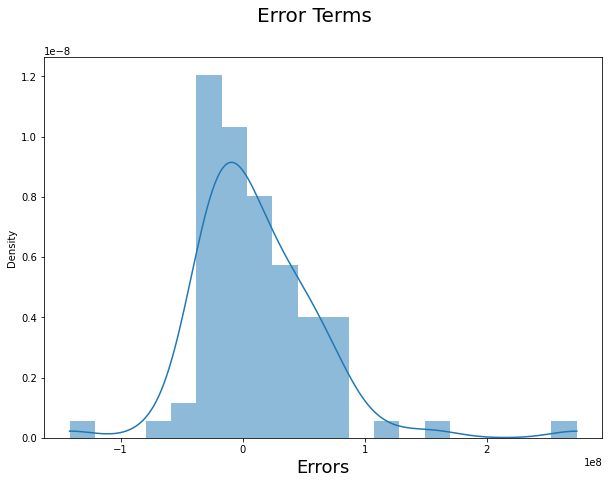

In [ ]:
error(dim_r,y)

Error Values
Residual          -519.72
Av Residual         -6.19
RSE                 36.60
RMSE                36.90
Mean MAE      28487952.62
r2                   0.77
Adj r2               0.71

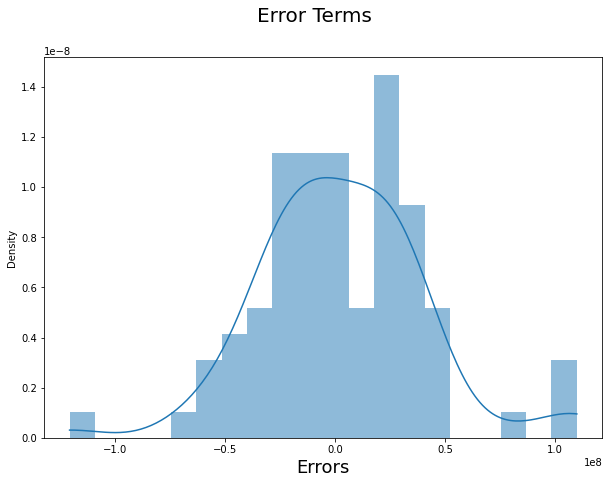

In [ ]:
error(back_dim,y)

### Adstock and Dim Returns Analysis

Error Values
Residual           158.25
Av Residual          1.88
RSE                 37.82
RMSE                37.65
Mean MAE      34885275.69
r2                   0.85
Adj r2               0.72

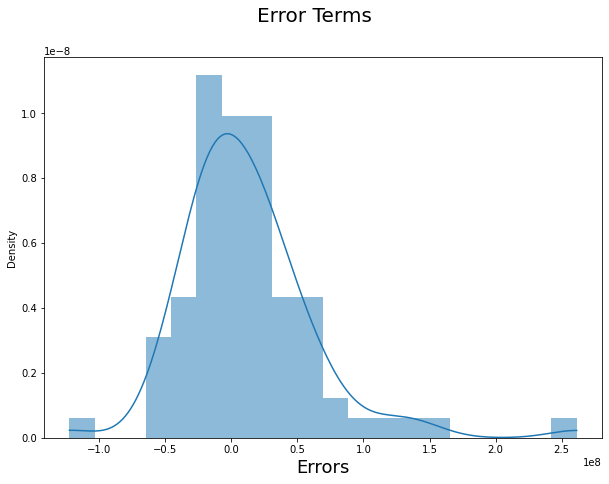

In [ ]:
error(med_ad_dim,y)

Error Values
Residual          -118.45
Av Residual         -1.41
RSE                 31.17
RMSE                31.02
Mean MAE      27541723.46
r2                   0.78
Adj r2               0.75

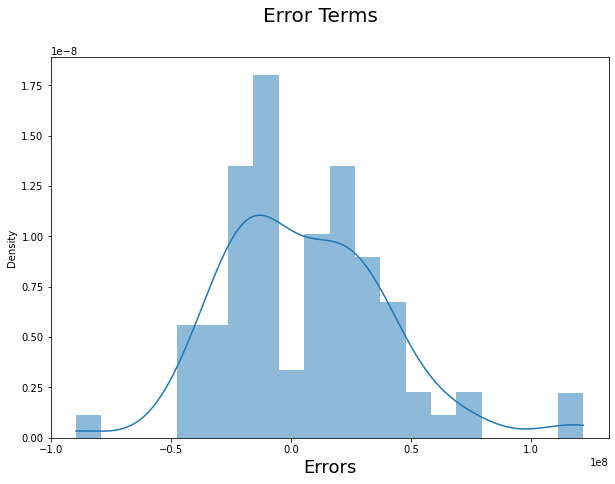

In [ ]:
error(back_ad_dim,y)

Attribution % = 
(y.mean() - pred.mean()/y.mean()) * 100

calculate the predicted sales of a row, (spend*coefficient).sum().
calculate baseline = intercept + control summed

y/pred - y = each media variable overall gain
true media contribution total volume - baseline
y - baseline
y - true media contribution

## Attribution

### Functions

In [ ]:
def ols_att(df,y,dummy):
# df - Dataframe of x variables
# y - target variable
# dummy - Dummy columns

 att = {}
 tmp = copy.deepcopy(df)
 x = sm.add_constant(tmp)
 x = x.reset_index(drop=True)
 y = y.reset_index(drop=True)
 cols = df.columns.to_list()
 d = set(dummy)
 for col in cols:
   if col in d:
     xi = x[x[col]>0].copy()
     yi = y.loc[xi.index].copy()
     ols = sm.OLS(yi,xi).fit()
     p = ols.predict(xi)
     xi[col] = xi[col].values[:] = 0
     pi = ols.predict(xi)
     a = 100*(yi.sum()-pi.sum())/yi.sum()
     att[col] = a
   else:
     xi = x.copy()
     ols = sm.OLS(y,xi).fit()
     p = ols.predict(xi)
     xi[col] = xi[col]=0
     pi = ols.predict(xi)
     a = 100*(y.sum()-pi.sum())/y.sum()
     att[col] = a
 attdf = pd.DataFrame([att]).T
 attdf.columns = ['Attribution %']
 return attdf

In [ ]:
f = back_ad_norm_dim.drop(['mdip_so','mdsp_audtr','mdip_vidtr'],axis=1)

In [ ]:
fit_ols_6040(f,y)

Test RMSE: 5359.822
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     20.71
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.39e-26
Time:                        12:24:05   Log-Likelihood:                -2312.3
No. Observations:                 125   AIC:                             4661.
Df Residuals:                     107   BIC:                             4711.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

(None, None)

In [ ]:
att = ols_att(f,y,bin1_col)
att

Attribution %
mdip_dm                       7.88
mdip_on                       6.71
mdip_sem                     23.47
mdsp_vidtr                   19.87
mrkdn_pdm                     4.86
hldy_Easter                  57.16
hldy_Green Monday            -2.73
hldy_Memorial Day            36.95
hldy_New Year's Day          45.28
seas_prd_4                    5.85
seas_prd_3                  -18.28
seas_prd_5                   48.97
seas_prd_6                   48.66
seas_week_42                 -9.11
seas_week_45                 30.82
hldy_Christmas Day          -18.73
hldy_MLK                    -38.56

Text(0.5, 1.0, 'Attribution of each Variable')

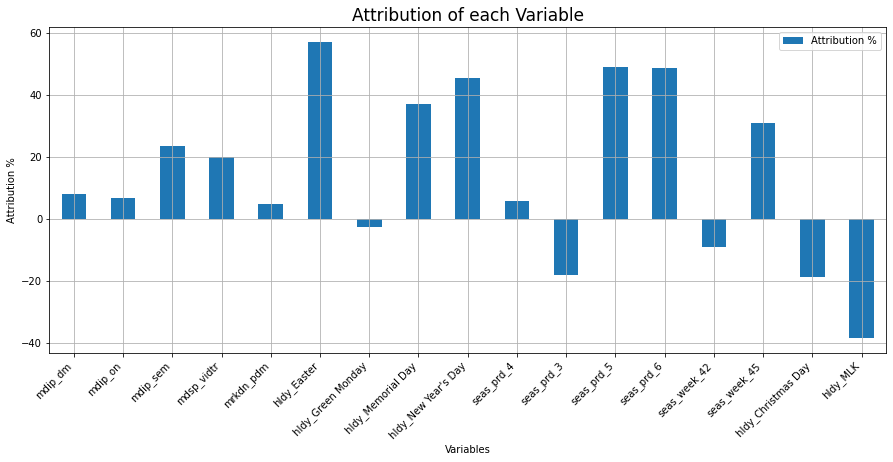

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
att.plot(kind='bar',ax=ax)
ax.grid()
ax.set_xlabel('Variables')
ax.set_ylabel('Attribution %')
ax.set_xticklabels(att.index,rotation=45, ha='right')
ax.set_title('Attribution of each Variable',fontsize=17)

In [ ]:
final = sm.add_constant(f)
final_ols = sm.OLS(y,final).fit()

# Defining Actual and Predicted values
y_pred = final_ols.predict(final)
df_final = pd.DataFrame({'Actual': y1, 'Predicted':y_pred})

In [ ]:
coef = final_ols.params.to_dict()

In [ ]:
coef

{'const': 45570235.9191577,
 'hldy_Christmas Day': 3244507.2030649064,
 'hldy_Easter': -36776670.865912594,
 'hldy_Green Monday': -100821329.33985199,
 'hldy_MLK': -30313007.425721254,
 'hldy_Memorial Day': 31861256.810108114,
 "hldy_New Year's Day": -51349458.355112925,
 'mdip_dm': 19736489.298554562,
 'mdip_on': 22204659.71559224,
 'mdip_sem': 137380763.85141358,
 'mdsp_vidtr': 183358056.07487047,
 'mrkdn_pdm': 11696676.374871727,
 'seas_prd_3': 17662075.4561275,
 'seas_prd_4': -16922534.981143262,
 'seas_prd_5': -3115267.0713757863,
 'seas_prd_6': -6695317.179943101,
 'seas_week_42': -13659142.96268198,
 'seas_week_45': -68421714.33919473}

In [ ]:
final_coef = final.mul(pd.Series(coef), axis=1)

In [ ]:
holiday = ['hldy_Easter','hldy_Green Monday','hldy_Memorial Day',"hldy_New Year's Day",'hldy_Christmas Day','hldy_MLK']
season = ['seas_prd_3','seas_week_45','seas_prd_4','seas_prd_5','seas_prd_6','seas_week_42']

In [ ]:
final_coef['seasonality'] = final_coef[season].sum(axis=1)
final_coef['holiday'] = final_coef[holiday].sum(axis=1)

In [ ]:
cont_p = pd.DataFrame(final_coef.drop(['seasonality','holiday'],axis=1).sum(axis=0))

In [ ]:
cont_p['Perc'] = 100*(cont_p[0]/cont_p[0].sum())

In [ ]:
cont_p

0  Perc
const               9524179307.10 42.17
mdip_dm             1779909708.60  7.88
mdip_on             1516218480.45  6.71
mdip_sem            5300532865.77 23.47
mdsp_vidtr          4487718090.16 19.87
mrkdn_pdm           1096500199.48  4.86
hldy_Easter         -147106683.46 -0.65
hldy_Green Monday   -302463988.02 -1.34
hldy_Memorial Day    127445027.24  0.56
hldy_New Year's Day -205397833.42 -0.91
seas_prd_4          -270760559.70 -1.20
seas_prd_3           282593207.30  1.25
seas_prd_5           -62305341.43 -0.28
seas_prd_6          -107125074.88 -0.47
seas_week_42         -54636571.85 -0.24
seas_week_45        -273686857.36 -1.21
hldy_Christmas Day    12978028.81  0.06
hldy_MLK            -121252029.70 -0.54

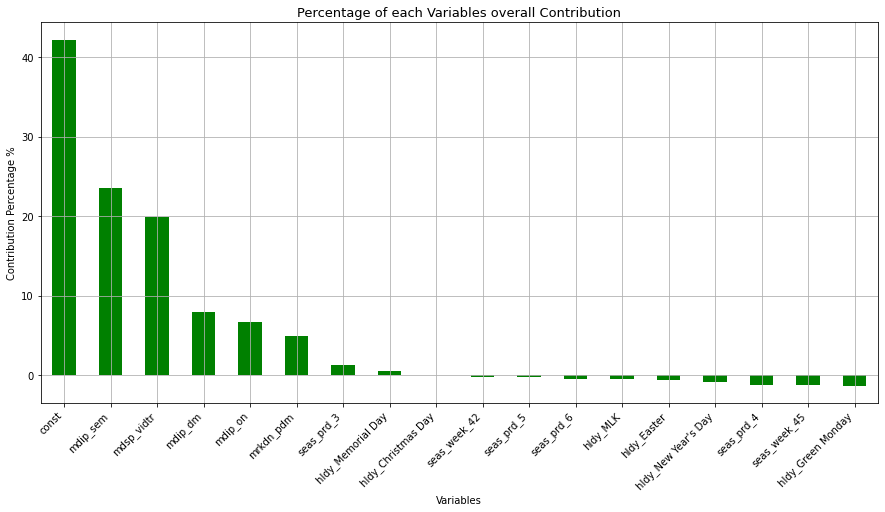

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
cont_p = cont_p['Perc'].sort_values(ascending=False)
cont_p.plot(kind='bar',ax=ax,color='g')
ax.set_xlabel('Variables')
ax.set_ylabel('Contribution Percentage %')
ax.set_title('Percentage of each Variables overall Contribution',size=13)
ax.set_xticklabels(cont_p.index,rotation=45, ha='right')
ax.grid()

In [ ]:
f_plt = final_coef.drop(season+holiday,axis=1)

In [ ]:
f_plt = f_plt[['const','seasonality','holiday','mrkdn_pdm','mdip_dm','mdip_on','mdip_sem','mdsp_vidtr']]

In [ ]:
f_plt.sum(axis=0)

const         9524179307.10
seasonality   -485921197.91
holiday       -635797478.55
mrkdn_pdm     1096500199.48
mdip_dm       1779909708.60
mdip_on       1516218480.45
mdip_sem      5300532865.77
mdsp_vidtr    4487718090.16
dtype: float64

In [ ]:
f_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2014-08-03 to 2018-07-29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        209 non-null    float64
 1   seasonality  209 non-null    float64
 2   holiday      209 non-null    float64
 3   mrkdn_pdm    209 non-null    float64
 4   mdip_dm      209 non-null    float64
 5   mdip_on      209 non-null    float64
 6   mdip_sem     209 non-null    float64
 7   mdsp_vidtr   209 non-null    float64
dtypes: float64(8)
memory usage: 24.7 KB


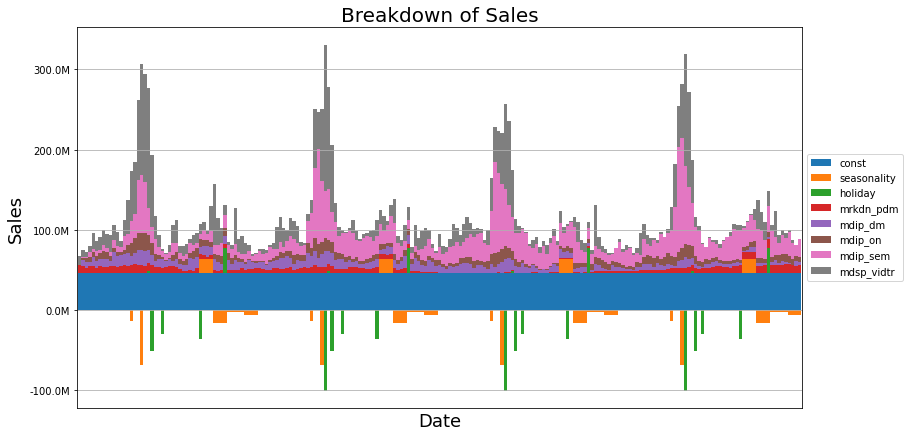

In [ ]:
fig,ax = plt.subplots(figsize=(13,7))
test=f_plt.copy()
test.index = test.index.format(formatter=lambda x: x.strftime('%M%Y')) 
test.plot(kind='bar', stacked=True, ax=ax, width = 1)
ax.xaxis_date()
ax.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title('Breakdown of Sales',size=20)
plt.xlabel('Date',size=18)
plt.ylabel('Sales',size=18)
ax.grid('--')
ax.yaxis.set_major_formatter(mformatter)
ax.xaxis.set_major_locator(mdates.MonthLocator())

## ROAS

cost / overall channel contribution

In [ ]:
cont = pd.DataFrame(f_plt.sum(axis=0)).T
cont

const   seasonality       holiday     mrkdn_pdm       mdip_dm  \
0 9524179307.10 -485921197.91 -635797478.55 1096500199.48 1779909708.60   

        mdip_on      mdip_sem    mdsp_vidtr  
0 1516218480.45 5300532865.77 4487718090.16

In [ ]:
spend = pd.DataFrame(data[spe_col].sum(axis=0)).T
spend

mdsp_dm   mdsp_inst    mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
0 158373363.44 16610245.52 53203626.56    803465.03 25624716.36 35145152.07   

   mdsp_viddig     mdsp_so     mdsp_on     mdsp_sem  
0   3865647.98 21320203.80 45115575.59 130861971.62

In [ ]:
cont['mdsp_vidtr']/spend['mdsp_vidtr']

0   127.69
Name: mdsp_vidtr, dtype: float64

In [ ]:
(cont.sum(axis=1)-cont['mdsp_vidtr'])/spend['mdsp_vidtr']

0   514.88
dtype: float64

In [ ]:
cp = {'Direct Mail':spend['mdsp_dm']/(cont['mdip_dm']),
'Online':spend['mdsp_on']/cont['mdip_on'],
 'SEM':spend['mdsp_sem']/cont['mdip_sem'],
 'TV':spend['mdsp_vidtr']/cont['mdsp_vidtr']}

In [ ]:
r = {'Direct Mail':(cont['mdip_dm'])/spend['mdsp_dm'],
'Online':(cont['mdip_on'])/spend['mdsp_on'],
 'SEM':(cont['mdip_sem'])/spend['mdsp_sem'],
 'TV':(cont['mdsp_vidtr'])/spend['mdsp_vidtr']}

In [ ]:
roi={'Direct Mail':(cont['mdip_dm']-spend['mdsp_dm'])/spend['mdsp_dm'],
'Online':(cont['mdip_on']-spend['mdsp_on'])/spend['mdsp_on'],
 'SEM':(cont['mdip_sem']-spend['mdsp_sem'])/spend['mdsp_sem'],
 'TV':(cont['mdsp_vidtr']-spend['mdsp_vidtr'])/spend['mdsp_vidtr']}

In [ ]:
roi

{'Direct Mail': 0   10.24
 dtype: float64, 'Online': 0   32.61
 dtype: float64, 'SEM': 0   39.50
 dtype: float64, 'TV': 0   126.69
 Name: mdsp_vidtr, dtype: float64}

In [ ]:
roas = pd.DataFrame(r)
roas=roas.T
roas.reset_index(inplace=True)

In [ ]:
cost_per = pd.DataFrame(cp).T
cost_per.reset_index(inplace=True)

In [ ]:
spend_t=spend.T

In [ ]:
m_att = att.loc['mdip_dm':'mdsp_vidtr']
m_att.reset_index(inplace=True)
m_spe =spend_t.loc[['mdsp_dm','mdsp_on','mdsp_sem','mdsp_vidtr']]
m_spe.reset_index(inplace=True)

In [ ]:
m_plt = m_att.merge(cost_per,left_index=True, right_index=True).merge(m_spe,left_index=True, right_index=True).merge(roas,left_index=True, right_index=True)

In [ ]:
m_plt

index_x  Attribution %      index_y  0_x     index_x          0_y  \
0     mdip_dm           7.88  Direct Mail 0.09     mdsp_dm 158373363.44   
1     mdip_on           6.71       Online 0.03     mdsp_on  45115575.59   
2    mdip_sem          23.47          SEM 0.02    mdsp_sem 130861971.62   
3  mdsp_vidtr          19.87           TV 0.01  mdsp_vidtr  35145152.07   

       index_y      0  
0  Direct Mail  11.24  
1       Online  33.61  
2          SEM  40.50  
3           TV 127.69

In [ ]:
m_plt.columns = ['x','Attribution','y','CPS','z','Spend','Media','ROAS']
m_plt = m_plt.drop(['x','y','z'],axis=1)

In [ ]:
m_plt = m_plt[['Media','Attribution','Spend','CPS','ROAS']]
m_plt = m_plt.set_index('Media')

In [ ]:
m_plt

Attribution        Spend  CPS   ROAS
Media                                            
Direct Mail         7.88 158373363.44 0.09  11.24
Online              6.71  45115575.59 0.03  33.61
SEM                23.47 130861971.62 0.02  40.50
TV                 19.87  35145152.07 0.01 127.69

Text(0.5, 1.0, 'Return on Ad Spend for each Channel')

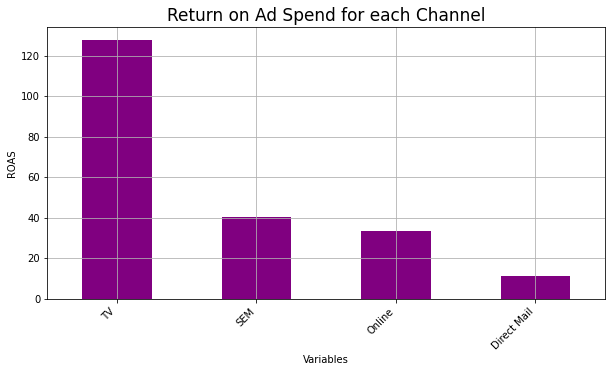

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
m_plt = m_plt.sort_values(by='ROAS',ascending=False)
m_plt['ROAS'].plot(kind='bar',ax=ax,color='purple')
ax.set_xticklabels(m_plt.index,rotation=45, ha='right')
ax.grid()
ax.set_xlabel('Variables')
ax.set_ylabel('ROAS')
ax.set_title('Return on Ad Spend for each Channel',fontsize=17)

In [ ]:
c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

(array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 9 Text major ticklabel objects>)

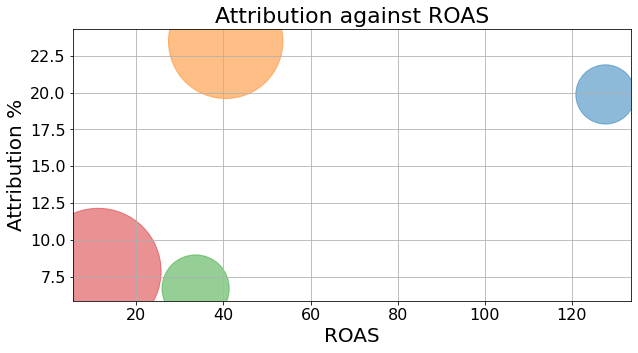

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=m_plt.ROAS, y=m_plt.Attribution, s=m_plt.Spend/10000,c=c, alpha=0.5)
ax.grid(True)
#plt.xlabel("ROAS", size=14)
#plt.ylabel("Attribution %", size=14)
ax.set_xlabel('ROAS',size=20)
ax.set_ylabel('Attribution %',size=20)
ax.set_title('Attribution against ROAS',fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Appendix

### Ridge Regression

(-14.950000000000001, 313.95, -10598103.987600155, 22812468.72303761)

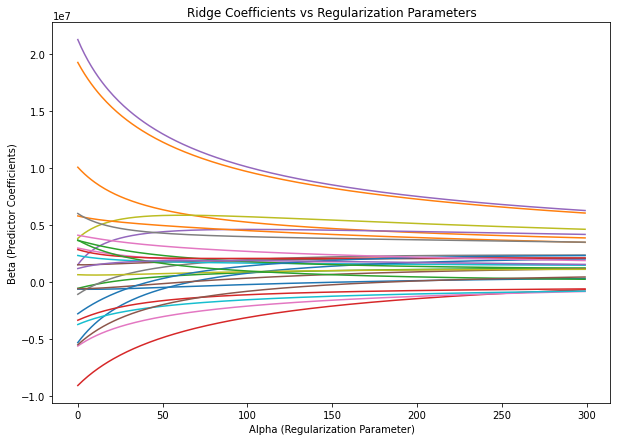

In [ ]:
coef=[]
alphas = range(0,300)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(scaled_df1,y)
  coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')

In [ ]:
###Fit Ridge regression through cross validation
regr_cv=RidgeCV(alphas=range(1,300))
model_cv=regr_cv.fit(scaled_df1,y)

print(model_cv.alpha_)

88


In [ ]:
model_cv.score(scaled_df1,y)

0.6352605212374239

### Adstock Media Variables

#### Impressions

In [ ]:
X_imp_con.drop('wk_strt_dt',axis=1,inplace=True)

KeyError: ignored

In [ ]:
imp_col

In [ ]:
adstock_optimised(X_imp_con,imp_col,y,8)

In [ ]:
X_ad = applied_optimised_adstock(X_imp_con,imp_col,y,8)

In [ ]:
X_ad_con = X_ad.merge(control,how='inner',right_index=True,left_index=True)

In [ ]:
fit_ols(X_ad_con,y)

In [ ]:
backward_elim(X_ad_con,y)

In [ ]:
back_ad_con = X_ad_con[['mdip_dm',
 'mdip_vidtr',
 'mdip_sem',
 'mrkdn_pdm',
 'hldy_Black Friday',
 'hldy_Cyber Monday',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_Memorial Day',
 'hldy_NYE',
 'hldy_Pre Thanksgiving',
 'hldy_Thanksgiving',
 'seas_prd_3',
 'seas_week_43',
 'seas_week_44',
 'seas_week_46',
 'seas_week_47']]

In [ ]:
fit_ols(back_ad_con,y)

#### Scaled Impressions

In [ ]:
X_ad_con_sc = X_ad.merge(data[con_col],how='inner',right_index=True,left_index=True)

In [ ]:
scaler = StandardScaler()
scaled_ad = scaler.fit_transform(X_ad_con_sc)
scaled_ad = pd.DataFrame(scaled_ad)
scaled_ad.columns = X_ad_con_sc.columns

In [ ]:
scaled_ad_bin = scaled_ad.merge(data[bin_col],how='inner',right_index=True,left_index=True)

In [ ]:
fit_ols(scaled_ad_bin,y)

In [ ]:
backward_elim(scaled_ad_bin,y)

In [ ]:
back_scaled_ad_bin = scaled_ad_bin[['mdip_dm',
 'mdip_vidtr',
 'mdip_sms',
 'mdip_sem',
 'mrkdn_pdm',
 'hldy_Black Friday',
 'hldy_Cyber Monday',
 'hldy_Green Monday',
 'hldy_NYE',
 'hldy_Pre Thanksgiving',
 'hldy_Thanksgiving',
 'seas_week_43',
 'seas_week_44',
 'seas_week_46',
 'seas_week_47']]

In [ ]:
fit_ols(back_scaled_ad_bin,y)

#### Spend

In [ ]:
X_spend_con.drop('wk_strt_dt',axis=1,inplace=True)

In [ ]:
spe_col

In [ ]:
adstock_optimised(X_spend_con,spe_col,y,8)

In [ ]:
X_spe_ad = applied_optimised_adstock(X_spend_con,spe_col,y,8)

In [ ]:
X_spe_ad_con = X_spe_ad.merge(control,how='inner',right_index=True,left_index=True)

In [ ]:
fit_ols(X_spe_ad_con,y)

In [ ]:
backward_elim(X_spe_ad_con,y)

In [ ]:
back_spe_ad_con = X_spe_ad_con[['mdsp_vidtr',
 'mdsp_sem',
 'hldy_Black Friday',
 'hldy_Cyber Monday',
 'hldy_Easter',
 'hldy_Green Monday',
 'hldy_NYE',
 'hldy_Pre Thanksgiving',
 'hldy_Thanksgiving',
 'seas_prd_3',
 'seas_week_43',
 'seas_week_44',
 'seas_week_46',
 'seas_week_47']]

In [ ]:
fit_ols(back_spe_ad_con,y)

## Advanced Adstock

In [ ]:
# 1.1.2 Advanced Adstock function
def apply_adstock(x, L, P, D):
    '''
    params:
    x: media variable, array
    L: length of effect
    P: peak, delay in effect
    D: decay rate
    
    returns:
    array, adstocked media variable
    '''
    x = np.append(np.zeros(L-1), x)
    
    weights = np.zeros(L)
    for l in range(L):
        weight = D**((l-P)**2)
        weights[L-1-l] = weight
    
    adstocked_x = []
    for i in range(L-1, len(x)):
        x_array = x[i-L+1:i+1]
        xi = sum(x_array * weights)/sum(weights)
        adstocked_x.append(xi)
    adstocked_x = np.array(adstocked_x)
    return adstocked_x

### Visual example of Advanced Adstock impact

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(15,9))

L_para = [[3, 1, 0.9],
        [10, 1, 0.9]]

tv_eg = X_spend['sp_tv'].values
sns.lineplot(x=range(52), y=tv_eg[-52:], ax=ax[0], label='original')
for i in range(len(L_para)):
    p = L_para[i]
    L, P, D = p[0], p[1], p[2]
    tv_adstocked = apply_adstock(tv_eg, L, P, D)
    sns.lineplot(x=range(52), y=tv_adstocked[-52:], ax=ax[0], 
                 label='L=%d, P=%d, D=%.1f'%(L, P, D))
    ax[0].lines[i+1].set_linestyle("--")
ax[0].set_title('Adstock Parameter: Length', fontsize=10)

P_para = [[8, 3, 0.9],
        [8, 8, 0.9]]

tv_eg = X_spend['sp_tv'].values
sns.lineplot(x=range(52), y=tv_eg[-52:], ax=ax[1], label='original')
for i in range(len(P_para)):
    p = P_para[i]
    L, P, D = p[0], p[1], p[2]
    tv_adstocked = apply_adstock(tv_eg, L, P, D)
    sns.lineplot(x=range(52), y=tv_adstocked[-52:], ax=ax[1], 
                 label='L=%d, P=%d, D=%.1f'%(L, P, D))
    ax[1].lines[i+1].set_linestyle("--")
ax[1].set_title('Adstock Parameter: Peak', fontsize=10)

D_para = [[8, 1, 0.1],
        [8, 1, 0.9]]

tv_eg = X_spend['sp_tv'].values
sns.lineplot(x=range(52), y=tv_eg[-52:], ax=ax[2], label='original')
for i in range(len(D_para)):
    p = D_para[i]
    L, P, D = p[0], p[1], p[2]
    tv_adstocked = apply_adstock(tv_eg, L, P, D)
    sns.lineplot(x=range(52), y=tv_adstocked[-52:], ax=ax[2], 
                 label='L=%d, P=%d, D=%.1f'%(L, P, D))
    ax[2].lines[i+1].set_linestyle("--")
ax[2].set_title('Adstock Parameter: Decay', fontsize=10)

## Hill Function

In [ ]:
def beta_hill(x, S, K, beta):
    return beta - (K**S*beta)/(x**S+K**S)

* S = Slope; greater than 0
* K = Half Saturation Point; greater than 0
* beta = Coefficient for channel; greater than 0
* x = media spend

The equation above is a modified version of the original. In the original Hill function, as X approaches infinity the function approaches 1, therefore we multiply by a beta coefficient to account for various strengths of marketing channels. If we excluded the beta variable each channel would have the same effectiveness.

In [ ]:
hill_p = [
     [0.5, 0.5, 0.3],
     [0.5, 0.3, 0.3],
     [1.0, 0.5, 0.3],
     [2.0, 0.5, 0.3],
     [0.5, 0.5, 0.6]
 ]

In [ ]:
hill = {'0.5 | 0.5 | 0.3': beta_hill(np.arange(0,100,0.01),0.5, 0.5, 0.3),
        '0.5 | 0.3 | 0.3': beta_hill(np.arange(0,100,0.01),0.5, 0.3, 0.3),
        '1.0 | 0.5 | 0.3': beta_hill(np.arange(0,100,0.01),1, 0.5, 0.3),
        '2.0 | 0.5 | 0.3': beta_hill(np.arange(0,100,0.01),2, 0.5, 0.3),
        '0.5 | 0.5 | 0.6': beta_hill(np.arange(0,100,0.01),0.5, 0.5, 0.6)}



*   S - Controls how delayed the spend takes to hit, bigger the number, longer it takes.
*   K - How soon the data peaks, if K and beta are same, then all lines will cross at that point. 
* beta - How high the line finishes



In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

xm = np.arange(0,100,0.01)
for i in range(len(hill_p)):
    p = hill_p[i]
    S, K, beta = p[0], p[1], p[2]
    sns.lineplot(x=xm, y=beta_hill(xm, S, K, beta), ax=ax, 
                 label='S=%.1f, K=%.1f, beta=%.1f'%(S, K, beta))
    #ax.lines[i+1].set_linestyle("--")
ax.set_title('Hill Function', fontsize=16)

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
pd.DataFrame(hill).plot(ax=ax)
ax.set_xlim(0,100)
ax.set_ylim(0,0.4)

## Simulated Dataset

### Bayesian Simulated Data

In [ ]:
# media channels 
N = 102 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3+np.sin(t+0.001) + 0.5 + np.random.randn(N)
media_1 = ((data-min(data))/(max(data)-min(data)) )  

t = np.linspace(0, 4*np.pi, N)
data = 3+np.sin(t+0.001) + 0.5 + np.random.randn(N)
media_2 = ((data-min(data))/(max(data)-min(data)) )  

t = np.linspace(0, 4*np.pi, N)
data = 3+np.sin(t+0.001) + 0.5 + np.random.randn(N)
media_3 = ((data-min(data))/(max(data)-min(data)) )  

# price 
from statsmodels.tsa import arima_process as arima

arparams = np.array([.7, .6])
maparams = np.array([.1, .02])
ar = np.r_[1, arparams] # add zero-lag and negate
ma = np.r_[1, maparams] 
price_variable = arima.arma_generate_sample(ar,ma,102)

#Channel Variables
alpha_media_1 = .6
theta_media_1 = 5
k_media_1     = .2
s_media_1     = 1
beta_media_1  = .8

alpha_media_2 = .8
theta_media_2 = 3
k_media_2     = .2
s_media_2     = 2
beta_media_2  = .6
 
alpha_media_3 = .8
theta_media_3 = 4
k_media_3     = .2
s_media_3     = 2
beta_media_3  = .3

L=13
ru=4
lamb = -.5
ep = .05**2

m1 = [beta_hill(x, s_media_1, k_media_1, beta_media_1) for x in carryover(media_1, alpha_media_1, L, theta = theta_media_1, func='delayed')]
m2 = [beta_hill(x, s_media_2, k_media_2, beta_media_2) for x in carryover(media_2, alpha_media_2, L, theta = theta_media_2, func='delayed')]
m3 = [beta_hill(x, s_media_3, k_media_3, beta_media_3) for x in carryover(media_3, alpha_media_3, L, theta = theta_media_3, func='delayed')]
 
y = np.repeat(ru, N) + m1 + m2 + m3 + (lamb*price_variable) + np.random.normal(0, ep, N)

In [ ]:
sim = pd.DataFrame([y,m1,m2,m3]).T

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sim[[1,2,3]].plot(ax=ax[0])
sim[0].plot(ax=ax[1])

# Test

In [ ]:
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())
print(model.pvalues.max())

In [ ]:
x1 =x.drop(['st_ct',
            'mdsp_audtr',
            "hldy_Mother's Day",
            "hldy_Labor Day",
            'mdip_vidtr',
            'hldy_Prime Day',
            'va_pub_0.25',
            'mdip_dm',
            'hldy_NYE',
            'mdip_aff',
            'hldy_Presidents Day',
            'mdip_inst',
            'mrkdn_pdm',
            'va_pub_0.15',
            'mdip_so',
            'mdsp_sem',
            'mdsp_on',
            'hldy_Columbus Day',
            'mdip_nsp',
            "hldy_Father's Day",
            "hldy_Valentine's Day",
            'hldy_July 4th',
            'mdsp_auddig',
            'mdsp_nsp',
            'mdsp_inst',
            'mdip_viddig',
            'me_gas_dpg',
            'mdsp_viddig',
            'va_pub_0.3',
            'mdip_on',
            'me_ics_all',
            'mdip_auddig',
            'mrkdn_valadd_edw',
            "hldy_New Year's Day",
            'mdip_sms',
            'mdip_em',
            'hldy_Memorial Day'],axis=1)

In [ ]:
Xols = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(Xols, y, test_size=.2, random_state=0)
ols = sm.OLS(y_train,X_train).fit()
print(ols.summary())

In [ ]:
pred = ols.predict(Xols)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
residual = 100*(pred - y)/y
residual.std()

In [ ]:
sqrt((residual**2).mean())

In [ ]:
sqrt(mae(y, pred))

In [ ]:
r2_score(y, pred)